In [ ]:
# https://chat.openai.com/share/0740c4ea-3810-402b-a42c-59195c6f1577

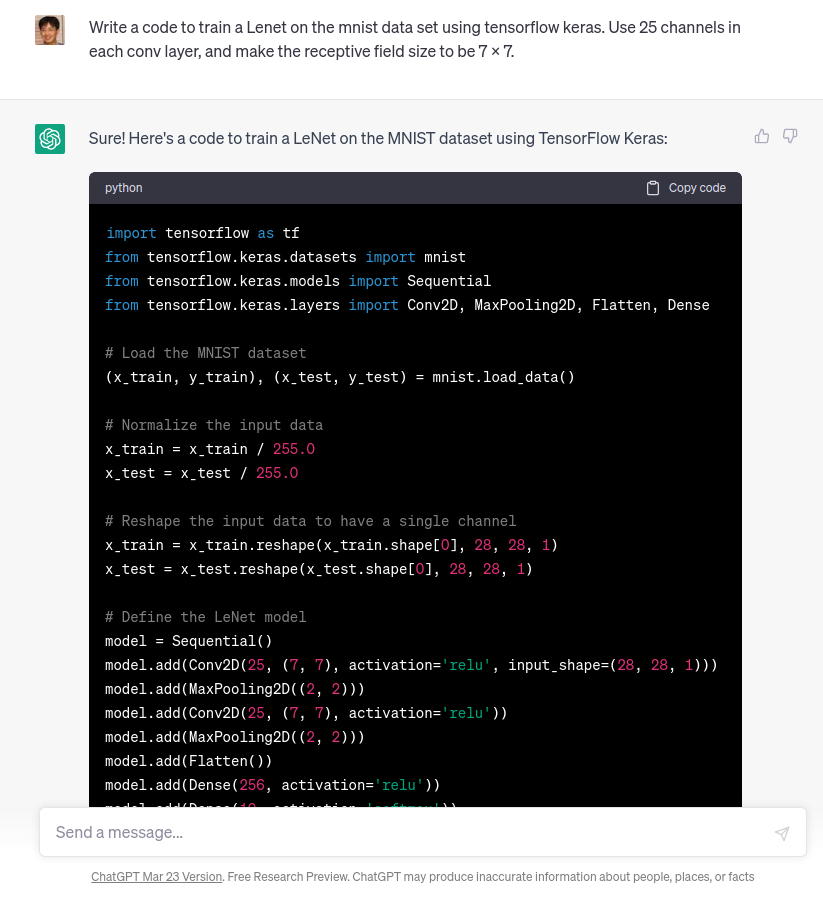

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the input data to have a single channel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define the LeNet model
model = Sequential()
model.add(Conv2D(25, (7, 7), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(25, (7, 7), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.8862 - loss: 0.3699 - val_accuracy: 0.9814 - val_loss: 0.0572
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9813 - loss: 0.0586 - val_accuracy: 0.9875 - val_loss: 0.0397
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 24ms/step - accuracy: 0.9878 - loss: 0.0385 - val_accuracy: 0.9829 - val_loss: 0.0559
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9905 - loss: 0.0300 - val_accuracy: 0.9868 - val_loss: 0.0437
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 27ms/step - accuracy: 0.9913 - loss: 0.0266 - val_accuracy: 0.9867 - val_loss: 0.0479
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 25ms/step - accuracy: 0.9928 - loss: 0.0212 - val_accuracy: 0.9883 - val_loss: 0.0461
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.9950 - loss: 0.0159 - val_accuracy: 0.9892 - val_loss: 0.0396
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9955 -

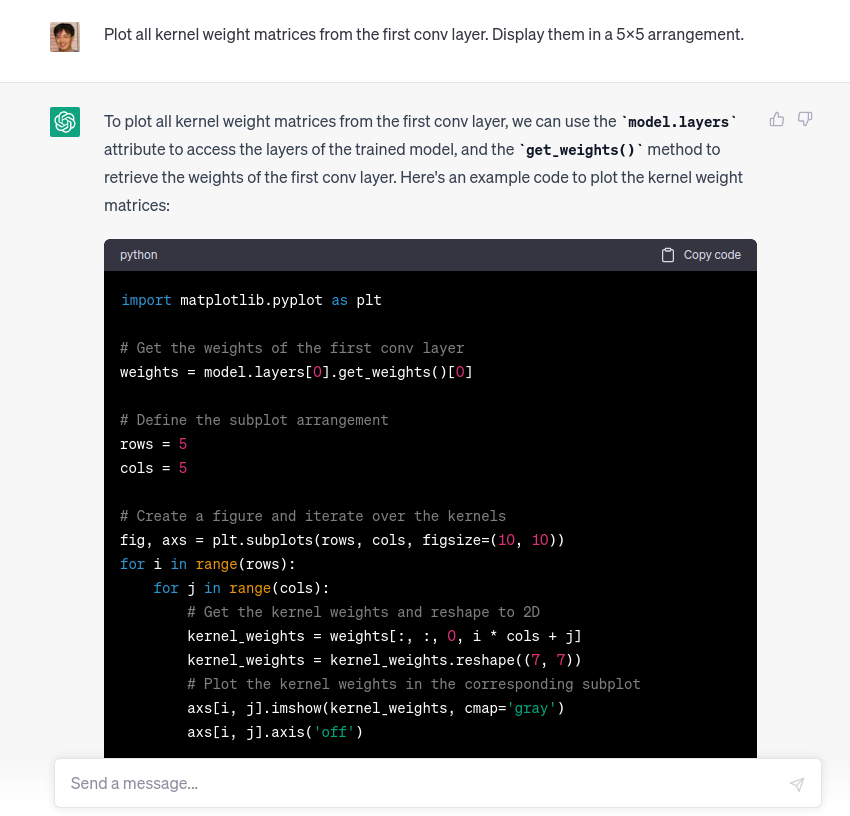

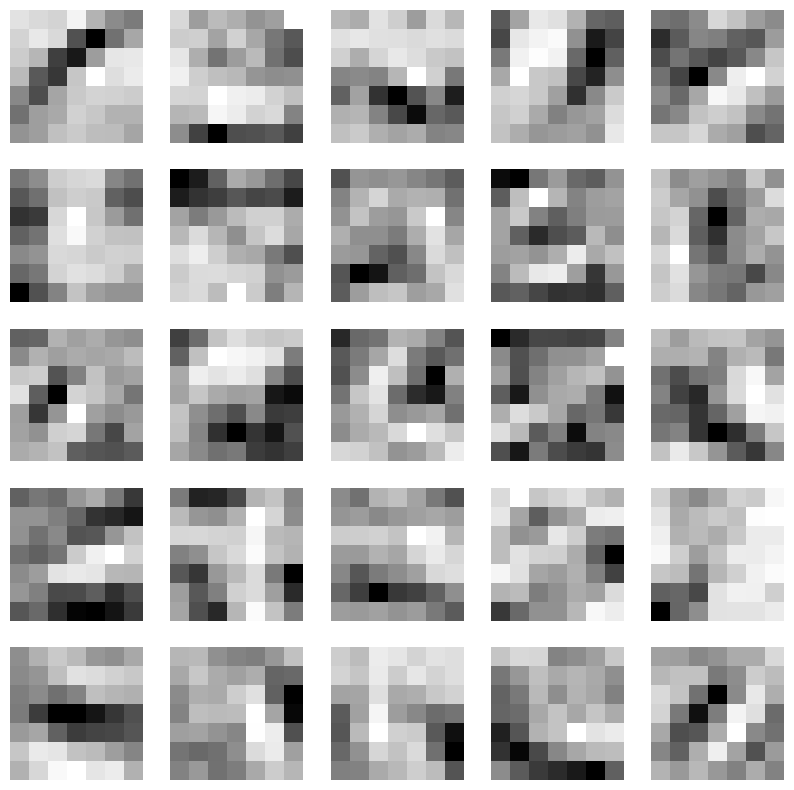

In [ ]:
import matplotlib.pyplot as plt

# Get the weights of the first conv layer
weights = model.layers[0].get_weights()[0]

# Define the subplot arrangement
rows = 5
cols = 5

# Create a figure and iterate over the kernels
fig, axs = plt.subplots(rows, cols, figsize=(10, 10))
for i in range(rows):
    for j in range(cols):
        # Get the kernel weights and reshape to 2D
        kernel_weights = weights[:, :, 0, i * cols + j]
        kernel_weights = kernel_weights.reshape((7, 7))
        # Plot the kernel weights in the corresponding subplot
        axs[i, j].imshow(kernel_weights, cmap='gray')
        axs[i, j].axis('off')

# Show the plot
plt.show()


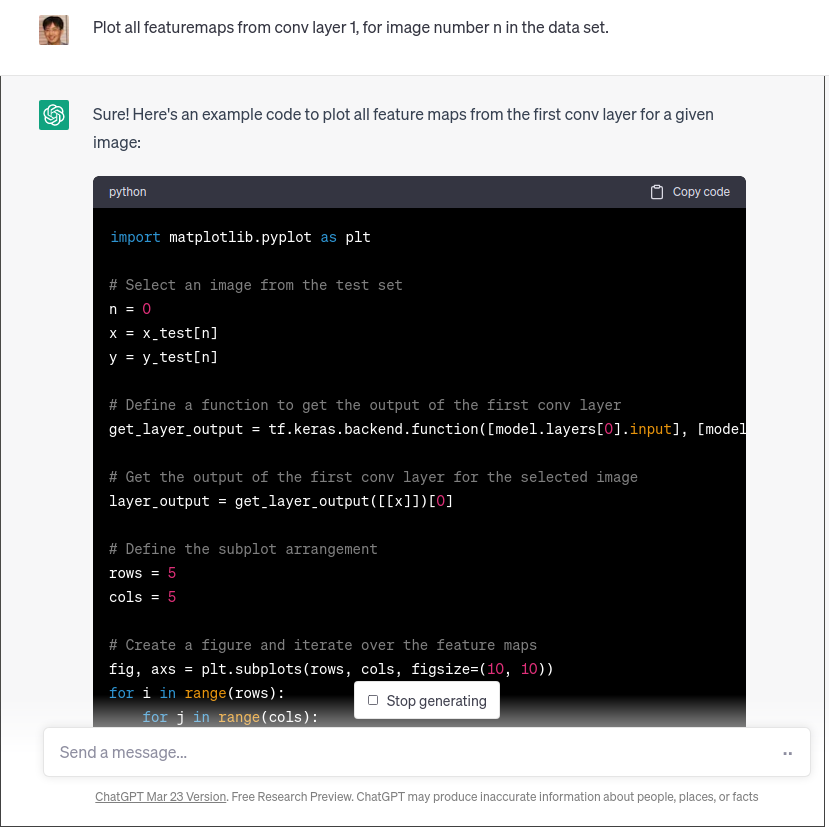

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


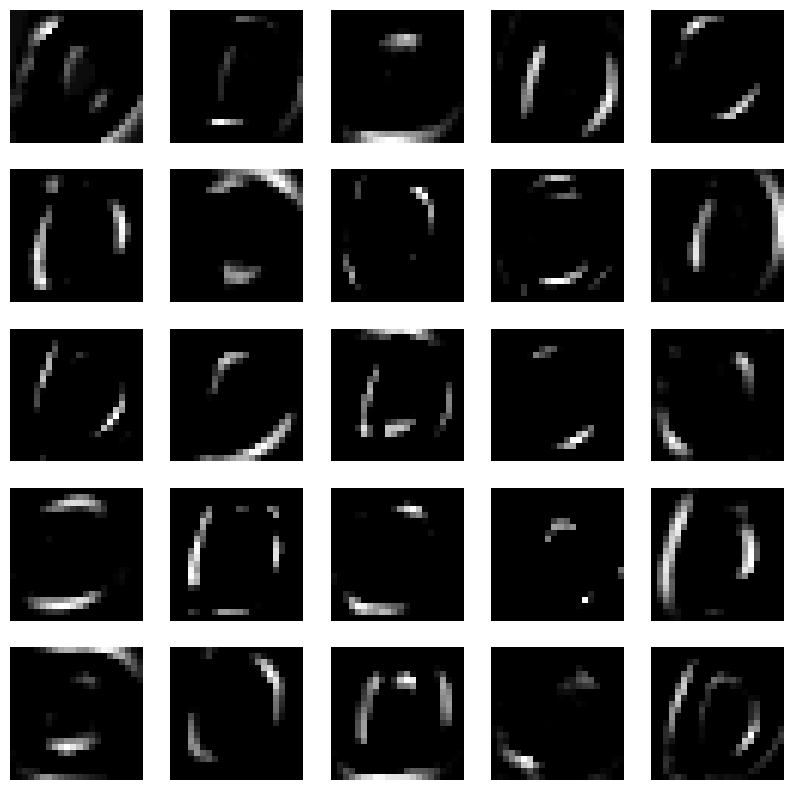

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select an image from the test set
n = 10
x = x_test[n]
y = y_test[n]

# Create a new model that outputs the first conv layer's output
intermediate_layer_model = tf.keras.Model(inputs=model.layers[0].input,
                                         outputs=model.layers[0].output)

# Get the output of the first conv layer for the selected image
# Use predict on the intermediate model to get the output
intermediate_output = intermediate_layer_model.predict(np.expand_dims(x, axis=0))


# Define the subplot arrangement
rows = 5
cols = 5

# Create a figure and iterate over the feature maps
fig, axs = plt.subplots(rows, cols, figsize=(10, 10))
for i in range(rows):
    for j in range(cols):
        # Get the feature map and plot it in the corresponding subplot
        feature_map = intermediate_output[0, :, :, i * cols + j]
        axs[i, j].imshow(feature_map, cmap='gray')
        axs[i, j].axis('off')

# Show the plot
plt.show()

In [ ]:
""" BUGGY
import matplotlib.pyplot as plt

# Select an image from the test set
n = 0
x = x_test[n]
y = y_test[n]

# Define a function to get the output of the first conv layer
get_layer_output = tf.keras.backend.function([model.layers[0].input], [model.layers[0].output])

# Get the output of the first conv layer for the selected image
layer_output = get_layer_output([[x]])[0]

# Define the subplot arrangement
rows = 5
cols = 5

# Create a figure and iterate over the feature maps
fig, axs = plt.subplots(rows, cols, figsize=(10, 10))
for i in range(rows):
    for j in range(cols):
        # Get the feature map and plot it in the corresponding subplot
        feature_map = layer_output[0, :, :, i * cols + j]
        axs[i, j].imshow(feature_map, cmap='gray')
        axs[i, j].axis('off')

# Show the plot
plt.show()
"""


" BUGGY\nimport matplotlib.pyplot as plt\n\n# Select an image from the test set\nn = 0\nx = x_test[n]\ny = y_test[n]\n\n# Define a function to get the output of the first conv layer\nget_layer_output = tf.keras.backend.function([model.layers[0].input], [model.layers[0].output])\n\n# Get the output of the first conv layer for the selected image\nlayer_output = get_layer_output([[x]])[0]\n\n# Define the subplot arrangement\nrows = 5\ncols = 5\n\n# Create a figure and iterate over the feature maps\nfig, axs = plt.subplots(rows, cols, figsize=(10, 10))\nfor i in range(rows):\n    for j in range(cols):\n        # Get the feature map and plot it in the corresponding subplot\n        feature_map = layer_output[0, :, :, i * cols + j]\n        axs[i, j].imshow(feature_map, cmap='gray')\n        axs[i, j].axis('off')\n\n# Show the plot\nplt.show()\n"

![mnist4.png]("""+lqWTtFSBoRIAJEgAgQASKQgwRyTFeLiQiX8HkpfJ4Y6hpPGi9OkArUv4ZEXr58+9jJMx8/fdLk8dR4EinsZjJ7G0/wf0jaIo2G9av16Na1XJkyUlz+/4dlS46PyUGaVDURIAJEgAgQASJABLKWQI7pagYGhhK+NJkvhUFMoq4WnRB39fad/YfP3rz90EBPv4iVFV8qiYuLSUlJ0RVp86TiVAOaFGqbuhrv+u1H779GjhzqWaVyBYGaGo8vVVdXh64mhe4m+am9ZS0pkkYEiAARIAJEgAgQgf+eQI7patC6xCniJHFyEk/yPSH++Nkzuw8ei0/kFS9aNC4+ITY2NjkpCQ5RHl8tJi5egE/qKgjEqwk1NEUC4Yd3bzdu2+PR16VoEStNTU0+NDYeD57Q5OTk/x4i1UgEiAARIAJEgAgQgWwikGPrQL/hE4G/yODg0MuXr+/dcyT2e5y+joCXEieUJmsKeCINdUlyojq0MzWeQF2NL1Djp/6bJOHFp4j5AsHDB/cvXbkSGxcnEadIJakmNYkEdrhsIkViiQARIAJEgAgQASLw3xPIOV0tOiISf1Hfvn79cvnqjbCI7zoiQVJCnDQlVp2XoK0u0dXgm+iKiluZafGlGgK4SSVqAh5fXQC7WUKyRF2oiUWgz589j46K0tTQwDJRmWlNivUJsuC2rPoM9vLt1XtglkjD2tVVqza8efMurTSFS3Fx8bXrNN+//0janMEhobi0ecvOtJcohQgQASJABIgAEciXBHJMV0OwGjbcwGYd8Ykxn4K/SNWk8fFJ8QmJUp5EqM7T0eQba/FLm+k3q1y2sqWRCU+srybVUoeBjZckSUqRpIglWJkAXe31i+ev4PeEjxTBavCBwr6WO8cpISFx9ZpNSnQ1pZcU+qIhFFa1qWxhbpY7+0itIgJEgAgQASJABLKcQI7FqyWnJEslierqvLjY79+iorDOMykpOdU+xtdSFxiJRHoCtVKW5k0rlS2syT92/mKMmuC7hiBGIuUnifl8ODvFAqF6TGx8eHiEWJwCR6lMV0t1g2Y5o9wj0MjIcM2aRbmnPdQSIkAEiAARIAJEILsJ5JhdLTE+LjE+Phn/xiUkxKao84WaAqGuUN1UQ1RIR7+kiWlRA32bYsVKW5jVq1ShdFErfW2BkbaGtkBqrCPS4PM0UACxbLCt8RG6JsA6UFlcGxYfZKkPVBn9Dx8CvYaMbNiojUP7Hjt3Bowb5+fW14vLfODA0a7d3Gzrt+7YyXXXrn1IP3T4eKvWnXAwfsJ0ODHv3LnPZVZ2KS4+ftq02U2atnNw6L5t226WX8E9evXaTbho0Yz2js6rV29MG6uXmJi0ePGqNm2d6jew6+M26Oatu0zOpUvX0AyECfbt51XPtiW05LQpyAk/LDqCsvh33/7DXJtR6cRJM9as3dSiZYclS1dz6XRABIgAESACRIAIZDmBHLOribQ0eWKBprpUpK4hTZaqC/kiodBYU7OUiampnq6hSBNqWcVSxcwMdXV1NGrWrBx9925UsjghXqIrEsZHpmgINUSawsT4BChpQqEQ5jToatDb2ILQLMckLzA2Ns5z4F9YmDpggBveprBx0w44YQsXLsTy7Nq9f9mytb1cuxUvbv38+at585dpa2vXqVNzmt946De9e/WoVq1K6dIlOYHKLiG4rUKFcn37uly+dH3+guUlS5aoV6+WfDPev//o6zvBwcFu0KB+b9++X7NmE6LZJowfIZ9n0uSZr1+/7d+/l4GB/oXzl318xuzYsbaYdVGWx2+af9mypd3cXH4ssuXx5FN27AiYO29Jly6O6Oa9uw9mzpwXHxffs2dXVvbGjTvXrt1qZ9+6dq3qgYGfO3fp1bhx/blzpmcreRJOBIgAESACRKAAEsgxXU1PQ4S91dT5YmurIhVKl3wX+Mlc36ikuVHVUsW0+DxsaVuskLmBvjZfXaKlpVm9esUYccKLtx8MRDpSoUgcGxcWGZ0kkGjrqGtpqUdHR7NgNRiW2AsMsnUg9+49GBkZtXfvpsKFrFBRw4a23bq7sRrj42ULCKZOGdOkSQOktGjRJCk5ecPGbdComKZVrlzpRo1s5ZuH4DOFSzCeIUP58mWXLZ0D5bN7t8727bpeunxNQVe7e+8hOjtqpDdU1fq2dSpXqmBoaCAv+fHjZ5cvXzt4YLuJiTHSW7dq5trLc9u2PWPH/MWyNWhQd/Kk0fJFuBS0YfWajd26dhw50hsZWrVsCiUY8XaOjvbQnZHy/XsMp/ZBV5MXQsdEgAgQASJABIhAFhLIMV3tW1AInycRSMXJ8SlWZmYfAj8biLQLmZiY6+kJ+WJNU93i1oX0DXXCY74FBn36+i1cW4NX0sIsNkGS+gop6fcnTyOjE/T19A0N9PX19KCu4UVV0NX+g/3V7tx9UKtWdaaoYSSsrYvY2FSGGxHHL1++joqKHjV6MjdCUCKhb2VCg4S2x97EIBJpwRIWFhauMOplSpeE8DFjptrZNa9ZsxrMdQoZbt68g1bZt+vGpcP6qKOtzZ127NhOoQiXgo5ER39v186Oy9DewQ7+3Lv3HjRuVB+JNWpU5exzRYsWvnXzrIIoOiUCRIAIEAEiQASyhECO6WpaQg28QkpdIpZoi0oUKfrw8TMjPX1xUnJw6BcNgdTC0jSZn/z525egkC+RMVFaBvpmBnpGIr3v0Uk8LZ1Cpsba2hpJ4gTrIuYWlhYwLKkhYE1DiJUJ+H+WcFEhJCwsDK5D+QxmpiafvwQhJSgoGP+uXr1QXiVCCtO6VMhMe0mkpcUlyjqVZn1rlSoVZ/v7bdiwbeKkmVDCoKuNGzu8RIliXKmgoBCoU7NmTZEXjn2DuVNjIyOFermUkNAwXDI1NeEy4B2sOI74FslSjI0NFcrSKREgAkSACBABIpAdBLJds1HWaF2ZgQevY08RCDSrVij9/P49TWmyuZGJuZGWoaEONr+V8qV4NbtAXYB9bkO/huDcRNvQytgoOCqWFx+jLxTUaVineBFrTUliQlxMMqLoE/CXlIJXH2Tzx9TUNCREpspwn7Cwb+zYwOCHF7JUqRIsBdYpbW0RW/eQ5e1q2rQh/uB4vXf/4Zw5i2fMmCu/ShQxaiGhoTD7QZdlVWPNrImJon6WbqvMUzWz0LAwc3PZgew4VXszIhUtXV6USASIABEgAkQg2wjk2DpQbK2RoiZNUOenqCUa6EnqVS9e3FxLGvft7YsnX96/S4iK/h4WIY6TCFM0BAkCfanIUF1bBLUt+bsmL6GMuXFda+uqJga2JSxMNcQpcdi2IwnORoFEKsz+LTtqVLfBQs7PX76yQfn06cuDh4/ZsY1NJWhIO7bv5cZr6bI1AzyH4ZSZ1iSSdLZ/U3FJxbhjkeaRIyeRAU5SxKu1bNGUWfW4Io0a20KNO3jwGEuBH9bLy3fp0jUqZHKXypQppaene/jwCS7lwMFjOjo61avZZKQ45SECRIAIEAEiQASyikCO2dU+BH6UqInFahJZNFdigrZQYlHMSoMn1hBYIQotPj7O2MBQQ10ohcezUpWoiAhNTaFQQ5q6LUVkSlJ8cTOz4mYm2gKejo5IS09PU6Al0tSCBQ5FsgqNMjlOTo7bd+wZMMDHpWdXbBeyecsuFm6P/DChYdXk7NmyLdAaNqz35MnzgIBDWGqAU6g+GhrCg4eOYlOR0mVKlSpZnJOvcMnK0kJZ1fLpj588O3z4+MtXb2rWrBoSHLo34KCDXHgZctpUqdS8eePZcxZ9DQouWaLYseOnv3wNsrdvlRHhOjraAzzcsA4U72yF/Lt3HwTsOzzMZxCamrY4tNUuTr0RYOc/a2raq5RCBIgAESACRIAI/AmBHNPVrK2tJWqSVF0tJSUhnof3tUdHWRQxNzbQQeBZZJREqCFb5qkuFGmJsJOakbaODo+fFBMbqxOfFBL+XWafUteUCrUFmrp8NaFUzMO7pbBpB95/8Cc4MlIW5qWVKxb4z14EmxmWXkJju3f/UUxMLCuLtZMCNbVt2/ecv3ClcGGrKZPH2Nu3xiW4QYcNG4xd0CZP+WfcuOHyuprCpQzqaohOK1myOPZy27Nnv5GRkZNTBw/33grt95s6FhuIQKWLiYmrUKHs0iVz5APaVHe2R4/OUC6xbhQ7wBUqZDl6lA+qSLcIljggYC4T6yfSlUaJRIAIEAEiQASIgDwBPm60OULk1rr5Ep4kRU2sxhcL+NL3T599+xRYrVIZK3ODhIS4wMBAC3Nz6GdxcXFCoaaaRF3fQJ/PT46IjPwaEv4+MFjC0ypRvryBhZm2mSVfy+B7QvKtW3cqVyxvbmRY3u7nysfs6NqNG7exHQY2LWPCsdYSu4thVwsfn6x5c2h2tJlkEgEiQASIABEgAnmUQI7Z1WJjY8U8cQpPLJUm8yXJMIthDSfMM1B9YKOKi43He91hPEuIj+fzE/kSAcw2WtoCvJkqMjIS23PoGZnoGpsKDUwk6jp8PqLnURYxYXh5e7arnmjeipXr8eoCeBgTExP3HzgKhRJWqDw6A6jZRIAIEAEiQASIQG4mkGO6muxNA+pqGkI4DIUCaYqmuXlKVNTXr8GxUZGJCQnR0XjRZzR2/DfE0kpDA6GaADtl8AXJcCVCq9PS1NLV09MzNhEYmvKFOlKJOl4DL9IUJYslyRIEtGXvBzvcIjALryvAZhl4VwJ2GluzepGFhXn21krSiQARIAJEgAgQgQJJIMd0NT09HewSK1WHGUwiVJNqirQTI6OCPr5T56tFRUYnJ4m1RTq62lhVaYINbt9/fGOI7df0RVIoR2oCsTTJyMRMpG/4XcKTJqao8bBTmxQvBcXbQTU0f25Lln0D2qxZI/xln3ySTASIABEgAkSACBABRiDHdLX4hAQJYtJ5YrFUDFVLKOVJNbSEMmuZHo8nfv/qrYWxsSUUMm3twC+BKdJkAxNDhKxhK4/E5JQECU9NVz9BzE8R4zWg8JQmY9sLGOh42LBDkmO7kNCUIgJEgAgQASJABIhAlhPIMV1N9oYB2cvWZUsIsYiQL+XpmZiLpYkxsRFGxkYJ5mbJ8QmJcbFJyYkSqbhkmRKGJkZJYl5MfGJ4RESMREPDyERTV08I05xsAahs9zJNoSxcTZwsznJGJJAIEAEiQASIABEgAjlFIMd0NWMTIyhYULWwEJWtRcXrQfECpPcvo6LiEgxMTCNCwoJDQ/kaAlNLMz19XTV1QUx0NF6LiYUHKSJhQkpSsjgZG6oxcHCNpkgSUsSJ2BQ3p1BSvUSACBABIkAEiAARyHICOaarxcbGoDNQ1mBVS93hFp9UnU2o/TkosLCxiYW1NRQ5LT0tCyvzpOS45JSUb+HhISGh6njtp5bWly9ftQ1NEaiWalbjaWhoJsOmxsNftq8tyPIxIIFEgAgQASJABIgAEVBGIMd0tYiICK5NUNdSbWwIOuPHJEofv3z33SKuQumSpqaGAi218JhIaUpS8Negd+8/IcINW9Emqatjm4wUqVRPzxBxasw6p66lncJTk6hl+3sLlKGkdCJABIgAESACRIAIZDmBHNPV9PX1uc7I7GnQwqS8JKkkiSdM5AlfvAuMS4i3sDDExmoScYI4IT45NkGko6+joy8QYP9cvPlT+ubtR6Eo3NzCAgsStLQ01dSxZweWhGpmOSMSSASIABEgAkSACBCBnCKQY7qarqFxUux31u0UsTgZnxRxVHxiokSgb2yhaZwSHRcR/va1lp6GSFPNTKRjYGbKF2ga6hvysSGbVENNRzdFKgj6FH7rzjORSFS6dOmIiHgjQ011LdOcQkn1EgEiQASIABEgAkQgywnkmK5mUK7mo7OHI4Pg1pTiPQSJSUkJSclSoUjX2Eykq68jkFhaGoWFfZYKUyzMjHQQloYd17S18YICvhpfg6fBVxfGJYlF2voinSS4U6/fuJciTilRqmQ9U9qTNssnCQkkAkSACBABIkAEcoxAjr0PNMd6TBUTASJABIgAESACRCDvEKCdY/POWFFLiQARIAJEgAgQgYJHgHS1gjfm1GMiQASIABEgAkQg7xAgXS3vjBW1lAgQASJABIgAESh4BEhXK3hjTj0mAkSACBABIkAE8g4B0tXyzlhRS4kAESACRIAIEIGCR4B0tYI35tRjIkAEiAARIAJEIO8QIF0t74wVtZQIEAEiQASIABEoeARIVyt4Y049JgJEgAgQASJABPIOAdLV8s5YUUuJABEgAkSACBCBgkeAdLWCN+bUYyJABIgAESACRCDvECBdLe+MFbWUCBABIkAEiAARKHgESFcreGNOPSYCRIAIEAEiQATyDgHS1fLOWFFLiQARIAJEgAgQgYJHgHS1gjfm1GMiQASIABEgAkQg7xAgXS3vjBW1lAgQASJABIgAESh4BEhXK3hjTj0mAkSACBABIkAE8g4B0tXyzlhRS4kAESACRIAIEIGCR4B0tYI35tRjIkAEiAARIAJEIO8QIF0t74wVtZQIEAEiQASIABEoeARIVyt4Y049JgJEgAgQASJABPIOAdLV8s5YUUuJABEgAkSACBCBgkeAdLWCN+bUYyJABIgAESACRCDvECBdLe+MFbWUCBABIkAEiAARKHgESFdTNeaDvXx79R6oKkemri1YuNy+XTdWtGMn12F/jU1XTGDg59p1ml+6dE3+anx8QqPG9vVsW4aHR6RbKpcnvn37ftWqDXFx8ayd9+8/Qh/T/t28eSeXdyRXNU8ZRgY2MjIq+1qLL8jESTOySr78V0OFTIlE4jVkpLu7t1gsUZHtzy9duXJj1659fy4nCyVkYZPwNcQM2b//CJqH3xkc4zdHvqnyGTLRhd17DnA/X2g2frXu3n2QCTlUhAgQAXVCkLMEKlYoa2VlmfE2nD17MSEhAflPnDjds2fXjBfMJTnfvfuwes2mLl0ctbVFXJOcnDqUKG4t38Ji/z7NJY3Ptc0oUqTQyBFDWfOeP3916PDxXq7dLS3NWYpI9BN1ru3CbzVs8+ad9+8/3L1ro0CQvU+bV65cv3nzbrdunX6redmaORc2SVl/9+w5UK1q5UaNbJGhQYO6ju3tx42ftnvXBj09XWVFKJ0IEIF0CZCuli6W/y5x5sxJv1XZ4SMnypUrgyJHjp7Mi7paup3Fr3l92zrpXqLEjBAwNTXh9ImTJ89CV2vZsmnFiuUyUjbP5fn+PWb9hm2OjvaFCv3GQ06e62b+a3D//q4HDx3btm2Pp6db/usd9YgIZCsB0tUyihe+HuuihS2tLA4dOi4Wi5s1azTCd4iWltaUqf/gyfvI4Z18Pp/J8hjgo6GhsXTJbDgUFixYfufuAw0NYcMG9YYP99LV1VGoD2KLFy86zW880uHZ2bBh296Ag1FR0TVqVHV17a6QOTg45M6d+0OGeKipqS1cuOL167elS5dkeeBrGO47fv68mWvXbX727MXFC8dQ6caN23fv3h8ZFQVpzj2cvH1GL1z4D7Qi3Mv9/PzPnjnIHnDDw7+1aes0Y/qE1q1lLlfImTp17Pbte9+8eVe8uPW4scNjYmKXLFn1/sPH0qVKjh37F1MWUS/ag2ZcvXYTLa9dq8ZwX6/ChayQroLVkSMnkQHV4d9bN88qdFDhlMEpVqwoGtOpk0O/vq5Nmrb766/BTx4/u3Dxymz/aba2tf/fhls8nhRd8/b2tLS0gJx0gaiuLr9eVcA4xMtDxcx88PDxsqVrnzx9pqen18auxaBB/TGRQEbZWDNocBRu2rwzMjLSxqaSr+/QUiWLs/QbN24vX77u9Zt3xsaGGMG+bi4cZNy2t27d/enTZytLy169unfoYK/AH/Zjz4F/xcbErV690MjIkLt64ODR2NjYbl07shS4TU+ePOc5wA0zHzO5Vq0akyaOgtV5x84AfI/q1q2FCWxoaMAyw1m8dNmap0+fo3f2bVtBadDU1MQlCFy0eNWFC5fh9atSueJgL/dKFcu3d3QOCgrGVTgHa1SvunLlfK4NyKZ8Kip+HVBKWWeVUVX2DVLRJNSSmJi0es3GY8dORUV9L1e2NL4LVatWZm3esSNg566A0NCwokWLDBrUr3Gj+lxfMn6gbDQ/fAycN2/ZgweP1dUFDRvWGzrEMzExsUPHnpCMmIeAfYc93HsPGOBmYWHeuHF9NMPdvZdAIMh4vZSTCBCB7PUg5DO+Z85eeP7sJX76XVy6QWNbu3YLOtjGriV+AR8+esI6i7sFfrPs7Jrj6X+A57CQ0DAfH09n5y6nTp/HTUU1kDVrNi1fsQ56la/vEBMT43Hj/BTyHzl6SiqVtm7VrFWrZrgEG5tCBr9p/jo6Om5uLvANbd6yc8nS1dWq20CaoYHBpMkzVdcuf3XOnMVt27SYMmVMdFQ0wulGj5ncvHljP7/xsXFxI0ZOSkpKRmZEzrl7+ERFfx81ymfkSO/QsDAf7zHJybJL+KTLqqdz1z59nHEVuuC8uT+DnBBQFRwSyv0xJy+Tc+PGHdxm2tm3rl2rOkuBOgslEqpn4cJWuGX2d/d+9vzlMJ+Bw3wGPX/xqr/70NjYOJYT/8oD4RIL4IE8RhUz88XL14MG+eJRZOQI7x7dO+/bf2TadH/gUj3W167d2rptd8+eTp6efT98CPT0HAYlCaXwRfAZNtaqkOXo0T4NGtRbtmztseOnGXx4x6ZNm12+XJnx43zr2daePmMOi5rihgaBaGPGTg0LC1+yxF9eUUOGy5eu4a5fokQxLjO+dJs27xg8yH3IkAGIdHRxdUd73N17/zVsMNQLf/+FLOfTpy8GDfbFc9TECaOce3TZs/fAuHHT2CV//0VQ7r29B/pNHSdQFwwY4PPp0xfofPDcmZubYq56DXHnquMO5KeiCkTKOquiCKpI9xukukl4boTVyqGd3bhxw/FY6DVkBB7nIGrTph0LFi5r0aIJvqrGxkZjxkz9/PlL2u6oTlE2mhgpb+/RUHb9/MbiO/j48TPPgcOMjAwADcOExycc2LVpwYTjFNMPGrPquugqESACCgTIrvYbUwL607x5MzU1NZo2bQjb1aXL17y83GvXroF7ydkzF6vayB5hz567pK6u3rxZ4y9fgipWKDdx4kj2TB8WGo7oWhWVQcPYtn1Px47tcPdCtk4dHebMXbJzZ4B8kaNHTtpUqcTsRtWr2xw/fgaPsPIhO7i1TJ40GkWg7sCoBlvFhPEjmLTJU/45elRm08rIx2uwO0LKmBzcU/FM3K+fK061NDVw93316nWlShVgSkHXFi2cxRqAJ3W7Np3Pnb8MVRI502VVtmypwMBPuFq3Tk1k4FoyefLf8q2CJgebB0vBL/uOHWuLWRfFKVuRoK+vt3HjCowCUtat2/LtW8T+fVtxQ8Vp/fp1O3V22bZtt4dHH1acAyIvvwAey2N8+fKNspm5dOlqhL6tWDEPcxiUcK/dsHEbrDWqxxoZtm9bY2YmGwLo9E5OfXbt3g9TCh5UMI6TJo1CenuHNvfuPrh9617bNi2ho6xYuZ6b6vb2rWGGefzkGVK4oZk1awHu+qtXLWSzXX7Injx9AXuqfArMunPnTIcNGIkI18M8hw0MljCcwoK4c9c+POHA7I3eQcPjZmxR6yKjR09GtDuejm7cvNPBsS2bdbD9IMAATwJAce7cxU+BX1jElXyN7Fh+KuLrlu7XoVFDW2WdVU013W9Q7drVlTUJuE6fPg8LfZtUxciudfPefQY+ffYCpncA9/LyQAgj0ps0btCyVUcoXoULF0rbIxUpykbzE/S+L0H41apTpyaK29rWgdkSIZKAhmdFBE3K06tYsTzyoKk1a1ZTURddIgJEQIEA6Wq/MSUqV67IVASUgWPu3r2HOICm0rJFkzNnLgwbNgj3AxxAP8BDLfSSuXOnQwOD9vb40dPrN27HxMaqqOzly9fI3FHOE9S2bUt5Xe3Ro6fwNcDxyoTgt/ifWQtu3LwtH+nF3e3evH0P24ajY1uuxvYOdhnX1aAIsoJMSapWtQo7tU7VmcLCvuFfGDCeP39Zv0FrrgrcMt+/+8BO02XF5VQ4gC4IEwuXyPlYkYL7KGsDdxW3dm4Ubt+5V6dODaaoIQMO4PO6cPEqp6vJ3/6V1V4Q0uUxKpuZUJhgfhs6dABT1IAF5tvWrZvB4a56rGvWrMoUNRSBE7xO7Rr37smW+7Vq2RR/ISFh16/fekVxnVcAACAASURBVPL0OW72xWJikA5FAZOzc6f2HPnRo3y4SpG4Zu2mffsPz/pnirzxjGWGvo7nEAVLG5QkpqghTzHrIviXPTjhwNq6CPqFbxbWsty993Dw4P7cs02zpg11dLQxWwAHHsO9AYdE2iIcV6pYAZol1zYVB/JTURkifT09ZZ1VVoTV+FvfIBS5cOEKugOLPisOJ+PGDcsZVRYf9urVm9t37kORQgZENajoV7qXlI2mpYUFQinmL1jetWvHGtVtMBDKVFuINTExwr+wg6ZbBSUSASKgjADpasrIpJPOAnfYBYHaT/cxLPxYnf7kyXM8i0OBQ+AX8qSkpCxctGLPnoMW5mZVq1WxtDBnjqF05KYmhYaF41/TVOME+5jKWZ6Qgmd9/Fu5SkX4CtkBVMMjh0/I62rGRrKfQnxgxsO/ZqY/pXF3U5ZB9b9CoSxECR/cp/GvUPhjnrBTWCmQGBQcAhsJ82ly0rjAIGWs0q23UqXyytYWIM5JoYixXOgS9IBq1X7okSybmanJixevuCIckHTrLTiJ8hiVzUwEOUHbNpebgZxao3qsTYx/mkiB1NTMBNoYDhAbMH3G3GvXbpYtW7qqTSUDA30GPCIyEgecho1jeUUNN3JEF+D2j+8UrHQKY8TmnkIiN12RroZvppoaFw6FUySiVEREFDqORRhcWXx9TE1MIr7J9r7x8xsHIxAciEuXroG1rKezU//+vRRqSXsqPxWVIbp56y4KpttZZUVYRb/1DUIRUEV3uKhZpHBUEaExffoc2L9sbCojGi9tRzKSomw08eAE8+fiJavmzVsKtRjGSHhCmzRpkBGZlIcIEIEMEiBdLYOgVGVjfklY1KyLFdHS0mSPldt37N2378iSxf7M2o9NxRAMpEIKlAxcDQsNg27HsoXJPX0iROzUqXNId3MbLC8EIfaIFEGMmoJk3C+REhIaamUlC7THB6E/XB4+T7YMgrvtcUFmCkJUn+LW+y0islSpElw23GXlPZuqi2fJVdwCQ1O1Uu4Dldfo/wprllSR/4Qom5kGBnrQcmD94rqMwDUejw+NTfVYh3/7l5kEN3WmmsyYORex+fv2bWErTjw9/2KSjQxl+jf0bG62YHpzqgmm5dQpY9CSseP8EMSmYBmF6QgLejJhmEEEFXQXtI3rHSoKCw83MpY93qCD8OLhDz5TVAqvZZUqFZlTL4MTQBkiFZ1VViSDNSpkQ0XoDvP2skuMKjzUw4ePR9TB+nVLQQ+X1m/YmokqlI0mROFHYMH8vzFbXrx4vXLlegQanjt7EMOUtha2K+R//CuRthmUQgTyHAFaW5AFQ4ZnWbiKEAt85szFpk0aspVlz56+gF+PC8vAUjjVNcH2AJXr4MFjXLYTx89wx5cuXY2O/o4YIATqcn9w6OCH+PTpC2klYyEezAPy0tgCTJaT/VZ++fKVnd7LVKgvVFI4ceBsZUKwog2L1LAmNG1j5FPYcz/sN6qzZfBqzRrVbt26i6p/tCEk9Pr1241T93OijzICymYm5i0cylg0A/sTK3vi5Nmu3frA7ah6rO/cecApT5+/fL116x48iZDw7NnLpk0aMEUNesPH1FBFfLBWFGpKwL5DXAtn+S8YP/5HmD9MX1iPjD1HYFRbsHCFvHbF8leqWA5LfLiyGTyA8le9epWjR09x2+fi4Qq+UcwWVIFl0WxFS9GihbFCArM0KEg2qXAgkWZoripDpKKzyoqo7pGyJiHMDt05ceLH2mpoTohXQ+Dg169BsOgjdJUpamy1geoq0r2qbDRhtFu8eBWKwJaJbWKwxATzh80HPBFKUm3w3AdhvjiuXLlCulVQIhEgAsoIkF1NGZnfS8fuBlhs9fVr8MIFP8LkK1Qsh0g1+HHgGL148erFi1ckEun585exLiFd0fgl7eXaDQ/0iUlJuNUhOu3cuUtcTjhAsYCrb18XeXcPQun37TuM1aBp9zvAQ22f3s5wTKQkp9SsVQ2eWfn3H9jYVMTN0n/2Ig/3PkHBwatWbUy3SaoTsZIuIOCwl5dv797OIpHWli274P6oVfPHak1lZZnBb/36rXDHcBHiaNunf2+Y3qRpQ86+qEwU0p2dnUAABhts+oB7GIYATlgXl7y3RbCKPmb5JRUzE+so+/b1wvplB4c2UVFRGzfuQPAlIr1UjzW8YO4e3siTIhZv27obwZpdnWQbalSoUBYrlxF9iKGB0hAREQG7C6zLCA4b6Nl3lv9CqEewXUHxwkPF2LHDFXqKILZu3fv+888CxH3KX2rYyBY7xeAhgdsZJIOIhngNwDLhIUNHInYzKDgUC1OgLeFpCmtXT585j0XEPXp0xorpI0dOaGtr160ri5THdMUjDVYim5gaI2BLRUXKEMFeqKyzyoqoqEVFk2AIhIKLhc9YJY1o2pOnzmI/FESaYqttfNmxIx2UVCzWXrd2CwylCJ9t2rRR2i2EVFStbDSxYBaLcLGhD1ZmQEHcsHE7RpwtXEBEB9YI4ynRwsKsVuo67qtXb8C7rRC3oKJSukQEiAAjQLpa1syEMmVKlSxZHE+TiG1nEhHyEhISCo8ATF/16tVat3Yp9uzA1lDKdDWUwlpLvpra3r0H4O7EjyyWdGFHNKRHRETiNw47ccgrakjHby52QMV9C8aMtN3o3bsHHCK7du/DfahaNRssCB05apIo1TEBA96c2dOgq40YOQHLxKZMHj1kqGyx3m99oA6uWrlg/oJlcO/CaFGvbi3sfCYfZJOuNITLODjYQfU8eOj41q2yx3F8sKmBQmZEKGdEV4MasXr1IoCFVorOog0+PoPSeoTTbUmBTVQxM6FFLVs6B5Fbc+cuxg5keAYYPKg/QKkea+jcFcqX3bhpO/ZewbwdMWIolAOUgksRmhY2koDFDjfyvm49EdJ05fJ11II3VWBrDMSHwRQNNz32mMDCZ4URwcMJXsYwYeIM7O4LSxt31bF92zVrNmMR5dgxP5yqGRxKWH2w6yEi0hBFp6+vi5XOgwb2RVloNgjDX7Fi3aJFK5OSkrBWcenS2VgDi0vYah/LtxctXmlubqZaV1OBSFlnVRRR0SMVTZoyeQx6gYe379+/w06/eJE/1pFAFJTduXOX4MtuZmbWx805MSEJm5y9f/8ByxdUVKRwSdlo4lcL6ycw+lP9ZmE/FEwGxKuxsu79e02bPhvbvti3bQ1dDfZvrOTAHnu0uVrGsVNOIsAI8NON1SU6eZ0Agtg2b9mFDXtxX2R9gT6ETUBOngiAbzSv947aX8AJYIOMlas27N61/nc3nijg3HK2+zNnzrt46Sq9YypnR4Fqz6MESFfLowP3i2bD39GrtyfsHG5uPa0sLbAhCPwU2CXBxyfrX0X/i6bQZSKQ1QQQ7zjUe3RCfMKqVQu5xapZXQnJy0oC8AzghShLl8yhndWyEivJKjAESFfLt0ONgOJly9Zcunwdu8ViQ9HOnR1cXbqxTTfybZ+pY0SACBABIkAE8h0B0tXy3ZBSh4gAESACRIAIEIF8RID27MhHg0ldIQJEgAgQASJABPIdAdLV8t2QUoeIABEgAkSACBCBfESAdLV8NJjUFSJABIgAESACRCDfESBdLd8NKXWICBABIkAEiAARyEcESFfLR4NJXSECRIAIEAEiQATyHQHS1fLdkFKHiAARIAJEgAgQgXxEgHS1fDSY1BUiQASIABEgAkQg3xEgXS3fDSl1iAgQASJABIgAEchHBEhXy+RgBoeE1q7TfPOWnZksz+O9ffsebz2Pi4tnEi5dugaBgYGfMy3wlwX/vM2qq8BbrvFGbdV58PKrTZt2dOrs2qChnZNTnx07AlTnnz170ejRk1kevFlo1+79nbv0sq3fumNHlw0bt0GasuL27brhne7h4d9ANd2/L1+CUPbJk2d4b33zFo6tWnfyHTHh/fuPnMCbN+/07edVv4EdLs2YORfvgeAuOXXtoyCTmwkYwZGjJjVt5tC4ib23z+g3b99zpfCSVry8vE3bLui7ay/P8+cvyzf+7LlLbm6DUQotnzz576CgYO7qrVv3+rgNQq/t2nTBSxW/f4/Bpb//npduv/CudHmxqo87dnId9tdY1Xmy9Wqv3gMnTpqBKvBFQHf27z+iUB2XIVtn79mzF1u26qgaeEY43Llzv55tS3yX+/cfinmFGZuRUpSHCBABIqCagLrqy3Q1LYHg4BALC3MNobCqTWULc7O0GTKY8u7dh9VrNnXp4qitLcpgkT/M9udtVt2AK1eu37x5t1u3TsqySaXSCROnX7x4xalLh+IlrB8/ejZ33hJoMP3791IokpL6efPm3anT56tXq8KuTpr895kzFzp3cihXrgzorVmzOTQkbORIb2XVcek9nZ2srYtwpzt2BkREROId9vfvPxo02BfS3N17JyUl7dlzcOCg4Tt3rDMw0A/YdxjKUJMmDUaMGPo9+vvu3fufPXu5ft0SoVAIOXjRqoODXYXyZTmZVVMb+eLFK3cPH2vrwgM9+6kJ1E4cP+Ph4b1xw/KiRQvHxsb16TM4+vv3bt06mpqY3L5zf9ToyX/PnNSiRRMUPHT4uJ+fP2T2dOkaHRUNFbZvvyG7dq7X09OFBgx1Cm9RHDrEI/DTl337DuHtruvWLUEpiHXp2ZVrw+fPX6EyFi1SODr6u4aGUEtLi7uk7KBihbJWVpbKrmYwnX0jMpg509myY/ZC18c0CwsL275jL9cwZcD5fH5oaLi5uamyLkCHHj9heocO7Ro1si1ZqnjXrm6bN+/s08dZWX5KJwJEgAhklABun/TJIIEbN27jXj54sG8G86vOdvr0+Vq1m4WFhbNsFy9exenHj59Ul8rNV2fNWtClS28VLTxx8ixsJ7du3eXyLFu+1sXFA+YHhVKTp/wNGuxv1KhJuPr48VOcnjhxhst54+YdpLx69SbdGtvad52/YBnwIs/t2/e4PMx+ee3aLaT0cRvcr98Q3K3ZVVg6kfnosVPQ22AYmzlzLlcqLOxbi5Yddu7ah5SUFDF6ceXqjbT1enuP7uHcH8XZJbFYPGDAMOhkON24cXuDhm0+ffrMlULfYSdLTk5GCloCqx53KSg4BC05dOg4Uhza9xjsNYJDtHfvQVy6fPk6mgfhXBH0wq3vYKSgeZioaO3qNRthC+QyZMcBNGaY8WAmzLRw2BehvqM4dFn0a9++wwqiuAyZrkJFwYOHjrE5hn9BjOVUBhyE69m2mjZ99ocPgenKXL5iHTIEB4eyqxigJk0doDenm5kSiQARIAIZJ0A+0F8rtaAJ/1TvPgO9hoxMTEzs1asHysi7bNjtH8rWYC/fho3atHPotm7dFpRCNhhLoDTIu0Lc3b2Heo/CHW7M2KnI0KatE278XCMCAz/B0gMhPXr0u3nrLpcO08W4cX5Nm7WHDoEDzkHGmrFu/dax4/waNbZ3cOi+bdtuZV1K2+aTJ8/26z8E91r56lR0B5LbOzrDGMZVAeMTXJksffeeAx8+BqI7np5/pduGgL0HGzW0rVWrOq4mJibhXw/33lu2rILFQiG/e//e69YuwR9nxoBZC3maNWvE5axTuwbMTqdOnWMpcClCT4LL0sXVA05Dlqijo+3t7VmkSCF2Ct1lqt+sTp0c6tWrhQFq2bKJ1xB3gUDArsJcioP4+IRPn77ExMQ2b96Yq8vExKh6dZuTJ84iBUY1lDU2MsRxUlIylwcHz56/RAeZ7Q2nampqaDAmBmTiUrmypQsX/tESXG3ZoglctHfvPsAxtDpDQwNOlL6eHspi2qAujHXrVs04RE2bNkQ2cIZBrouTI1dk/Yatr169nTR5lECgBkuhfdtW8DW3d+yxaNFKKKzyjZQ/VnBBZnAiQcLTpy+gg3bt5gavn/dQT04mtJ/uPfoxB/eBA0e59AcPHrt7eCO9tV1n+LUTEhKUNUlZuvzsVT3tMbUWL16FbxYmA3zH8t8jBeENG9Rj06xxo/rskgrgmCcwbV6/dgsecHzdXrx8LS8NI4gAAIwON2O7du0Im/GBgz8hKOsapRMBIkAEVBMgXU0VHzxJHz58olv3vgiZMjExXrVyAX7ZcZtPtwzUr3r1ai9dOqdLZ8dVqzesWbMJ2dq1a4075b17D1kRqFwPHj5uZ2/X07krc45MnTp23lxZvA77wIdiaWner68rdAXYk3DnQDruTP3dvXGzH+YzcJjPoOcvXvV3Hwo7BFcKcW9GhgYzZkyAp2z+guXXr9/mLqk++Puf+VAmZkyfqKmlyVXHiqTbHRXSJk0c1aBBXdyo0B0oQGlz4mb28NFT5IEii9gg6KMdOvaEizNtTqRAu6pSpSL+hEINlsHY2AgHUEe4/J+/fIXX6fnzV0iBcgbVQUdb+6+/BjdsaDt23FTYM5AOP2Av1+5MCcMpwt1g9Bo0sB+Oof24unSrUb0qbu3g/Pr1W79p/vB+Nmva0ChVD3v56g1XF3PIgjxSIiMj8e+5c5egDUD5gPIKDybLCQXu5at/3cKfv3iJsm/fvsOlwE+f5XUUJo21v2MH+yNHTsLx+vVrMJSACROmGxkZwAMrEmmpq6tD1eNa8u1bBI5NjI3q1KkJHY6lYzJs2bIbrt7ChayQgl4MH+51+NDO3r16HD5ywrFDT6jUnz9/4YQoO8jIRIKREg8t0IGg0fr5jdsXsIXzeu/Zc2DatNnly5UZP863nm3t6TPmsPiz589f4jGmdOmSU6aM7dvX5czZC7P8FyprQ8bTlbV20uSZ5y9chmN9ypQxRQoX8vEZA9UWYhEIiKcdefkYaDbNDI1+KMoqgKNgz55d9+/fOnnS6Hdv37u6DoBk7qsNZRSz0da2Nicf/cXX4dLFaxnvEeUkAkSACKRLgOLV0sUiS4RVA5HX0LTatGkx658pJUsWV5o19QIih3BrxAHi2OLi47du241f9ho1qkJRgPkKWhQunTx1DtFpTZs2gA4BExpS6tapCS2Qk4zbrYeHzEyF/LBD3L33sHmzRjt27MUdev++reyRvX79up06u8B+xnIiM27qo0b54KBB/brXrt+6dPkaFEqoBZw+B72E6TpcRexg0KD+3brKQqoLF7bq6eLBqmOX0u0OzFQKErjT2rWrnzt38VPgFwTrIBGaGVM0WQYYjcLDI+Dv23/gCG5psMTo6uocOHhs0qSZULAaN67/y9ZCyStmXXTc+GkjRwwtW7bUmzfvYd6DuSsySqbOrl23uUSJYitXzodmg1OoC1DdFJoKGxiUCUfHtvIWLOTZG3Bw/vxlONDU1Fy06B+mqMEutWrVRh0dnQb166AjK2WrQOJgVUU7EeuGzBhK76EDRCIRDCewnhoaGKDjGHH4yCCtc5f2AjUBDEtMb46MjEZgIvruO2Ki12B3E1NjuCmXLVsD+YwSrr7/8BEaFWsz4CxfNhcqF05PHN/LGepwumXrLugTDRrUk+8d2oC29ejRWT4RAXnQV1xdux86dGzL1t37DxydOGEkQuLk8ygcpzuR5PNgHcDx42cwORctnCWvlyAPFMoVK9d37NgOihpO7e1bo0mPnzxDCry9eICB+shEYbL5+k4Y4uUhP/NVtErZpXRb+/jxs8uXrx08sJ0JhzoLL+q2bXvGjknf1qsgHHNANXBMMDyA2du3Qljbxk3bB3gOw4wC2CdPn0NUxQrl5AVWqFDu2rWbytpP6USACBCBDBIgXU0pKPi5YAarVq1KV6cOv1TUIKVhw5+3z1YtmyI+CaFUKN62Tct9+w9Dl4IP5eTJcy2aN1ER9N2kiczDhU/58mXwL/Ne3b5zr06dGpxvBQd169a6cPEqp6sxRRD5UQVuhKwUjDRMBUE6dILz5w4xyfL/cgWLFbPmqmMZlHUnrZB0U16/eQfDA3cJjk4DfT2cYvXl7l0bmD4EJyPi/+Ckg672y9biJjp33nS/qf5s3SJi593cXEAYnUWEOFYJDB7UnylqqAXGQuRXaBjUI6i8bdu0Ukhv0bxx6VIlICcg4PDIkZNWrVpYqmRxjBcWB3DKE5ravXvnZcvWgnD16lUR9Q9VAMoQRMHtBTPn0mVroKvhtg3dEfaebdv34BJ0SsiBURalMIVm+/thFScsUrgEArjBw3jJPLCwhiJUC7o+zDzQsKF7wXa1ZPHsChXKslpYm0EJ5rcxo4dBmZPvxbFjp+vWrZmuOq6pqdG2bcuY2NgVK9ZjPiv0XeE03Ykkn+frl2Csp8E3AtUplIVhCS7mzp1+Gq5Gj/LBiOCZ5/bt+9BZEe0nXwRLbv9QV0u3tVi9C6UcJjSuLjQAzwM4PXpkl+rus6sZAY6HH1vbOlDfYVz8+lW2oBjubPxrZCSz/nIfmD/RGNjIFcYrI82gPESACBABjgDpakonA26i8+fN3LBhm1tfr5o1qvbu41zfto7S3DyevLXGMNWJFhIahn/xFI7dJaAoFC1aBM4g+DFVCIHJhF39oXakBr2FhIRB55MvZWZqgiWHXAqWyHHHMOfwUks1a9qoeHGZBoYPp8TIC8ExVxBBTrJLqQXZR1l3FCQoO4XvaeHCn5tH4BQBWMgMgxBT1FhB2CfgNcM9PiOthV1t7drFiOyGZQ5dw/0PoWnFi1nDNAUznqmZiXxjTOWslSz9/oNHiG+D9qPQZhg+mZO0Zctm8HfDeY3lmbAgwtUFG9iXr0GWuAzf7rylMOMxExdseJwQ3LZbtWqGqzC5QQuHvgUbEpYpoC408sKFK8hpZWWBf2EQPXBgG5yteAwoVapEQkIiHLW4hH1DYCWFPxFqPRPbpk1LT89hM/+et3nTCq4i+I4RvY4IPxjh5LsAgxZWhg4bJlMBFT5QILDCEetbERDYp3cPhYKKueXmAy5xE0k+25gxw9av3wrrJh4JYLFzaGcHpZlliEh1DXNPFDhmsw76MeypvsOHwPIqL8rSUsbkTz7pTvugoBDMk1mzpshLTqu4Z6ReZcBhLzx46PiWLTuh+7Zu1RxeXUiT++pkRDblIQJEgAj8BgHS1VTBgm0Jf4j+Rsw1YlMQgNKnt3OrVk25aHT5wjDMcHFRLPbf3Ey2vB83bOgHJ06cxbYRuD/BK6qqyvSu4f6HzQLkr4SGhSs8wactByWAqQhpL2UkRVl3cNeXvy0lJ6ekKw26TlrVFgSk/95xSpK6QRoUICsrfdWthbUpYN8hxPkVK1aU1YidzF6+fNOjRxeolRiRsH8jCk+N65L/wPBTtmxpLkgf0fHwwCIY36ZKJZYNagcsah8/BsISc/zEmUqVyuOub2oqUwFl60vOXkQ8Ig4QDgXfFrzVnHDoIhCLNsC8B1sLdDKYx9jV02fOo1/oOKLrbt28C4cgAv/ZJVjIcICws6upbrLaqUsu2Aeqc63a1deu3QwdFGIhf/r0OSdOnoEjr3Pnf0VcIf+jx0/R4HLlSnPFcYAFxVu27EKwGlRGNzdnWMJgW5XPkLljfAVmzJgI1zncf1gisGrVevDHDizQm40MU59PQsI4axlMSkCKBkBNj0+Ih3rKKkUAH0ZThT89c21jpeA4DgkNBXDOcQznO5Ts35KpDDh0a7jRof5ilNu3bwu9vFAhSybZ1FQWyQDlWL4uTEIQIKPab8GnzESACKQlQGsL0jJRTIF2tWSxPywc1kUL4z7N1m8qZoKH5dhpLhHeNNway5QpxVLs27ZGsDMcVfZtW3K6AjuQXyKaViZLqVmjGva54BxY2BQUHqXGqWFh2fdR1h3cib98+crqhfPx4aMnXBvQI4lU1eafdq2bI5aOuWhRCsWxbBDhfRnZYQ67XcBbevr0j1Wf4LZo8UroAQhIgmYDu+PRoyeh2bDGwJqVdqUh3K+F5PYSY/oTdsDi2g9zHeKrihQpDDlwH2/d8nNFLW7PwA6lBH2EGQ/xT3BssYJYmoDNNWpUt4FyAGloJO707BJimE6dOg8zG0pdOH959pxFXIA/7vpYuYmQL6yisExdf3rjxh2uJSADXx7URChqMDpiz47LV67DJZpWUUORL59lwyHfNQwK1ioichFGXERuufXpmSWKGtc8tBlBaQcPbLNr3WLt2i2OHWRbiNnYVErdl+6nq32W/4Lx46fBplW7dg0sMoA5iknAqmosUJXfW5iT/OcHjRrbwtB48OAxJgpD6eXlu3TpmoxLVgYcg+LQvjuU1PYObUAVnmhOUYPwShXL418YzuUrevbsReVKP7T2jDeAchIBIkAEFAiQXS2jU6J8+bKzZk1FkA3WwaVbBgsIoB9UrVoZehXirwd69uUsB3Z2zRcsXIbFaPbtWnNlmc8OHiUbm8oKYdoK8p2dnRDMhI0wevXqjrs+9mKAJcnF5ecmqOm25w8TlXUHe1Ig0H7r1t0wkyAOT14BQo+gxmEfV8TOI2IvbQNcXLrBXoWALfRIWySCYQk7cWCr2LQ506bAHIVlFtOmz8HyTKx2RGg/douYPm08c28N8OiD0Df8wakKAxtCo9K6vaKjo42MZbYf9oG1A6rMnLlLEB6OkLWk5OQD+49ik4V+fV2gdcHVOHvOYgxoteo28FHi3o89eCtXroCyWBiBjWqxhwv2/hCoqeESeo0lh7iEWH6sCBk0yBfrUUJDw9AMRMJ1794Jlxwd7Xft2u85cDhOUWrX7gNQ14b/JQu3x7IJ2OFm/j0XXatqUwlaIGQ+evR00qRRcCD26z8UGh7WDcCvij/W+EKFrLiAQrbiVd7OCrZYloswtXQNwD/6/8f/MzMzxarbfv1csboWwqBwY85jgSegwVj4/NlL9GLs2OG4hK0uEEgAzohmg6t0w4bt8BqzlRN/3ApFAbCSIrgQavHXoOCSJYodO34aXmzMCuTDit34+PjTp2StVfZRAbx+/Tq9evXo3q2TfEAbJwdffDw5YNc9xCyyROzkDCsjprqyuiidCBABIpBBAqSrZRDUj2xwaHJBYAol4RvaumWXv/9C3IS8vNzhLeUyIEKrfHnZAjH41LjEKpUrYlHekaMnEfuydesqFe3AXXD16kV41b2GogAAIABJREFUY9LiJavgg6tXt5aPz6CstZSkrV1ZdxClBMMYbEIo0qVze9y37t39sSOJY3t7LI6Ducvc3CxdXQ3KK/Y9WbBwBSKBsHdG5UoVcIoA/LS1p5uCHR+w0hDmSWgnWOkJYyfWWLCcsH0ich/hXP7+i+AkneY3Husx5YXAHwcDmNa/FxxguQDc1jCGLV+xHjH4sAz9889kuPlQEPtQINwKSwSwwQR29sfiU2yXxQTCXIoXGKAuKM2IOatWrTIUNajyuFqxYjm0ClachYtWQhd0bN/W07MvW0qC02XL5i5cuBwRkLDQ1K1TY8iQAUWLFkYpaFTLls7B2xSg4gcEHNLREcFXu3LFfHQKjlpmilN4GRfUu5+62nfZ7iRoP9dfdIH1Qp5ANh1jtkOvZcKdnDoI1AUwOp45cxGe33Hjhnfq6IBL0LOXLpm9ZOlq/9n4dhg4OTlCq8um9kCs39SxWAVy+PDxmJg4hB8sXTKHxRfCxoaNglXXi3A3FcC5nqYVgkHEnMHgcm9xwHZr+JJ2cLRPm5lSiAARIAK/RYCPe/9vFaDMaQlg89jhvuMD9m5mt960GRAxgw1yfX2HIGwo7dXclvLL7uS2BlN7iEBuIAAfetdufRo1qg8HMcIT8Y4pzwFu9I6p3DA01AYikNcJkF0te0cQ5hy8/hJbMMCk1M7+pwM0e2sl6USACPznBOADxbbSXkNG4C0IMLDhRRcIWvjPW0EVEgEikA8JkK6WvYOK+Bi87hBvFsJuuhmJoM/e1pB0IkAEspMAtny7fk22xojtCJ2dVZFsIkAEChAB8oEWoMGmrhIBIkAEiAARIAJ5jgDt2ZHnhowaTASIABEgAkSACBQgAqSrFaDBpq4SASJABIgAESACeY4A6Wp5bsiowUSACBABIkAEiEABIkC6WgEabOoqESACRIAIEAEikOcIkK6W54aMGkwEiAARIAJEgAgUIAKkqxWgwaauEgEiQASIABEgAnmOAOlqeW7IqMFEgAgQASJABIhAASJAuloBGmzqKhEgAkSACBABIpDnCNB7C7JlyGbPXoQXnM+aNZVJ//jx08JFK+7cecDn8+rUroE3rxcqZJktFZNQIkAEiAARIAJEIH8RILtaVo5nSkpKQkLCkyfPTp0+z8nFW5z79vN6/vylS0+n7t07P3j4xK3v4OCQ0KysmGQRASJABIgAESAC+ZQA2dWycmCnz5hz5MhJBYkrVqyTSqUb1i8zMzPFpQ6O9j2c+61evXHC+BFZWTfJIgJEgAgQASJABPIjAbKrZeWouvfvvW7tEvyZm8vUMnxiYmLPnr3o0M6OKWpIsbKyaNOm5cmTZ2GBy8q6SRYRIAJEgAgQASKQHwmQrpaVo1qkSKEqVSriTyjUYHLfvnuflJRct24t+Wrq29aJj0/48PFTVtZNsogAESACRIAIEIH8SIB0tewd1eBgWVyaqZmJfDXsNDg4JHvrJulEgAgQASJABIhA3idAulreH0PqAREgAkSACBABIpB/CZCulr1ja2FhhgrCw8LlqwkLlZ1aWJhnb90knQgQASJABIgAEcj7BEhXy94xLFmiuIaG8MaNO/LVXL9xWyTSKmZdJHvrJulEgAgQASJABIhA3idAulr2jqGurk7z5o0PHzkRHv6N1YQwtWPHTrVu3VxLSyt76ybpRIAIEAEiQASIQN4nQPurZfsYDhzY78qVG336DOrQsZ1UIgnYd1hdXd3DvXe2V0wVEAEiQASIABEgAnmfANnVsn0MCxeywka45cqX2bp117bte7Gjx8YNyyhYLdu5UwVEgAgQASJABPIFAT621M8XHaFOEAEiQASIABEgAkQgHxIgu1o+HFTqEhEgAkSACBABIpBvCJCulm+GkjpCBIgAESACRIAI5EMCpKvlw0GlLhEBIkAEiAARIAL5hgDpavlmKKkjRIAIEAEiQASIQD4kQLpaPhxU6hIRIAJEgAgQASKQbwiQrpZvhpI6QgSIABEgAkSACORDAqSr5cNBpS4RASJABIgAESAC+YYA6Wr5ZiipI0SACBABIkAEiEA+JEC6Wj4cVOoSESACRIAIEAEikG8IkK6Wb4aSOkIEiAARIAJEgAjkQwKkq+XDQaUuEQEiQASIABEgAvmGAOlq2TKUs2cvGj16srzoHj367dq1T1llnbv0Wr9hK67i9awtW3U8cuRk2pwSiWTv3oOuvTwbNmrT1r7ruHF+799/TJstbcrbt+9XrdoQFxef9tKVKzfkW3Xp0rXadZoHBn5OmzP7UhISEtC8N2/e/WEVmZbz6NFTULWt3/rkybPybdi95wCAcCkLFi63b9ftTxp58NAxxw7OIBwe/q1jJ9dhf439LWmZ7uBv1ZLBzL16D5w4aUYGM2dJNsz/OXOX4Nvh1LVPpgXm+IT/Q24KczLjHPbvP4KJp/AjEBwSisTNW3ZmXA7lJAJEIEcIkK6WldhTUlJwQ33y5Nmp0+eZ3KSk5NjY2OPHz7x5+15ZTfjFhHpUp05NZHj+/FVUVHSt2tUVMovF4pGjJv0za4GBgX6/fr3a2LW4e+9BH7dBjx8/UyaWS3/37sPqNZvi49PV1a7v2rX/lxKyNUNCQiKalxW6WiblTJn6T3Jy8rhxw21sKsn3dM+eA5cv/9TV/hACRnnGjLlly5b28xunq6tbsULZUiVL/JbMrAL1W5XmnsynTp3buTOgQwf7YT6DMt2qK1dyfsJnuvEomLVzUkMorGpT2cLc7E+aRGWJABH4Dwio/wd1FJwqps+Yo2AS6+LUOygoWDWBWzfv6urqVChfFtlu3bprbV0k7a/nxk07Ll68Omb0sC5dHJk0N7ee/foPgZ6xa+d6NTXSuVUzVnoV6vXHj59G+A5p79BGaaasuPDh/UdYhgZ69i1duiTkzZw5KSukFiAZMA/r6+sNHTKgAPU5m7tqZGS4Zs2ibK6ExBMBIpAFBOgenwUQORHu/XuvW7sEf+bmpixxzmw/nM6dOz3daqZNnw0fxFS/WTExsXXrtcTx4iWroDrg4ObNO1wRGOe2bt1Vo3pVTlHDJRjYfHwG2trWjo2NYzkTE5MWL17Vpq1T/QZ2MLndvHUX6VDmxoydigOkQ6x8M9o7OsOl8uFjINI9Pf/iLgUGfho02BeeVvhtmRB2KTg4BI7Xps0cGjex9/Wd8PnLV3lp/87THtmQmdNTDx0+jlq+f49h2eAExCl8jkhv1boTEsdPmI6UO3fu4xh+ogkTZ6xbv7WdQzc0Y7CXL2eV/C058s37f+P/1TC4OOH6RDY41+SZf/kShFMoBwH7DuMALlpO1NWrN7p179uosb2X1wh5Ag8ePHb38G7Q0K61XWd4wGFela8d/lOvISOR4tzTHQJhJZX3hbHjNWs3tWjZYcnS1ch29dpNJKLvGKPVqzdCoUwXlHwVDx4+xiAy//jChSswZ9jVdDuOS3CHoSWAPHacH7rj4NB927bdSGd937f/MCf81q17yAn58tXJH8MqjPnQtFl79N3Pzx+TGVfx0IJS8m765cvXIg9mKa4eOHC0azc3wIcvmPPCMxf85cvX+/bzqmfbkusC8oMGmhod/R0y3d29kZKYmIjZjmAAMAf5e/cesiaxfm3bvmf8+Gmgce3aLa6p2THht27djS6gIhdXD5jPubpUzweWLd0vLLsEKyy+Ec2at8ff6DFTMIjK5qSyisAKY8EkzPJfCFxc27gDxgruUaQw+EePnQJq/ID0dPGAzf769duurgPQOze3wS9evOIK3rhxGykNG7WFT58Fb3CXNm7cjrmEIt4+owEf44XJzK4qa2rahlEKESACCgRIV8vKKVGkSKEqVSriTyjUYHLLlSuDU/ybbjVufXquXrXQ1NSkW9eOOFi1coGmpoaHe28cV6xYnisCpyp+eTt3dlAQ0rhRfd/hQ/T0dFn6pMkzz1+43L9/rylTxhQpXMjHZwz0sJ7OXfv0cUaGqVPHzpv7rwCjSRNHNWhQF2ol0r2GuHPCcZOwtDTv19cVN91RoyZFRkbhUnx8gruHT1T091GjfEaO9A4NC/PxHgPXoXyT8NPf39372fOXw3wGwlH1/MWr/u5DOVUyXQLw/E7zG49LvXv1QDOYzQmn589funrlBlroP2sqmuHpOQyu4XQlsERlcthVZQ2rVKk85COPk1MH1A4HJctvYmKEUwsL8/q2dXBg16YFS4+Kipo0+e/Gjet3depw/8GjiRN/8Hz+/CUUSjR+ypSxffu6nDl7AXdH+dZ2cLQfMMANKbCMQmBaO+iNG3d27AhoZ9+6dq3q0G+g+pQvX8bf3697905bt+2G71t1B1+8fD1okK/MUT7Cu0f3zvv2H5k23R/VKes41zaooUaGBjNmTKhZs9r8Bctxby5UyBIz9vTpC1wedMfS0sKmyr8cxNxV6N8DPIeFhIb5+Hg6O3eB9x+KKa42b95YS0tLPgTw5KlzrVo1xQzftXs/6oIff/q08a1aNp03f9nhwyc4gX7T/HV0dNzcXASCn79OvsO9IBDmZ9Ab6i0zrUGbhxzwwSRBRXi6kI8H2LBhG7zqzj2cChe24iRn+YQ/ePAYHq6cnBwxi6pXr4oAvmPHT6O6X84H1qR0v7C4BEV/wACf+/cfenj08fEe+Ob1u4GDhrO+K8xJFRWNHDnp+IkzeLqDJfLtm/cIM+A4qDiYM2dx2zYt8AMSHRWNeMrRYyYDu5/f+Ni4uBEjJzHtGSqXz7CxVoUsR4/2adCg3rJla1mvIRahb3jYqFbdxtd3iKGBATrI1aWiqSraQ5eIABH4QQDB7PTJcgIdOrpAy+HEBgWH1KrdDNE2aSvCrQ6X4PrEJQSW4Ri3aoVsuJMh/enTFywdP+UQyP1BGUI6AuTrN2gdFhbOlXVxHTDz73k4PX36PIrLX+LyzJq1oEuX3twp3KzIifs3S7l//xFOz5y9iFPc/BCAn5IiZpegwNWt1+LEybNcWRysXbsZlpLg4FCWiAM0iUlDWD1EQeNkl9AYnJ44cQanERGR3DG7ioqat3CMiYnh6mrUuO2q1Rtx+ltyuLapaBiCwFA7woC4zNwB7GczZ87lTucvWIacsPyxFMjEKTjgdKj3qLlzl3A5L1y8gksKwK9cvYFEDDHLhj5OmDidO65n2+r9hx/jvjfgEKwRSUlJ7CosRqxUWlBcjWgAzFRQnVnKsWOnu/foh66p6DimDdozavRkVgSmOxg4/WcvwumOHXsxuKxr0P/s2nRetHglVxfXZtb+Fy9eDx8+Hm1j6f7+Czt06MmOoctys+vJk+eoDn2B+gjz4fnzlzmB0NUQKoBTNv1gCVaoi52iDbDbsWMoypB25swFdopp2dPFHQo9Tlm/IBDdTysnayf8uPHT+vcfytUCZZRNWhXzgRt3FV9YfNcwHz59/sIkf/0aZNemC558cKowJ5VVdOfuffDBNOD4uLh4IIX9VnANZqz27TuMFAaf+yIcOHgU+dmXDlcR54fTx4+f4hjdnDp1Fieke/e+MODhFBGxGFn4CrhLeLBBKcx8pChrKpeZDogAEVBBgOLVclJrx40QP9l8Ph8WHRw/fPgERjJYAhDYJG96wfihlRoaQtbWCxeuwPTFtdvb27OXa3f4TPHUK79QEUJ0tLUz0b0mTRqyUjDt4AA6B/6FfDwZQ/fiBEL++3cf5OXfvnOvTp0anP8XB3Xr1rpw8SrMA7/bjGpVq8C4wkrB21u7Vo179x78rhAuf1Y1DLaNGjWqMrE/4IR/w5Ddvn0fFqmd/17nC53bxMQ4g22G2GLWRVnmMqVLYsTHjJlqZ9cc5q5q1aqoFgL3FsxyQ4cOUFf/8XVu1apZ69bNMIV+2XHIZ8IFAgEmHhvrli2bQX+COoVAfmhF4eERsIEpa0PZsqXg4sdd/+y5S48fPb1+43ZMrMwHio+9fWtYXOA7g1355KmzhQtZoS+wysBECh2RE4jO4iuA+c9SOnZsp6wuLv32rXsikVazZo1YCixw9m1bw54HEyz74qBqGPB+KYdlyPSEL1e29Jkz5+FAr1+/DmYsbIQQiO9FRuaDii8sdP169WoBF2sejJqHD+3gBpfrlIqK7t1/CFsj5gDHp7VdcxhffwmkenUblofNRnSKnVqnTs6wsG/4F93EX0hI2PXrt548fQ6TarEYWWwDAhUwso6Obbla2jvYHT0qW9KuoqkZ/478svGUgQjkYwKkq+XY4OKnE7EgrHo8j3LtgGkKXra5c35qY/BI4iqio0qVkq0cxO8p82bilxGxbqxgUFAIfl5nzZoi3x9NTc1MdA93QVbqx+0hVVOEGa9tm5bMncrJNDQ0kJePn28FxcLM1EQ+zCXjjVGQbGhk8OFBYMaLK+TMqoaJRCJOMgfn27cIGLTgjK7979W7uMVmvMHGxoZcZrggZ/v7wbgycdJM3OSAdNzY4SVKFFMmLSrqO7KZm/0IkUQ2znv4y45jJSAnVqAmwJ4xOIULuFat6nB9Qlc7c+Yiqi5TppSy2mGQW7hoxZ49B7Egpmq1KpYW5py3Goo7/PsnT57Do8jpU+fZXZyFMK5evVDhQQLqGqvC2MhIWV1cOvQD3OO5Ikg3MzPBv7AFGhvLihsb/eT5S2mZnvCurt3EEvGhQ8dhMsd8gAYDtyCiBTIyH1R8YWGkhL4u3+y0ihquqph4MH2Bj/zznmnGHhuE/58PrKxQ+OMGwU7ZQ2NoaNj0GXOvXbuJYa1qUwmPUqypYaGyhzoz05/z0Oz/c1JFU385OpSBCBABECBdLcemQfFiRTduWD7LfwEeoF1du6MdY8dNtbWt49i+Lda7yTercuUK2tqiEyfOIkAN6fgFZD+C8usP8IsZEhqKNaTcry3MIbjpZlX3IP9bRCRTFplMrA9QeCaGIS009fea+4SGhRul3nr5+C919zh2SSHQTb4IO2YGHi4dNzZmrvtdOUyCioalrfp3U2BXw50sPiGegwP1BXYmHZ3MGDVZ7U2bNsQf7vowkCCECJt9qFivZ2CghwZAfeFanmqj4kNjy3THYdKbOXMetC4EDnbu1F4Fk+079u7bd2TJYn9mooPLm7PfoFUwyMFR3rBhPQTLw9YFOQYGP/R7Dhc845je8oqFiup+DKiZKaYfM8ixFDbxFFT8X8pRkSEjEx5t7uvmgj9oV/AhwsBmZWXRr59rRuaDii8slmfKjyYaCZM5Z1bn2qxi4kFzBR9583xYuMwkliWfGTPnQuHet28Ls/xxy5JMU9Vl/AoBAquI+xaraGqWNImEEIF8T4DWFuTYEMPoVbFiuc+fv9arVxsHpUoVx2qvhg3q4RhrFOSbBXdG926dEXaGADIuHT/E69Zt4U4bNbbFrR3BziwFd2svL9+lS9fglJkfkD9tV3FJIk0nPW3ORo1soRpy6zHRVKyq41Z4sfw1a1RD4B0usVPcnuEZbNzIFqdMq/vy/6Wj9+Q68v/m/VDjWFkE3KA4O8bC2Dt37jHn4+/K+WXD0vaUS4F2Kfm/cqkiG8axdu0aWEzHLbWDN7C9Yw/ViyFUCIQotvML7D1Y3NCyRVNmi0oXFOSgAbBgwboDHZGJhXrUtVsfRIapGBEVDcCl5s0aQ+HA/IFlzk65AxQ5nz19Ub5cGc6X+vrfexq3a4f4xRB4J7GPF5vV2MQOasqO7Xu5BixdtgarE1S3R+EqqsNsR7waSxeLJYePnMBCaTipVcvJwgmP5w0oZ+wbAe0KNsiyZUrhoSKD80HFFxZmdXxxuFXGX78G27frylZOyM9JFRXhy4KoVvxiMBr47sO6qZpMxq8+e/ayaZMGTFGDEvkx8BMrW6pkcTxkcj9BSOQ2MFLR1IzXSzmJQEEmQHa1nBx9/Bzjjo7ViGgEfgFxy4Gilm6D3N17P37ydMjQUQhNww9xRETEnr0HYZDgnraxTA8rtmbPWfQ1KLhkiWKIE/ryNcjevhWksefd9eu32thUxh4fnM+CXYL+hBWIJqbGLNom3dqR6NyjS0DAYeh/vXs7Q4fYsmUXbr21alaXz+/s7IQ4ZTxn9+rVHTfFTZt2wM7h4tIVeWxsKqJehK57uPcJCg5etWojVxDP3OjFwUNH4QQrXaYUfvFxCd5GLIXr6ewEpXPL1t16enpdnTpmQg6rRUXD5NuvcGxqZopNB3C/sbAwg09QRc6hQzzc+npB4YAJKiIycsOG7YgYk+esomzaS4+fPDt8+PjLV29q1qwaEhy6N+CgQzs7ZEsXFCs+ZMiAvqkNcHBog8WqGzfuwApfGKsy13HIhNIDCdi5o1LF8gpPDgoNrlCxHHRTbP6CcDfYli5evCKRSBHrBrsgcmJtLPynWBYzduxwVhCtwpJYbGuCU9jbsOYgIODQ1Clj0nJQkQK/MORPmTrrw4dALEgELiy/WLP611uF4buQVRMe3bx9+x7Wx/Tu3aNE8WKPHj159PgpjtHsjMwHFV9YrOQFEw8Pn549nbRFom3b9mDz5NKlZfEPCnNSWUVQW+GRR4AEVMlCVpZYEPrLXR5V0Fa4VKFC2SNHTyEGEd9xLMXFbxHWl8CYiui9Pr2dsTA2JTmlZq1qWEci/9oPZU3NeL2UkwgUZAJkV8vJ0cc9DHoPC0V6+vQ5In5YtE3aNkGbWbRwlqen29lzF32GjZk3f2nxYtYrV8xXQ4zR/z9+U8fC/Ib71sy/52MR3NIlc5jkKpUrOjjYHTl6Elv1RkZFyQt3bG9fuXJFrLBjFri09XIpsO1hSxFoe3ByYV8r/C4vXTJbwS+D2/Dq1YvKlS+D32vEMJUrVxq3T7ZEAP/OmT0NrRoxcgLsRlMmj+Ykw34zbNjg16/fTZ7yD3YnYemIrYaitnnzThhdShS3RtVM9fldOUyaioap6LJ7/16IT8fmF0ePnlKRDZdw3wINhOf7z16I90BgE4exY/5SXUTFVUSneXsPROD22LFTN2zcjv1EsG4A+dMFxeRgOJYtnYMMc+cu3rlzH2w82J8ClzLXcSbTrrVsNz7EpKtoKi5hmLp27bBy5frRo6fA77Zu7VIoUlhFyJXC4wH88vJPAtihBnuX4O6OsCds4Ddl8hjmHlVdkcJV7PeBDSl279k/ffqc1Nk+G6ECv5SQhRMecwPTG0ZHAMfeFljx4zd1XJMmDdCGDM4HZV9YfNewaw8MkGvWbMZXCRb3FcvnIhGSFeakiopm/TPVrrWsbdgeBWo0tvL5JZwMZhg/zhfzDct1scwcpkT8LmlpaV65fB3FoaoO8fLAihast4VFdsL4EUgUpbZcRVMzWC9lIwIFmQCfCyEqyBSo77mKAHbjLF68KNt3LVc1jBqTCQLY/rdYsaL//P1z4WcmhFCR3E8AL9PbvGUXFudCk2OtxQ4gcBOfPBGgEICb+/tCLSQCuY0A+UBz24hQe4hAPiGAAMdLl6+9fv12zJjfC0fLJ/0vYN3Q0hLBCY54Nbz+zsrS4uXL15s270DsBClqBWwiUHezhQDpatmClYQSASIAPzgcYcOHe2FhAdHI9wSw7nj5srnLlq3BdjPYpAN71sDx6urSLd93nDpIBP4DAuQD/Q8gUxVEgAgQASJABIgAEcgkAVpbkElwVIwIEAEiQASIABEgAv8BAdLV/gPIVAURIAJEgAgQASJABDJJgHS1TIKjYkSACBABIkAEiAAR+A8IkK72H0CmKogAESACRIAIEAEikEkCpKtlEhwVIwJEgAgQASJABIjAf0CAdLX/ADJVQQSIABEgAkSACBCBTBIgXS2T4KgYESACRIAIEAEiQAT+AwKkq/0HkKkKIkAEiAARIAJEgAhkkgDpapkEl1XFZs9eNHr0j1cl4t2su/cc6NjRpZ5tq46dXPGGFolEolDRgoXL7dvlsa3A0alLl679ObGskvO7LclIvXiH6cRJM35Xcg7mT0hIWLVqw5s37/6wDenKwbb1bdo6LVm6OjExqXad5uzP3d1b4VRZ1WvXbuZKnT9/WeH0ypUb9Wxb3r37gCvu1teLyy8Wi5EeGxs3e87iNm27NGzU1t3D+/bteyyzgihlDaB0IkAEiECuIkDvmMri4YC+FRoabm5uqlpuSuoHd8pTp89Xr1aFZV6yZDX0MwcHuzJlSuHusnjxKtzzhvkMUi0q91/FK5yrVa3cqJHtHzY1q+T8bjNyqt7fbedv5U9ISFy9ZlPx4talSpX4rYIKmdOVM2XqP4aGBgM9+4rFsoeNLl0cmzdrpKury8oqnKatvW3bVlWqVMT3CHJwVeG0QYO6ju3tx42ftnvXBj29HzJtqlTy9HRDZjU1teTkZK8hI1+/ftOpk4OZqenJU+dwOn/ejPr16yqISls1pRABIkAEciEB0tWyeFBgCevQsWe7dq179+phbV1EmfTpM+YcOXJS/uqnT182b9k5aGC/fv1ckd7T2Wn8+Gk7dgS49++tq6ujTA6lg0AizDVJyWlRiERa6uo0w9OCyd6UW7fuXbt26++ZkwBfLE5CZfgi1KlTM3Wk/nWqrB2FClniLzDwM8ugcIrE/v1dDx46tm3bHqafIcXQyIBVgWN8s548ebZw4T/1bevg1Nm5S3/3oXPmLgmoXzetKGVtoHQiQASIQO4hQD7QLB4LgUAwdIjH9Wu3nP7H3lmAR5EsARgO1xCCBHe34O7uFiA4HO4ccLi7u7u7u7t70ODuCcH94P1Lc3N7uzuTjUByebXk45vtaf27p6e6qrq3Wv1u3ftfuXrdZgFIYLNnTeRP08BduXINnVyJEkW0+IUK58eg8+DhI5s5qECEucpV6uTLX6pmrcb7Dxwm8NGjJ9iDVq/eoKU6fvwUIefPXyLE3f0CJqG8+UqWKFkF8ysGLBVNmfBmzppftFhFTFd6JSIVoe0rXaYaOZDPmTPnVMyHDx9TBOYqLaGra/0hQ0ar8Js3b69es5EIGN2IoMy4+/YdcnP7PU/ekm41G2kJfZWPVtbo0ZOKFK1g/Xfw4FGLhrx9+xYpuXCR8vwNGz5u8ZK0BKXxAAAgAElEQVSV1EoJEMS0hmOz/npwtPB3797DFgNcocLlWrXqdOvWHW4hQFDW7dt3tWhTpswqVLi8Kn3dus3VqjfInacEtu/ly9eoOORDEiqJ1E4XIwDpFf3kydPu3fuTGyVy8fjxExVzw8at5PD69Rv11cvrOV+3b99NePESlQns0XMgIadOneWaMdCz16DZcxaVLVed4lq26njj5m0/5LN4yQonp+hFihTQq60WjlRH6UhdKgQBK2euYqDwMWHs2LEKFMizbPlqZfG0iE+GKVMmU4Iat8KECVOnTg0kP224+pi/RBACQkAIBCkConUI+O6oVata9eqVt23bvWDB0jp1mvLOaNCgVubMGc1Lih8/Ln+EhAkTVoVHjRqVi/fv32vRnns959opuqNeFefPXzp5ykzeQ+gtKK5r134rls+JFy9ulsyZ+FqlSnmVcNv23QkSxMOo5OFxlRdw+fKla9So4unpNW/e4nfv3/fp3UVFO3bsFNJA2TIlsmfLrFci7/KjR0+i1YjjHHvDxm0tWnacOWN8+vRp9OI7OTmOHjUIqShZ0sSurhUTJvqhaPT2foE7Uds2TWPEdFq7ZlPnLn0mTRyZPbtuuXr5qHJr1a5mLuNqlbG27iGaHD9+GkVL3DjOmzfv2LlzrxbZJpyuXdrbrL9ee1V4t279PK5cq1u3RoTw4RcsXN6xU8/VqxYguwwdNhY5qWnTBioatrnixQuFCxd2+Yq1kyfPqlunOhZJD49ro8dMjhgxIqZwFW3u3MXRHaPVdHONFy+OzXIR6Ro1bhsmTOj27ZoTATM6aqTly+ZGihTRZnwCUUEN6N8DBzu0vy4uGZInT6pi7t174PGjJ717dUYGmjptTrNm7VetnO/gYBqZNj/W+SB6njhxumjRQtgibSYxD6THK1UqO27c1Hx5c0WNGmXAgBHZsrpUrFjGx4RE4LHas+fA2bPns2Z1sYgPQ7caVcwDldx22eOqxWNoT0ESRwgIASEQ6AREVtPtAl5XL1681G7jf8O1jyHo1YiG9QczaJkyxfGDnjd/SdNm7StUKN2r55+6hYUIkTVrph3b12jvV4x6K1asy5QpfYwYTnqp3r//0KpVk7p1ahChYIG8xYpXQjOErEa5gwaPevbMM2bMGHjF8UqrXasacSZPmVW1SoUOHVqpDHn3d+zYs3WrJmhBCEH7snTprEQJE+gV537uAgqwYUP7KpVJsWKF69VvNnHi9KlTx+glCRcuHG5qKOqcnWOZ+6tRq4EDeiAlkBDJ8v6Dh7NmLzCQ1fTyUeVSZ4Nqa3VDbUN39O/fvXSpYgTSIzXcftc6VA+OzfrrtZdwJCeEmwH9uyuTnKNjtC5d+6L3QhVUuFC+7dv3KFnt0qUrWL0RlOlE1I39+nYtWDAvyYsWLfjp8+e58xZrshpCzLx5UxHp9ApdunQVfo1r1yxSOlq8sipXqb148YomTerrJYkdK2auXNm4mypVcvN+gfO4cUMiRTLZ3NOlS1O+ghtyZJPG9ezPh3YhrqVNk1IviUV4u7bN6ZSRIycgpz54+Hj06MF2JkybNjUxL1y4bCGrgQJ/NdYA5vngRRA+fPgnT57ZmblEEwJCQAgEKQIiq+l2x/Ubt9CKabcXLpzOtY8hqVIm15KEDBkyd+4c796946386NFj3ZK+30APocRBrnF6GzhwxOMnTwYN6mmQSjnrXLt24+Sps5cueRDzzZu3/F+sWMERI8fv2LEHDR+qMoQwXKrJ8+TJs2jFlv1tYlM5Y5VTslqWLJmMJZ6TJ87gAVa4cH6VMFSo38qULoFBUxVqUE/rW4ikSlBTt4oVLThh4gzrTa/WCW2GIO5gnLW+RSnYv7TwU6fdkXhK/m1l5lbJEkUx+xLBRzjWmeuFRIwYAXEQQZ/dIWfdz6PGIyaIYscOUaZMiS1bd2LsTpUqxfYdu+PFjQMExOuXL1+hWdQyxBTOyNGse6QyENRIdfLUmRw5smjGdC5y5sy2b/9hA1lNr/IumTIoQY0ISJzZs2U5c+af7ZZ6qczDMbPy1VFfGWyRCVJU167tWTMw/jv80RJ/MntKIQ6qVv5XxdmTBKr2RJM4QkAICIEgSEBkNd1OiR8vLu7J2m2+cm1PiEqC9LB+w9aFC5ehUylRvEjDhrV1S/r3DSQPjFNHj54YPqwfL3WDVOfOXxw4cOSDBw8zZkyfIX1aLSav2wL586DCQVZDJkBxxSsQoyf6ho4dWluor5ydY6uE0aNHMyiLW0+feSLVIUZo0WJ+116gmrLH4GWeeTQHk5JS+0RzjIamzdv7Hy2m+V0fr8eOnYw/nHW0EcP7FyqUTwv3fOYVPbqjeVVV/YmglDEGcKwzNwhZv37L+AnTEA4Qfxk2mpsUEhVaUvolZcrkO3fsRbFHJsq3bMaMcZEi/stkqXHGAGpQFreePvU0F3wJiRnDCYnQOJXNu9pqQd3FYf+O+z2bMfUCv4XwtUiERIjuEHG2cGGfXdz0ytXCUWQihXt5mkRG7UPmPI+xY8f0MblEEAJCQAgEQQIiq+l2CloZzT1Zi2RPyKtXrznlYcnSVWjUcA7DJch+bQHv3Q4dezx9+mzK5NF4mOlW7vuWug4deuTMkXXO7EnKcjpn7iItPsqYPzp0xzd8//7DiCCEc7oBYsr7D+81Ly7EI46hMvBqsig9VswYqDGU1kfd4lQFLnjBK+91c9XF5y82NmZqGXr+O5/Hj59iNXZ0dFBWKvvzURna6a+GXYz6c4oEGkGVEPlVXfgfjta0i5c8BgwcwUkreMUBHLd9HPnVXb6WKlkU98F8+XI9efqMPiLc4W+xVesXxg/KOfvFXxRpqiO0Ojzz9HJ0NKmdQvIvRAiNJ8K6FsfmhQZE3aVflLrO/nxiOJnEd/vVXUSeNHkmginy5bBhY0eNGmizYtaBXl7eBCqVsPldskqdOsWxYyfbtPlHKc7KhzhpUttrmbUuTkKEgBAQAoFIwGf/30Cs3H+xaESBcuVr4KNWvlyp9euW4Jxuv6CGLqRBw5YYv+bPm2IsqEEGoyq2MxyxlbB1/fpNc1y5c2dHwdC//zByK1rUpK7AFSl79ixr127SzIW79xzAIYlM7OSMYxA6v1279qn4tHTjpm0o7TBjKZ0cuybVLXRFvOa1bJEXvv7bAkUd9vy9aRQBYuPGrWiGkE58m48qAtMtdbP+s9ASUVW8ALdt36VSIaqi4lLXxnCs629AzOPyVe7WqFFZCVsW/YIXI3pWDMeZMqZXm0syZkyHtXHpklVansguODgaFGFxK2sWF9z5yVaFIwVi6S7w/TQ7Jco8/Hsr8Zmz57W0Sm/39eu/1GCnTp8luYpz9+79U6fOoBr0VT5InFhsFQR7moBumH2vnTq26d6jIxuZ2XthTyriXL58hf9t7mupUL40+6+BoLKioxcuXM72GtlYYCdbiSYEhEBQIyB6tQDuESyEdeu61aheGbOOr7I+fca9Xbtuv/0Wsnr1SijDtLSZXDKY+8Bp4XHiOPOOnzN3MTLTM0/P2bMWoi46euxkoUL50YWwxaFkySKc6MEGSc0DicNEOOEdOaBK5fLeL17MnbukePHCBrv8LOqPOIVJsW+/YXfu3IsT1xkBi9Mo2AdKNGSdHNmzLFi4NGasGGHDhJk+Y565WihGzBi4zXFoBUaobN83meLoPXjwqOvXbnCLfPDn69mjkx/y8RVh3uuoRbEa3751FwF60+btL17+Y3U1gGNdf4NyU393qx8zdgrSEhsS2SXA181bdnByHrpDdlxy0DEO+N26dVCZoEJjtwFnfPAVfdvFix6ct8JWA4MiLG7VrOm6Zs3GZs3+YOcpEhi7gxFSa9c27SbJmDEt/Tt8xPgmjevj/jh9+jwtLarEsGHDrN+wmRGbPEUyNupyK0IEKtOOs/0Q8RcuWhElSpRqrpV8mw9LAsYhLoA+qgYRndn7mSdPjlKlilIKikaqSnKWGT42//DhYzTBwvirUiEQsybp9GdPxjlGZ46bZhU0xu5dCz4WLRGEgBAQAr+YgOjVAhg47yf2zflWUKMSvKQ57YxdhJMmzeQ8C+2P09FsVhHtBQYjDgzjnTR79qL6DWq2b9cS4en2bdNpXnzY1sD/vLe05Hi/TZo4AjFu+Ihxy5evdXWt0K3rHzYz1wtk8yaHzq9YuRaJhwPryU1TbPTu0yVVyhS8eseMnfx7w9o4zmuZNG5Ul9oOGDicYzJUIG/ZIYP77Nt/iA2ANHnkyAFKf8NdX+WjV0+98MGDe7FJlvqPHTc1SeJECDT0FyIL8Q3gWNdfL3/C06VNjdx58OCRPzr0QHeIiIAIsmvnPu0UN1SeOFQVL1ZIy6R6tUroX1EFDRw06viJ0337dFXmUYNSzG8h7c2YMT5V6hQTJk4fN34qWzsRoJWAzv8jRwygpxgkiC99+/w4n4XkNLx9+5bXr9/q03coO2RVhmwORVBbsGAZur0kiRNOnzZWifK+yqdWzWr4/+38W/9q0IqZM+dj7tfE1o4dWiHOKrHVIBW3UCKyeaJG9Spq27VFZPBOmjSyYoUyOGtOnzGXxcPECcP5tQPjPOWuEBACQiDoEsCXRT7BkgAqipKlqn758pcfWodggdeU9odrth8y0UuCMMdpunp3f144O15HjZrICXZaEV279atbr5lvS8Q5zxwONlxf5cDZv5zi4askWuSf2i916jbr2Wug3ypmkapN287VazSEDGJituyFOfKNi0+fPll81SuLQUtMfoGNtJw4Y/GVVIMGjWJs0wsqh/oNWuKdSRL+9PJU4dZZGceXu0JACAiBoEBAbKBBV4z2c83Q0Jw9c27duk2//15X86P3VW4rV60bM2aylgSz3eJFuj9m4KucAzEy6pZ16zefv3CJk4o5pfbIkeOchctRt76tUrnybqgztVQWu00NckNFeuDgETzYOKXCIJrBrf9Kv6AarFW7yZQps9VhcuPHT+MPFz3UXbRO+zpzpsnya/2ZO3cRJ/Fq4RZfsX5iuuXwZO3HQIl54MARfmuBi6NHdthUtqncLLKyLlpChIAQEAJBkEBIBMYgWC2pkn8I8JtLa9ZuYksBxji//SAm5+g+ePDPb1tFiBjBps+c3yqJZz1O/Zs3Lfdbcv+kunr1xtRpsznSjE0SKVIk5Ze+/PCL8vxal/lPGyVJkshOn7/adZqwz5ffe63pVtVvrfip/cJvTCVOnIDfM/Bb3WymYnrhuFp1i00wsDL/mvS7k5z1B0raVolEiRKgLTP/au1gwH7nd2/fqXyMN+VY5GydlXVlJEQICAEhEOgERFYL9C6QCggBISAEhIAQEAJCQJeA7C3QRSM3hIAQEAJCQAgIASEQ6AREVgv0LpAKCAEhIASEgBAQAkJAl4DIarpo5IYQEAJCQAgIASEgBAKdgMhqgd4FUgEhIASEgBAQAkJACOgSEFlNF43cEAJCQAgIASEgBIRAoBMQWS3Qu0AqIASEgBAQAkJACAgBXQIiq+mikRtCQAgIASEgBISAEAh0AiKrBXoXSAWEgBAQAkJACAgBIaBLQH5jSheNf27w+9Oenl7DhvUjk48fP85fsGzr1p1Pnjxzdo5VpUp5txpV+OVs/+QvaYWAEBACQkAICIH/EwIiqwVkR3/5/uE3p3fs3JvZJQNZf/36lR8IP3HidOXK5RIlTHDu3EV+Z5PfzPm9Ye2ALFjyEgJCQAgIASEgBIIpAZHVArJjBw4auWnTdvMcjx47efDg0XFjh+TJk5NwV9eKn7982bBhi8hqAcld8hICQkAICAEhEHwJiCUuIPuW3wKfPWsif7FixVD5RnNwaNq0gRLUVEgc59j8cHhAlip5CQEhIASEgBAQAsGXgOjVArJv48ePyx85hgkTVuWbNm0q/rh++fLVx4+f3M9dWL1mg5tb1YAsVfISAkJACAgBISAEgi8BkdV+Ud9WrFT77du3FFagQJ6mTer/olKlGCEgBISAEBACQuA/TkBktV/UgaNHDXz79t2Fi5cXL145dOjY7t07/KKCpRghIASEgBAQAkLgv0xAZLVf1HtZsmSipPz5c8eN48wWBDe3KkmTJv5FZUsxQkAICAEhIASEwH+WgOwt+LldN2TI6M5d+piXkTp1Cr7eu/fg5xYsuQsBISAEhIAQEALBgoDIaj+3GyNHibx//6GLlzy0Yg4fOc51/ATxfm7BkrsQEAJCQAgIASEQLAiIDfTndmP9ejV3797fokWHaq6V4sWPe+mSx4YNW0sUL5xMDKA/F7zkLgSEgBAQAkIgmBAQWe3ndmTUqFFmzZwwY+b8nbv2enk9jx8vbts2zapXr/RzS5XchYAQEAJCQAgIgeBCIOS3b9+CS1ukHUJACAgBISAEhIAQCG4ExF8tuPWotEcICAEhIASEgBAITgREVgtOvSltEQJCQAgIASEgBIIbAZHVgluPSnuEgBAQAkJACAiB4ERAZLXg1JvSFiEgBISAEBACQiC4ERBZLbj1qLRHCAgBISAEhIAQCE4ERFYLTr0pbRECQkAICAEhIASCGwGR1YJbj0p7hIAQEAJCQAgIgeBEQGS14NSb0hYhIASEgBAQAkIguBEQWS249ai0RwgIASEgBISAEAhOBERWC069KW0RAkJACAgBISAEghsBkdWCW49Ke4SAEBACQkAICIHgREBktZ/SmyNGjO/SpY9F1ocPH8ueo0jOXMUMivT09CLOufMXiXP16g2uHz9+YhGfHAhXf8WKV2rbrsvevQcN8jS/5eXl/UeH7gUKlhkyZPTmLTvI5NKlK3amNYj24cOH6dPn3rhxS4tTt17zXr0HGSQJ2Fvv3r2nLWvXbvJttnYmtG6gbwsK9vFXrFx34MCRYN9MaaAQEAJC4NcTCP3riwzGJX75/kFk2bFzb2aXDOYt5WU/dNjYCBHCf/z4yYDA8ROnI0WKmC5tauIcP3Eqfvy4zs6xrePnyZ2jQIE837598/Z+sf/AkT879y5TunifPl1++80H4XvatDlnzpxr1bJxhgzpXr16nSljeoqzzt+3IR8+fJwxc37ixAmTJUvi27T/ifjBvoH+74WVK9e5ZEqfP39u/2clOQgBISAEhIA5AZHVAnI8DBw0ctOm7TZznDptDlJatWqVFi5cbjOCCjxx4nTWLC6hQoXi64njp7Nny2IzcurUKapWraBuNWlSf/bshVOmzk6ZMnnt2tVsxtcCb968nSNH1ho1qqiQXLmyGceXu0JACAgBISAEhEDgEvBBDRO4lfvPld64Ub3ZsybyFytWDPPKX7lybcmSVR07to4SJbJeoypVroMVb+PGbfsPHFb2zcNHjq9Zu5Hrv/76Sy+VCv/99zpIXfPmL/nrr68qZN26zdWqN8idpwTZLl++hkBl7HM/d2HPngPkOWXKLCxWXNy794C76nr79t2/N2qdN19JN7ff0fBphT558rR79/6FCpfDeNqxY88HDx+Z12fDxq3FS1QmpEfPgWR46tRZ7e78+UtLlXYtWqwiUiyaRS3cunrmGXJ95+69du27FSpcHiNv335DMd0S+PDhY/I3N/i6utbHmKul/fjx47Dh4woXKc9f//7DURyqW2PHTSlTtvq+fYdoV568Jd1qNtKzGv/d0vI0liYrA7RBA1X+x46dbNCgZb78pStUrDln7iIVqIAvXrKyR48B+fKXOnLkhHUIMW2mJRwjMgknTJxeomQVa4Dz5i0pV64G2WIBJ2ewMFpUuXqdRYa0aPToSeQG2FGjJ7558xZdL18pgoK0wUM+NjtI1X/2nEXduvfPX6AMFVi8eAWRVb+wDFi9xjRcsYarmsj/QkAICAEhECAERFYLEIw/MsFkmSFDWv7ChAmr5csrcNDgUblyZitRvLBBYUMG9x42rB8RevX8c8b0cd27d+B65IgBXCs1m0FablWsUAZ76NWr17levmLtmLFTSpUsOnBAj+LFCo0eMxkRMFy4cKNHDUqUMIGLSwYuypQpYZ3hkKFjChfOP2hgr3Dhw3Xu3PvFi5fEef/+Q+Mm7V6+et25c7s//2z7zNOzXduunz9/1pKjqBvQvwdf69V1I+fkyZOqW8h/a9dtquZaMU+eHLz7Z81aqMJtVs+8MhBr27bL27dv+/fv1r5diwsXLjdr3t5ckrCuuQrBDnvr5u02rZuidNy6bRdN0GICZ8TICQi1EycOT5kiWecufU6cOGORD7JIo8ZtL3tcbd+uOeV6XLnWqHGbt2/f6TVQJXd3v4BYGSeuc5cu7fLmzTV58qwtW3dqOc+duxibeE0313jx4qhA8xDjtLt27/O4fLV7tw61a1ffsGGrBnDBwmUTJ81wyZwR6T+ag0PvPoO14ow7a/ee/bfv3GWAlS5dbOnS1a7V6l2/frNH946VK5VFql67dqPKx7iDEMUcozkMGtQza1YXhtnRoyednBzp99ixY2Ga56JkqaIWYOWrEBACQkAI+IeA2ED9Q8+utMuWrbp5887yZX2NY6dJk/LZM0/EslKlioUNG4YXPK/AggXzGqfS7iZKlIDrR4+f4DTG27Rf364qbdGiBT99/jx33uJy5UriSzRr9sKYMZyUU9Hdu/ctMm/RolH1apUIRLCoVbvJ6TPnihTOj1ouWjSH8eOGhQplkuwL5M9TslSVPXsPaqJn7FgxlS01Vark5u5KoUOHnjN7koNDVFI99/I+cPBIq1aNESb0qqdV5v6DB6hqkCEQkgjMnTvHpUseqnSLClt8jRPHefLkUcppL3mypGxuOH3GPUvmTETDjxDJFTmVa0LuP3g4a/aC7Nkzm+ewdOmq58+9165ZpNSiefLkrFylNqojrMw2G6jSPn3mibNg796d+Vq+XKkzp91PnjhTutSPHSRRo0aZN29quHAm2R1ZkP/NQ65cvW6Q1skp+ujRg0lbqFC+y5evKICoJ1GqVaxYpmePTuRWuVK5Pn2Hbt78w/Ju3FkxnJxGjRwYJkwYxsahQ0dfvXozbuyQSJEiFSlS4NixU/v3H0bG9bGDSIvUTtF58+Q8cvQEtQIO/Y746OwcS/zVzEeUXAsBISAEAoSAyGoBglE3E4xoeKo1a9Ygblxn3UghQrBL4OvXr+fPX0qZMhlCCUbPc+cvpUuXhgskj5AhQxqkNb9FPFRrL1++Qm+khZM5OZCVj/o5NCUqVaJECblgUyr/Hz9+ysPjap68/+jhqOrtW3d8rBKCkRLUiJk6dcp16zdzYU/1nGPHxliMzgb3viyZMyJ92ikBlChRWNtdwTXqzDOnzylZjS0USlBT1S5WtOCEiTNoiHkrTp46kyNHFs1+zUXOnNn27T+MrGbQWDSX/D196nn06ImLlzwQ3RK9eaPFR3+pBDWbIcZp06dPq6VFFmdTCJncuHmb/q1QobSWYflyJTVZzbiz0ps0vmFIyHhIED8eQjyCmsonYcL4N26atvEadJCKqQ0ShhMyvRokWmXkQggIASEgBAKcgMhqAY70XxniPhUzZgx0J8qeyHZCbqtrxBFNeFqydNWYMZNVyly5i2tZcP3HHy1r1XT1sZZ37twjDptG7941XcyYMS5SxH9t8LRH4Av7/UXO54cS69s3rh8/eYqWqH79muZ1QNNm/tXmNZtetfDQoU27JUy5fT+CxLh6CChYfvGgwrkKFzQsy1gk7VExOkV31EpEaEMvheSkQrAVare4iOYYDU2bt/dL80oib5nLc0RDB4mvoXlC62u0oQMHjTpy5Dh7OzJlTKeJpypmdMdoFknMQ4zTol7V0ob6e4ev5zOTAB0zxj8OkQwwLZpxZ4UJ88/z/luo38KE+NfX773tcwdpg4TIoX4LxTrDooHyVQgIASEgBAKWgMhqAcvzX7mhyjp48ChB+Neb31Ce+PPmTkmbNpUKx7csY4Z0jZu0bdmyUbasmV+/ft26TWeMXClSJMOuZE8V12/YgvyEuIDSRcXXjs/AxT5ixAg+HuehVwrCx3PvF+aHcXh5PUcM0otvHO7wt8xkXD3ujh0zBIBXrlznnJGu3frt2b1eiZuoCbUiPn/5x22OQK/npi0I6oPOjHrG+luO8fR6rvSL6u7jx08x0To6OijpWQWiSHv2XRLSPs88vRwd/5H/zG9p12jvEEDXrFkYL67JI61Zsz9sRrMZ6Ie0MWI6kdXTZ8/ixPlxmIu5Zsv/nWVnB9lsjgQKASEgBITAzyAgewt+BtUfeSIeTZo4wvwP7yJ0aSpEeZipqNGjO6LgQTQpWqQAAhzSCHJJsWKFuOaWj1XEgYnNgKi+0Idl/K7aWbpklZZq0uSZTZu19zETvQjYH7GsYXpTEdhmWL5CTW3XoQpUUtTXrz6rWOypHkcBT5gwnZxhBYFatVzRgSF4RY9u0lHhyqYKRUJC5DKv9s6dezVJbtv23bh2Zcliclbjg34OHzt1zcaIjRu3okKzkF85LYUzU2igivbk6TMc5wt8PzDMoIGXL18tVDCvEtQ+ffp8956lF6B5DS2u/ZA2WdLEeLytX79Fy8r8mBh7OsugPtyyp4Ns5oD9/avo2GyikUAhIASEgP8IiF7Nf/wMU/OCV97xWix8yZEPLALVXVydkLHixYvL14sXLyPJGZxS6+FxbdWq9aazcF+8PHjwCL89gJlVmUpRoTVt2oAfTiCffPlyXbzosXr1BrYaGNbU6GZNt6qrV29s1apjvXo1ESg5Hw6jJMo/8zTYczHYrd+wGc+65CmSIU/o5WhP9e7ffzh/wVJ2LNIo5Ne585akSpVCkcmRPcuChUtjxoqBJW76jHkWwtaDB49at/6zRIkiDx8+WrhoOVsHMmfOqGoSPnz4wYNHXb92I0bMGAhqFKF8883rWbOm65o1G1GM1a1bg75jaySqSnVknUED2RSyafMOakgSdlB6e3ujC6SjcQjTg6CF66VNlTK5XloaUr9eTQzEXz5/yZrNBSc2818LsKez9HJW4fZ0kM0cAMuCAcExduyY2bL9a3jYjC+BQkAICOGmYUMAACAASURBVAEhYCcBkdXsBPXToyFvqZ8roCSu06b5YR61WTBqLaXZQsWC2/6woX3ZyqfFZC8n7k2c7LV33yG8v/v26WrzhA6bOVsHIhxMnzZ2zNjJ7N9ENuLwEVzozF2pSEJ4+/YtZ8yYx55EThsxkNWI7GP1ENGiRonCcXH9+g8LGzZs7tzZ8VdTFevdp8vgQaMGDBiBjo2zOaZOnWNeYc63u3XrNpsSEBnZTqulIg7CVr++3caOm3zr1l386EeOHKCp3LQcEFNmzBjPYWxIQsjBtLRduxbK+96ggexXHTp0LIfAcSoKNW/YoBZudocOHnVzq2oN0yJEL62BrEYO9eq5Ub3lK9bs3LXXxSUjQic/XBEhvMk70J7O8rFWPnaQzRwaN6o7YOCIAQOHlyldQmQ1m4gkUAgIASHgNwIhzb1//JaFpBICQZwA4tf27Xs2bzL6xYgg3gStehw7t2Dhco7B0+Q5ftxp5KiJ27etRnD/r7RC6ikEhIAQEAL2ExC9mv2sJKYQCHwC4cNH4CA0/NUaNKgVxzk2R2xgL8b0KYJa4PeN1EAICAEh8HMIiKz2c7hKrkLg5xBg+8iUyaMmT57J7x9wci+ntDRqVLdO7eo/pzTJVQgIASEgBAKfgNhAA78PpAZCQAgIASEgBISAENAjIGd26JGRcCEgBISAEBACQkAIBD4BkdUCvw+kBkJACAgBISAEhIAQ0CMgspoeGQkXAkJACAgBISAEhEDgExBZLfD7QGogBISAEBACQkAICAE9AiKr6ZGRcCEgBISAEBACQkAIBD4BkdUCvw+kBkJACAgBISAEhIAQ0CMgspoeGQkXAkJACAgBISAEhEDgExBZLfD7QGogBISAEBACQkAICAE9AiKr6ZGRcCEgBISAEBACQkAIBD4BkdUCvw+kBkJACAgBISAEhIAQ0CMgspoeGQkXAkJACAgBISAEhEDgExBZLfD7QGogBISAEBACQkAICAE9AiKr6ZGRcCEgBISAEBACQkAIBD4BkdUCvw+kBkJACAgBISAEhIAQ0CMgspoeGQkXAkJACAgBISAEhEDgExBZLfD7QGogBISAEBACQkAICAE9AiKr6ZGRcCEgBISAEBACQkAIBD4BkdUCvw+kBkJACAgBISAEhIAQ0CMgspoeGQkXAkJACAgBISAEhEDgExBZLfD7QGogBISAEBACQkAICAE9AiKr6ZGRcCEgBISAEBACQkAIBD4BkdUCvw+kBkJACAgBISAEhIAQ0CMgspoeGQkXAkJACAgBISAEhEDgExBZLfD7QGogBISAEBACQkAICAE9AiKr6ZGRcCEgBISAEBACQkAIBD4BkdUCvw+kBkJACAgBISAEhIAQ0CMgspoeGQkXAkJACAgBISAEhEDgExBZLfD7QGogBISAEBACQkAICAE9AiKr6ZGRcCEgBISAEBACQkAIBD4BkdUCvw+kBkJACAgBISAEhIAQ0CMgspoeGQkXAkJACAgBISAEhEDgExBZLfD7QGogBISAEBACQkAICAE9AiKr6ZGRcCEgBISAEBACQkAIBD4BkdUCvw+kBkJACAgBISAEhIAQ0CMgspoeGQkXAkJACAgBISAEhEDgExBZLfD7QGogBISAEBACQkAICAE9AiKr6ZGRcCEgBISAEBACQkAIBD4BkdUCvw+kBkJACAgBISAEhIAQ0CMQ+uHDh3r3JFwICAEhIASEgBAQAkIgcAmELF26xOrV6wO3ElK6EBACQkAICAEhIASEgE0CYgO1iUUChYAQEAJCQAgIASEQJAiIrBYkukEqIQSEgBAQAkJACAgBmwREVrOJRQKFgBAQAkJACAgBIRAkCIisFiS6QSohBISAEBACQkAICAGbBERWs4lFAoWAEBACQkAICAEhECQIiKwWJLpBKiEEhIAQEAJCQAgIAZsERFaziUUChYAQEAJCQAgIASEQJAiIrBYkukEqIQSEgBAQAkJACAgBmwREVrOJRQKFgBAQAkJACAgBIRAkCIisFiS6QSohBISAEBACQkAICAGbBERWs4lFAoWAEBACQkAICAEhECQIiKwWJLpBKiEEhIAQEAJCQAgIAZsERFaziUUChYAQEAJCQAgIASEQJAiIrBYkukEqIQSEgBAQAkJACAgBmwREVrOJRQKFgBAQAkJACAgBIRAkCIisFiS6QSohBISAEBACQkAICAGbBERWs4lFAoWAEBACQkAICAEhECQIiKwWJLpBKiEEhIAQEAJCQAgIAZsERFaziUUChYAQEAJCQAgIASEQJAiIrBYkukEqIQSEgBAQAkJACAgBmwREVrOJRQKFgBAQAkJACAgBIRAkCIisFiS6QSohBISAEBACQkAICAGbBERWs4lFAoWAEBACQkAICAEhECQIhA6sWmx5cHX05YMXXjwJwAokiOjQL1Ox0vFSBmCekpUQEAJCQAgIASEgBAKRQKDp1Xq77wxYQQ2I9969RP4LRJpStBAQAkJACAgBISAEApZAoMlq99+9DNiWqNwCXP77GZWUPIWAEBACQkAICAEhYCeBQJPV7KyfRBMCQkAICAEhIASEwP8zgUDzV/MResJI0Womy5QvdhJibrp3eckN95efP/iYSiIIASEgBISAEBACQkCPwOfPX16/fhshQvgIEcLpxbEz3MvrVciQ3/QihwoV2sEhkt5dX4UHUVltSLZSzVPnuvf2xd03L2jPkGylu2YsXGff0oNPbvuqeRJZCAgBISAEhIAQEAIagVu3Hl27do+vmTIljx8/lp/JHDly8flzH7y5okaNlD9/Jj8XoSUMirKaEtS6n9w6xeOoqqhDmPDnqrTfULyB+nre+/GUy0eW3HT3f/slByEgBISAEBACQuD/h8D9+0+TJInz7t3Hq1fv+VlWe/nyLYJarlzpnZyiWqBD2Xb06IWyZfMQ5+BBd/73v3YtyMlqmD7RqA07t1cT1MomSD04W6moYcIvuXn2/PPHQMkQ3XlynsplE6RB0/b/M7ykpUJACAgBISAEhIB/CCCovX//MUmSuIhQp055+DkrrKiktRbUzDNUItqXL3/5uRQtYRDaW4DybFLuSvvLNqdyUy6bNGrIbejSFhZ0u/fmRaY1Y1seXosAxx8XrQ6vRYZDA+d/BHo5dOg2sFCZmjb/xk2e8+79B25t3LpbL3nwDl+zYTvNv3LtVqA3c/vuA9TE4+qNQK/Jz67A7Tv35yxcycCzv6CjJ86sXr9Ni3/42GlY3X9oWvDY/1mzcTsJbca3uNWsXfeBwyfZjOn/wF825J4+84LSslUb/V/nAM/BvG4fPnxkPNy8bTLlqI89/C1SBfg8xpQIPTVKh4+dVqpKgwCHYH+GgT45PPd+0a3v8NJVGo6aMNO82hYP5uQZC6vVa2V/uyxi/uxm6s0AfhuBFpW3zsTPHOxMiAEUXRqeamHC+EtXhVoO+6adhfo/mr/q6v/itRwyODojloUMGQIHtQveH9hGQAhyGy5rKM823TMJv/liJ07vGFttMlh882zCyNG6ZCw01H3vT9pzUKVCqXy5s6saLly2JmrUKBVKF1NfkyVJEIBt/y9m5eAQmWo7RDX9H7gfx2gO6dOmihgxQuBW4xeUfvvu/XmLV1UoUzRihPB2FnfsxNmTZ89XqVDSzvg2o63btCND2lR5cmaxvmtwyzqyP0N+2ZBjBmdExYwR3Z8V/hnJzev24eNHxkOiBHGTJvbFdOS3VH5rS/x4zunTBObJ5IE+OcxZuML9gkfj+jXSpUlhzjBAHkwtw5/dTL3HPEDGUoBkYv/4xDr56tXbjBmTa0kwVqprBC+UbfbvNiCf0KF/nQT160oypjk5T6VXnz+U2z63VjIXZDIiO4QNv/meR+3vVk4UbJPyVEoUOVqCSNFapMk91H0PzmqLb5xFVsvnnFhJcsb5++FuvtzZtFRrNm5zjhXT/J3nK/WGH0oP4kmiRolCDaNE/nWrCj0g2bNk5E/vroQHGwK/bMjx5ps4sm/Q5BaU62ZNrFa1ivxZh/+ykECfHG7deZAtc4aqFX+i/QeYgd7MX9ah/ilIbdhkS0H06A7KNBkxYrjYsaN//vzDQPn48XP+ihTJamcpJDQ2gNqZj53RgoSshjUzvaNz+R1z77417frUPuwhwDCKQNYijcmDrfyOvQht2D1xVquVLDMhxCTEzqb+jGjv338YNnbqvgPHIkWKVK1SmepVyqhSPn76hHlix+6Dr16/TpYkUZMGblld0ltUQC8O9qbu/UYM6dt5/pI1V6/d2LJm7sy5y/YcONKuZcPJMxZEc3CYPLo/WWFrWLFm88PHT+I6x3atVKZ86SIqf+wgCeLFSxjfeeW6reVKFW3a0E2Fb9u1f8ioKfOmjUyUIJ4KmTlvOTLo6kVTwoUNq5dbjQZt8+fO2rpZfZUETf7Z85cWTB8dNUrkUKFCRYoUEZm1TNWGrZrUvXzlxqGjJwf06pAja6anzzynzFx87NTZb1+/ZXFJ17ppvTjOlnttlq/ZtHbjdi+vFwnix3FzLVesUD5VxPlLHtNnL7ty7QaZF8qfs1nDWuHDm7ZVG+NaOHNM/LjOmBIABe35i1d7PvdOlzpFp7ZNtKKPHD8zY+6Sew8eQaBlk7oDh08oWbRgs99rmvfL27fvps1ZcvDISXo2berkjeu7pUmVjAh6HFTaxSvWrdmw49Wr15kypHGtVLpzr6HD+nfNmc209+fu/Yfjp8w9f/GKg0PUGlXKXrh09cmzZ5NHD1AJN23bs3z1pgePnsSKGd21YhltMWANh76jB0lVtU5L/t+7eQn/HzvpPnvBstt3HkSL5lC6eIE6NSqZr/Oo85Onz4iGTSpThrTjhvVShd5/8Jh+vHT5Wtw4sVs3q6eNzJOnz89asAybmqND1PKli9auUenxk2duDduSCvPrhi276teq2rCOq8rE4NaSletXrt36+fPn/Hmyt2lWX3UfqWw21ub4sTkGtCHnY8OJQLb09b6Dx1m1p0mZrG3zBokSmoa98QhRTVNVYuSUK2V6pqz7gkC9cUI3Xb91Z9bEoSqr3fsO9x82YdXCyU7RHQmx2S4Vk//Xbdo5ZtKs1YumRnd04CuTwIuXr9RQ+fjxU7nqjVo2rluyWAEeN+rG0zdszFSikT9/Y4b2ypwxrcpKjz93t+zYZ5EqVYqkhPtnHnv1+s2UmQsPHD5BPsUK500QL67WIkV7xXyTWVxdN6jtumDJ6ufeL5kWOrdvtnPP4dXrt5BDtiwZO7RuFM3hh4+2TVCqXxrXr3795l1siFEiRzafcm0+C2ouVZMDdVDz0vHT7t++fcuZ1aV5o5qxY8UkXEXr3aUNc+b1G7fjxXU2fy5sDgCtjXrZqtqqaDyAdWpUpubqq96DefTE2SmzFj556mkxcfk4nZo302CEq1vtWjScNX/5/YePEsSL07BONR5SaqUe5wE9O6ivhNRt2sElQ9ra1SvqzQDWY8l4BNp8JA0yMSfs/+tt245pTmNZs6ZWGaJCy5btxzUhakOA/WWxsSBBAtP4MfjgEsfd0KFDGcSx81aQ8FfD3Imt0/o8jryxE7tXbo9hlF0F6NtqJs2EMIemDakuWtjwalso8pydTf0Z0eYsWvn4iSdvtdixYkyeueDE6XOqlMEjJx88cqKOW6VuHVsgS3XpPeze/UcWFTCOg6tHpEjhyTnUb6Y+evPm3eARkzKmS126eCG+MqeMHD/DJWOa7p1aZsmUbtSEGctXb9byP3X2/Kr120oUzc8tLbBA3hy8NXfvO6KF7Nl/uHD+XAhqxrlZVFt9jRXTqWqFfxaLi1esv3XnHmIKjX3/4UObP/u/fvOmfcuGbVs08PTy7tx7KOfZmOezefveabOXVCxbvF+PP5BvcHLasecgEXCA69htcNIk8bt1asE0wbt27OTZKqExLi3z589fICXXq1WF0hE7BgyfqG5dvHytZ/+RESJEQErLmc2l7+Cxb9+9t27auClzjxw/3bxRLcDyOmzXuR+ClHU08xAcm6bPWZoxfWokWoeoUaindvfdu/d/dB14++5DRBzXiqWXrtpw5txF7S4OWJNnLixaKE/PP1sVzp970owFW3fu465NONUql1EqCio2uM+fRLtz70GP/iNTJEvSv2eHKhVKLF+zecykH6xUEV3+aJYre+YYTk7Eb9qghlYuQmrsmE4Mzjdv3/UaOBqBgFu8Hbv0Gcarq33L33PlyDxj3jJ6BC0OaWPFjIHcyUWxQnm1TPRuHT5+atPWPRXLFsuR1QXhbMHSNSqJXmPVXfPxozcGtCHnY8PJs9+QsfsOHqtRtSyy/qMnTwGl1VxvhGgRzC9s9gUR/DBO9NqlFZczu0m4P+1+nv//+uuvs+cve1y9yRDi6/lLV3iCcnyX/tUHCbtnZ5OHk5trebpGM4Pq8TdO5Z95rNfAMTv3HqpQpnjThjVRI81fslqrpMWF1/MXyJGNG9Qg5skzFxq37sagrV/LlUfy5Olz4ybPVfGNQc1ZuIq1RK/ObZAMtCnXniGBrNC6U7+r12+2aFS7ZeM6127catWxn8Kryh09cVbBvDl6dWkTLlxY7bnQGwBa0/SyJRP6hYVohnSpuShR9MdalIQ2H8yXL18PGTU5b85szIos7bSJy57p1IKzwQj3fvFq/NR5dd0qjRzYDSVC70FjTrv/MyNZd5zeY05M345Am4+kXibWNfFPCEIYglqJEjnYmEk+em5qrFh8WwontNlMorLatOkwm0Axrfp/EyilBAm9Gp5n6hw1i2YjkBXYNFUp2zCMYidFncZZHkh1+TdN7ZqxECo35DxrIc8mvp8RmCp5ktGDe4QMGRKNSLW6rXjNo46+5HHtyLHTS+aMU4vpIgXyNG3bfcXazSwctTr4GIe3Y9cOLbT4PLFdOzQvVawgIcwO8xevqly+BCskvvKaD/lbyPlLVpUpWShypIiEvH7zds7k4UwT5k2OED58/tzZd+8/rFQjOOMjhZCnj7nZ5MYKuGWTOtotjKFTxw1E7CMEJVM0h8jDBnRVUmbenFkr12p24MhxOGjxT545nyZV8hpVyhGSK7tL+rQpc2QxvYdmzV9WoWwx9HAqJiox3rLoyVhr+ohUJfnr69fBfTolSWTy4Hnz9v3EafNevXoTNWpk+MSPFwfdktI8xY8bB4WoVh/t4tTZC0jDJYrkJyRvrqzbdh2Ia6URNE+FY+yiFevKliz8Z7umhKPdHDxqyvbvCjA+6zbvQBJaOGO00u3h8lW/WccQcUwqRjp0zqIV3Tq0UKb2Qvlzffr8efHy9XSxTThoGe8/MIn7zG5qXJ274MEbnTHA1MNoSZsqOS6V5nVDUj9w6PiDR48tXM0QqVFvEBNZv02nfvjT8IpCpC5RJF+XP5oTXrp4QffzHqfdLxQvnI+00+cuQVyzyIRXkc1brCBRBQGcfLxfvOCJoPsMGqsqbD5+0EraHAO0Wg05HxvOkMZg2r1TK8xP5B/NIUqfwWNRTtAKvuqNEHN02rXNvuCub8cJSfTGtupNIuBlkTB+3FNnLqBj5vFEJx0pYgR6J3eOzKfPXkRtHC9ObJqm6obkmi2zyfSfMlli866xyV9rjnUqlaGf5zH385f4Q2pUevGypYo0b9fj5avXNmF+/fp1UO9OSq9/9cZtHhOeRzS+RGa/y5oN21B3MZfqgWKhRUyeFywMXDBvsDZWU66PQ4L4q9ZtYUAunjU2ZgwnvvLI1G70Bzoz9SwQ0qheDSZVLnjkG7Xuqp4LvQGgNdAgW/oFR+cY0R0tnh2bDyaP//CBXVFlkTPTOKovNXGBxcfpVKuMujAY4V++fOnVuRXiIzEhzysANaf5kt4iK73HnGjWY0mltTkCDR5Jm8PYohoB8lVPRNMyZ68A5lH7y0It5+5+DUOqSkL+adMmUe5u9+49I6uUKRNAI0AENYoIErIaJ3GUiZ8ac6faJRA17A9ZFUc0zSqKQPZ928HjjSUabLzrgcQ29NxefNoQ13Bc+0nbC3zstry5sjG5EA1JCNmIhSPXzOM8eNXqtdaSM0mpiUYL8TGOsr9o8RkHSoAg5MbN21gNShYtoN3Flsd2P/fzlxEvCHTJkMZCUFMx0bShLLl6/VbK5ElQsCFA8NCev+hhnJtWisEFq0YlqBGHlw0r4+IV6mrxaf6duw/Nk6dIlmjfgaMTps1D+5IhXSrETe4SDbUT86/51kXC795/dOHSFR+RqvzRbClBja8Jv0urXt7eiA7MvHXNTITFi+QdMX66eZXUdfKkCddv2cHzBsPUqZIjtVjHMQ+5dec+U2qZEoW0wNLFCmiyGj2SOVNazQiLq3W6tKm+fPlM5Ot04qs3rGu1hOpFhfhlE451NZImTkiSvkPGFi2YB92kmn+to1mHaDtmUiYz2b9YhfM/XcDfM0+vE6fPIyh4ej1/9/Zfsr51PjZDUP0qQY27KZIn2bJ9LxcGjVWZaOPHYAxoMo2PDWfvRY8/W0HyjPtFhvfJsybNAYL7d3sXG2JsjxCbzdHrC9+OE3vaRQXQnKFL5uLUmfP0KU89TTDJau4XzJVqNquqAm3yN4ivbvl5HmOEo63XlmEszxiN127ctlkiCzzNASNBPGfisIdDxcQeh50XVTd9pzcJKHOtkmZIhdrbOXYsNeX6OCSID0kmGyWo8ZWLbFkyYD3UZDWWLj8qk8BkxlXPhd4A0BroY7ZaTOML5DOtaSjLiawmLnumU4ucDUY4e7DMJ4pC+XKxEmNwGtfNV3dtjkDjR9JX+f+8yKjfwoTxhbEyd+70t249fPnynaoSvm6JE5u2JpCP3rlr/ql8kJDVkMk4QQ2nNMQvBC9UZZg+N931YLeBRduIycbP2zW6YjMlMtccxvbzthf4SFbzxSEmvyYR4pvptyZYwSMq9ev+h3lyFijmX32MgweSeXymud++G0P5PPN6zv9O0f9x1IvhZLpWxiwu8GkzT6tdo5KJ4eS4e/+RFMkS7zlwVEkYPuZmMyuLQPMSnzzzRB9Ts1oF8zgWO0bRqH396yvOCqvWbUXRhSkWk+X7Dx8x9GBJtFjnOceKsXvfIR+RquLChg2jlauI0ScY+1CAOTmZfIbUh0I15xjzevbo1JrJa+XaLTPmLsVBChVUvZpVzCNYXHs99ybEPGfza5RVyZMmMk/CIvvx06eEPH3qxf8TRvSxEOIR/W3CQa9mUTQ7y/AvQYs5cMQkZlum4E5tGiuvLIMKc0sbtMqLAoGPwGeez7Gk4/TD2CBn2m6cid7d8OH+MQqEDhX6W4jvT4R+Y1U+2vjBk0lvDGgl2tNwTFdTZy+icCSeeHFinbtwWUtuc4ToNUevL3w7TuxpF3XAOs/Yw8cR+TJfrmx00JYdexm9rK80kUKvqircJn/jJNz18zzm+fwF3nXa1ERWytnOZonmig2S8EHeUjH/flS/+QjKPJNQoX5TU649Q4KHkWWhecWQ/q9ev6OFhAnzY+pQBgH1XOgNAC2Vj9naRGEdaG5N+/vBNMWyZzq1yM1ghCPGmUeOFi0KmjbtxWFdKz+E6I1Ag0fSD6X8jCSg8NVeAcQyFGlaTbB4qmvOb8Pu6aus7GlOkJDVUJ6xUQAN2YtP76d6HMMjDYsnewiY5hHdNBtogsgmicRchaauke1+0lZQewhax8H+4unpzUpRm1Y4ZSe647/2QNgTxzpnFRLTyXSagKfXC22NyDUhNoUP80yYEIsWzItGLU+OzGhQULNx1zi3kGou/DsXRrNerbRwmub98qX5OQIINJpSREWjJrji8ef94iVLWxRseErhRUH4xw8ftLQU9+7dB9aC/sFFiaxZeRuhK9IqidLl5Xc/LYsPOiEct/nDKMN+i9kLVqRNnQJTmh4H1S5Pz+cYsFRWaqGvrpGMmcrNi/DyNvUUH81eqTUW7SarT/XSsoajOSab54YjMH9YGM9duDJh6twR42f4eQMjuw0eP/XEQqS0gO26/Nj9YF6cn6+NG2ueLcZQvTFgf8PZ5oK7JwZTfATJ7cy5S6wK/FZ5mwOVvtAdJyjZv8u+6vP57+fFznYhWbKoO3z0FD4S7ZrXZ0XBo3Hg0InQoUJpjtt+a4gfUtnz0MWIHg3piqWCGreUwlc/lKUlMQCl2X9t5u/js8DDqFZWWnK+Rnf8sZvBZp4E6g0ALb7fstUrzjrcnunUOpVeCG8ipb9XEVAZqFXrU0/T0lGJp+qWhYexXoZ2hgfgI2lniX6IxhkcKVL44vgb6yKAxim7yGr8dJX1XX+GBIm9BbRB+91PdgwgqCmPtKmXjx4o13xw1lKckYuzmsnWaOvz8pOl+s1WrF8XhncCr0+WEapIxIKO3QejpzGvgT1x9GqMTygz2rZd/7x+tuzYg94F93a9JFo48hnP5+SZi7A+4P5CuHFujo6Ojx6b9EB8cIPAQ9/HIvLmzILenq0GKibFsZMIhY2WkAHNG0hFwHcVZy/qQDTeUuwO27B1N9YQFXn/4eM1GrTBVugfXCorNPM7dh/SZE28oWmORVvQLbFLDg0c4bgH/V63GlouTh/lqx6HJInio4LS+pqYmgGUa3oEQUEDiHcIxlxVaLo0KXnfs19Sq8PMecvadu6vB4doytr+9esPUQBRUu0Mxf6O803B/Lnw6rNoUQhkzL/jW97693d8rvPlyq4ENczNDx7+sxUmZIiQ5pO4eTqDW+bR9BprXSWDMaBF9rHhaKGIXKV8SSVA3Lx117oge0L0+sJgnER3dGTA8Mir/PGjUhf2tIuYYcOEQSZbumojq4ukSRKiJWWNN3/paiXDWdT5x3j4ZjmMjZtmfyp7HjoqxvOy98BRVShCG2p74woY37UTlEUmPg4J4rtkTIvnCfOMSks34W6RO4eNUwO1zPUGgHnpfsjWlNzuB9PH6dSYp8Vdptb933fs8qF1W3fsR9fIY+L43RTz+Pu2cT7sH1fznvqq95jbP5YMHkn7M1GV8fP/xtInhktytv9wNetqVqGrPQAAIABJREFUkPbBg6dXr97lws+/W2WdrRYSJPRq1IbtBfzPBk/UaYhrqNPwSENbxlketZO78DMG+TdOXVTIzaIltZK6EBKklGrUhzdTwXw5x0+Zw7szccK4O/YcYke05m2mmmBPHL1uQ89Uv7YrXvO8EnBxYL8Y5ymgRbDntLNkSRImS5oIh6SObRqr/I1zy5MzM9sq8cDFCYwJkS11zrF92KVctWLp9Vt2I57WdC0fPnz4Zas3cDYEbltac75++4qTx669h4mQMEE85D+0CFwToWmDmi079G7XpT9nRqCZZ3tg4QK5kGnSRfUZqR4uFV6/VpU2f/Zr33VgyaL5n3l5r92wTXOw0xIiYe89cAyvZ9cKpaNEjbRj1wHgZMtsOmxFjwPquprVyrOnlX1GmTOmc79wiZNBtAwrlimONMau2OqVy2CvWbZ6k9r8QQRUaA1rVxs3ZQ7XuXO4XL56Y/3mnd07tjCAwwqeyIuXr0uXNkWOLC6Xr1zfumPf9Zt3GANIDxs27yxh5sKo6oDJFUmRfb5O0R2UU6BWN4uLlMmTcvo53jlMnRxT7u39Eg44HmESdXKKdvzUOeTCWDGcMpvtLCYHg1vm+es11mZl9MaAFtnHhuOOSWT22ObJkfXqjZvs2OArB+g0qlfNZol6gXp9YTBOcud0wSqNkrJIwTz4crEk0DL3sV0qZvYsmTi7wbRh6LsjLINq596DyJ3WleR5R7bbvG0vr1IEO81N0zqmeYhFKnVohc0k9sxR+KfjsTB09FQcN5kZaK/2vreZpz2BeqAM9Go+DgnK5WCjDVt2ozB2q1redLbAyg0YIngwDaqkNwDMk/ghW5Lb/2D6OJ0a1N/6FvPV6AkzWb0wmaBsZvXYqV0ToiEi4yGzdOVGwsOEDjN38SpNUcpdvcfc/hFo8Ejan4l1c+wMwRyJWXn7dpMnKB/t8FuL5Nq5a3ZmaxGNnQTu7tcJ9KdyTq/0oCKrKd2YUqe1SJ2ra6ZCHLqGifMQWz43mraCsvNA23OgGoPpEy83IlicyqbX1F8Z3r1jyxkxlnEEw9t373gLjhzU3dqRyJ44enV2rVgqbJjQ7C3dsmO/c+wYnLNQqVxxvcgW4ey4vHvvARsPtXCD3GpULYeP7cJla4lcoXTxkkUjuZu5/tgskelg3PBenOXDQQB4frDNBzmSl4oWGSFp/Ii+nOjNwSIvXrzkNKMef7ZU2yF5pEcO6sYRGPyKl4NDFGSd3+v+ONDLP7gomhcPe9A4c4vTFthz0LtL235Dx0UI/y8nQnbhTR07cPaC5VNmL/z86UvqlElHDuyuNg8acKjpWgG10+r1O9AuoEjDfsqGf5Uzys6xw3pxvtrMeUujRjW9GDgaA/cjhYJNZ0yIK9ZuOnj0BGedcLyLErb04GCNLVWsADLT5h17Z04YirSdOGH8Tdv3rNu4A+9Gtvojj1r0SOkShY6ecJ82exGn8BvLauTG8Si8dJm1ixXOx4Epk6Yv4BQrZLX6NasMGztt+JhpKGUtZDWDWxY10Wus9RAyGAMqso8N50g8tuVyXAhrGOo/pO+fG7bu2XvwKEZ26+IMQgwGqt44yZA29R+tGrHG2LXvcK5sLpyIxpFpqggf26Wi5czugtY5y9/HMfIGRVazubGAwdOiSR2OEmTrcac2TeyU1SxSGchq1Meeh45jdzj3cfUG00+ZFcqXk33fE6fPN6Dq4y07QZnn4+OQIDILhgkj+0yZuWjanMVY+9iw36JxHWs3UPNsDQaAFs0P2ZLW/gfTx+nUR57mERCMunVsSX9xygleOgN7ddQ2NLAHHI/V4WOnI8Jy0s3shcu1hHqPuf0j0OCRZD3sh2Hsq1YTuWTJnEpzppfQ/xs20aU5OTmwmTTAPdVUnUOWLl1i9WrTuvMXf+KsHGJeIkfasp8AXZr6yXYkMw5U4+w0dR4H+jPEMhZD/LABgd51+vI/shrbQgmx2AT6yLXbL27Lf6u4Rq26xI8Xt1/3dv+tavuzthw0GjlShKJ/nxDGVFW/WScOHGaTnX9y5kxUtGX4yiATqHzWbtzBu3bN4qnYRjld9tKVa9ruBGyLdRp3YCNFi8a1/VOopBUCQkAI+JaA+dHEvk0r8QOdQFDRq6Eb48BbthcgnCGHIX4poQ3fNaQ0xDJ+b6rbya1E4xpqHL3GdgRso4F1Wkeg95wfKsBZQUePn75x6+4frX73Q/L/dJLbd+9hw71z72HqlMnYZIAFhJ8lUD8t4J92hY8Q/tCxU2zW46BazkPmcIqlKzfg0q72Ub55+5bdCRyDzEHEnz592rhtz/v376tWtGHP8k8dJK0QEAJCQAgEbwJBRVaDcrcTW5HD+L12nNUOPrmFB1sGxzhYQlGe4cemHXjLEbic5YFhVKQ03w7NqbMWsS2Rk2a1Y418m8N/Nz4/dhTDKTpWaU5OjxwpEiZXDk8398nwW9Mw8nIYMtsC8FJiB1zsWE5o0apXKatyw9Dc/7ff+LmCQSMn/RYyJI7YE0b0VUZVvxUnqYSAEBACQuD/kEBQsYFq6BHFsH7yG+0qBEVagb/FMu23QVsdXrv45lm93hIbqB4ZCRcCQkAICAEhIAT+cwSCkF5NsTOdcPv9R9n54KY2JHspTr5VSjXsoQQaC2oqofwvBISAEBACQkAICIHgQSDIyWrmWFGeIaVhBjXtCf30AQc17Wjc4EFfWiEEhIAQEAJCQAgIAWMCQVpWo+rYQNlkoPYZGLdE7goBISAEhIAQEAJCIPgRCCq/WxD8yEqLhIAQEAJCQAgIASHgfwKBJqvFj2j798X92aR00WL5MwdJLgSEgBAQAkJACAiBoEMg0GS1/pmKBbhchfzXMY3p98jlIwSEgBAQAkJACAiB4EEg0PzVSsdLyV/wgCitEAJCQAgIASEgBITATyIQaHq1n9QeyVYICAEhIASEgBAQAsGJgMhqwak3pS1CQAgIASEgBIRAcCMgslpw61FpjxAQAkJACAgBIRCcCIisFpx6U9oiBISAEBACQkAIBDcCIqsFtx6V9ggBISAEhIAQEALBiYDIar+oN/sMHlumasNfVJifinn6zKtQmZrLVm30U2rLRB8+fJyzcOXN2/csbxh+v33nPqnevf+gYnFBlTZu3W2Y6FffpD7USqukzeLtqfmduw/6DRnvWrdlqSoNmrXrvmHLrm/fvtnMzZ+B23cfoMIeV2+ofLZs3+fWoA0hXs+9h4+dRul+y9+8jfa017qUWo3ade0zXIUfPXFm9fpt1nGCbIhFhSfPWFitXivf1nbNxu2Hj522TmX9+DBCBg6fZB3TzhBz1HYmsT+adW21tH7D4mPRAQLfx1KCWoSfBDMAm2kwSu0ZgUG/gQHIyrdZiazmW2J+jO8QNQofPyb+JcnChAmdPm2qmDGiB0hpHz5+nLd41e07vpTV7t4n1fv37wOkDkE5E6TY5u17ely7Ua5UkQa1qjpEjTpqwsxBIyb/jDo7RnOgZyNGjEDmSOQjxk9Pnixxjz9bRY4cKX485/RpAu3onFTUI1F81eRjJ86u2fhfktUCpMLrNu04ctyWrOanx8dg8JijNojmt1t+e9j9VtZ/dLT4p7HBI+1PHYHBA5FxKwLtfDXjagW/u4hqUaNECsrt4o0+cWTfoFzD4FQ39JfhwoWdNm5Q1CiRaZeba/mlKzes3bjd+8VLOiJgW5o9S0b+VJ537z/8+vVrwzrVkiVJSEitahX5C9ji7M+tT7e29keWmP4hIKj9Q0/S+p+AjEB/MhRZTRfgsDFTT5w+t3zexN9++6F9bN2pb4Tw4UYM7Pbx46c5i1bu3HPw1as3qVIka9Kgesb0acjo8ZNnbg3bDujZIX+e7Crfuk07uGRI27FNY17J6q2MtQhjaKsmdS9fuXHo6MkBvTrkyJrp/CWP6bOXXbl2I1KkiIXy52zWsFb48OHMa4ZyeM+BI+1aNJw1f/n9h48SxIvD61Yr5f7Dx1NmLjx7/nLYMGFyZXdp1bRe5EgRSf727btpc5YcPHLy/fsPaVMnb1zfLU2qZITfu/9o0oz55y9dDRXqt9zZszT7vWZ0x2iqYp3aNkHTg12me78Rvbu0Wblu6/Ubt+PFdW7drF5Wl/SqSrzvx0+Ze/7iFQeHqDWqlL1w6eqTZ88mjx6gVXjLjn3Q42v/YRP4GzO0V+aMafWgaamGjJqybdd+vlat05L/925eom5R+WFjp+47cCxSpEjVKpWpXqWMCv/46RMG0x27D756/TpZkkRNGrhpNVQRVIt+r1vtyrWbJ0+fR6/5e13XjOlTT5w278y5S07Ro3GrWKF8P3LT6VPuvnr9BrwHDp/guljhvAnixVVJ1P8+9p15ZO36qadX7FhOakioQMS1sqWKRIlsEugxJcSPFzdJonhrN+56/fp1ujQp2jSvnyRRAhXz6TPPKTMXHzt19tvXb1lc0rVuWi+O84+fVsO+uWzNxocPn8SOHcOtavmyJQuTRPXmwplj1m/auXzNJkIaterC/7s2LJw2ewnjasX8H8Y1m8mJCb1ZC5ahC3R0iFq+dNHaNSppDbG4ePz0mVuDth1aN6pQppi6dfLM+U49Bk8a1Z9WWESmmQnixevZuVWNBm2fPH3GXSyzmTKkHTesl3nMYyfdZy9YdvvOg2jRHEoXL1CnRqXQoU0TlwEHm53iq/GgV6iqmF6Fj544O2XWwidPPdOlTsGjpPWLNUA1V5Abdn/M3/VrVW1Yx1VlbvPxUbeWrFy/cu3Wz58/8+y3aVZfmyU2bduzfPWmB4+exIoZ3bVimSoVSuqhJhzs8eLEiR0rxtad+/766y/zrAwGnqrVhuUz1RDFgM5zyhTx8dNn64fdonQ9LEwva9Zv9fTyRr/7e93qeXNlVQkDFr7NwaDVcN2mnWMmzVq9aGp0R9MaiXnvxctXajZjyipXvVHLxnUrly+hxmrC+M7UuVypok0buqnhd/y0O64LObO6NG9UM3asmOTgz8lTVYznlJWbl9eLBPHjuLmW06Yp7voKpqrMwN4dV6/bevHyNebAimWL8gSFDBlSFeTjyFHR7tx7UL9Zpz5d2xUukIsQqjdt1uINK2ZFjBCer23+7Ae9ft3bq8g2R6n2sKs4elONQQNVwv/b/0OlSJGsRo2a/7ftN2g4YtOaDdtcMqaLE9v0BPJkTpqxgJd90sQJ+w0dt3vf4RpVy5UqVuDW3XtzF63OniVDzBhOb96+W7luS5ECuRMliKdyJgfn2DHz5Mzy7dvXaA5RU6VI+vnLl0XL112/eQcnj5LFCmTJlP7Rk2ftuwzIkS1jtcplkidNjDvUvQcP8+X+Ie2pfJAaES/OXbzSqG61SmWLM7vNWrAcsYOXwes3b1u07xkixLda1SolS5Jg3eadTKNq1hs5fgYJEcWo0rUbt+cuXFmkUB7ahfUtTOiwLRrXzpQ+9Z79R7bu3F+hbHFmbSqWJ2fWlMmT3HvwaNe+w6fOXuCNi+h26cp1Jg5e/Lwb3r1736xdz5ev3tSuXiFdmpTL12zkDRElSqSyJYtoMDH4pkqZZP+hE8gfqG1SpUgSPlw4PWhaKtoSOVKk85eudO/UsnTxQkxSitVFj2skL1WsoPeLV5u27abQeHFik2rAsAnu5y9RBPKTt/crpNjC+XNTtJahSg40eofOevDwER5RtDdF8sR13Cp7PX+xeMWGAnlzKD2WQfU69x527OTZKuVLFcyX87T7pX0HjzGJI69gNb5y7ZbNvlNFK5g2x9j9B4/3HjgaJnSoRAnj0ToVJ1zYsOpi49Zd5y54vP/wsXXTuhR6/JT7irWby5QoTMz3Hz7AP3z4sLVrVETKP+1+cfOOveVLFUXsXrtxx6gJMwh0rVSKnpo5b1kMp+hab1apUCp50kSO0aKePXfpj1YmWSph/LjIELfv3q9euSzl6iXnVdepx5C0qVO4ViwdIUK4xSvWI7ujljNvo3bNeD5z7vKtO/dLFy+o2rJw2Vqk7eaNallzoJkYf+kCcnv56vWHj597dm6dN2eWWDGdtMi8JNp16Z8zm0uD2q5xnGNSOlIOw9uAg3Gn2DMe9ArVamVdYR409/OX8aMqWjBvyhRJGCQXLl9VsrJNgKlTJAMp66X0aVO0alKPxYw2dG0+PrDiQbh//xF5Ro4UmVUNIoJanKzZsJ0lGTI0f+jvWcCwDGAmMQeuoSaQ6zPuFxm9rPfix4u9Ys0WVK0qK4OBx5TF2rJWtQpqlNKnSIcMTtai1g+7VrQBFt7o02cvLluqaMmiBR49ebps9UYkEmaSgIWvNxi0GkaLFmXl2i0pkidiYmcOHDNp9uMnnqwJw4QJc/b8pa079rVt0YA1FWQgcMnjeomi+dFSs2xo2rbHixcvYcjX/YeOrd+8u1ypwqTy5+RJxTZv3zth2vza1StWKlfyr69/saBST5wfYKrKnDh1juexrlslB4covAW+hfjmkjEtBdkzchQoXl6gQMJjTiNk/pLV9x48zpAuNUI2L7LxU+cyOTDVGIxS8xGoN9UYNNB8MP9/XoteTbffXTKkiRUzBjIZ0yiR9uw/yhoiX67sFy5dQcXCGoJ5ivBCBXI3a9t9+pwlY4f11s0rRAgchvjTIrA2nTpuoJr1OvcaWqFsMbQj6i4iS4/+I9ESOUV3NM/wy5cvvTq34vEgEN0DEtKCJauzZErHIh4R8M92TXmcuOX53JuFl0qIsIXQU6KI6TdSeb1t23UgrnMspATediz6s2XOQDivdo+rN0P9rTs0L7FRvRosKAkhVaPWXd0veBTMm2Pd5h2sOxfOGK10Boih9Zt1DBHnh15HJeddmy2zyeiWMlliInBhDzQkifsPHhGZ14Z521MlTzJ6cA+mCbQF1eq2wr+HyfGSx7Ujx04vmTNOxSxSIE/Ttt0RaNDomDeB6wJ5crRuVp8L3q81f2+XOGG8Lu2b8zVzhrQV3JryckVfZVA9xEH+0P2opS2qr+bteiBYqFJmzV9ms+8iRDA5hxl86tas5P3ixawFK2bOX07DM2dMVyh/LnSfWhIspMP6dUawJgRtKMoqxGW0L0j/0RwiDxvQVXVZ3pxZK9dqduDI8dw5ssxZuALBmp4lSYmiBRAoL1+5ToiWJ3Jh6pSmIlwyptGWE+ouoo9echYGJYrk6/KHCRozvvt5j9PuF4oX/qGPtG4jkVkkPPN8ju8jg5aHhUWIdTTzEIbxgUPHHzx6rEaL+S1kVt6gaJSRLXJmy5Q2VfKo38VxPQ6MBONOsWc86BWqVcxmhT99/jx8YFdkF6Kh2GbxgN49atTIegBp7PS5S5hkLFpt/fiockOHDoW+hwz5yuDhQWCWMHXcohXdOrTIlzsb4YwiqrF4+XrWNuYYLa4dHR0H9/2T+Sd/iOxIMyorFUdv4OnlpldbLb4elvcfPjVtWJNFFDHz5MpS0a3phUsecePEClj4eoNBm2GcY8Vk0XLqzAUecPbfoKuOFDECc13uHJlPn70YP66zWhlSSVbFcyYPZw3J9YKla+iCxbPGskTnKyOzdqM/0DaxolAN9/PkSXJU0WlSJa9RxUQGO0n6tClzZMmksvUtTJWKB5A1Lde8g96//7h8zWaWZyF/C+mrkZMjmwuLRjLhoT534QrjFomf6p276EFIjqw/vCxsjlJVDfW/wVRDBL0Gmufw/3ktsppuvyMcFC+cd8PWXe1bNgwVKtTu/YcRzlBXoMmIED48ygCVklcmKy1slCjVdPOyulGiaD4lqLGiPXPuIusJi01wd+8/spDV8A1XgprKrFC+XEz0JOdNP6h3J9Rd+w4dR4Ihq7fvftQkedKE67fsQBeC3Jk6VXKl6ogVywlJEaNepXIl0MzxzrZ+QaoieKOriwQJTFa/589f8D/Kg8yZ0mrGHdZV6dKm+vLls1UT/xVgAE2Zaw2S582VTWnswc5EiT6MyIihPNXV6rXWEoLCpoSUMYNJuuVDnelHjSFikGO0aCo3g+rRXjodCUBlQncXLZgHJSVfDfoO6VmrmM0Leh/xGiPs8ZNoTC/u3HuQib5MiUKd2zdT8TOkS6UENb6iaMHWSU245qXCy7V4hbpatlTjzt2HUSJHRoJEs6KFM26VrdBmBSwCMWTrJUdbyd8zT68Tp8/zMvP0ev7urel1pfcplC8nJnLWNlirj586xxtOrRb04huHo+1AgdR3yFiwZ8qQRus+PQ4+doo940GvUOOqMpKVoEa0FMmS8L+XtzeilW8B6pWSMV1qJaiZ8k+eZMv2vVxcv3kbibD3oDFaKnDxvCDgMtr1skqXJrmmxMWmj3ikxdQbeHpZ+Riuh+X37zbfGzfvYDFgucj1m7emTUUBCD9y5Ij2zK45smXad/A4RZ86c54xxqoAKcQkq7lf4JbWQGZRJagRQoSsLiZbirrLRbYsGTA4arKafybPFMkS7TtwdMK0eTkoI10qxo9WB9/CVAlzZc+s5YCPzeIV627cuhMiZAhfjRxW9es373z4CPcNL+Q8lPe79h4yQTt7IWniBBoKm6NUK50Lg6mGu3oNNM/h//NaZDWjfkcIwyzIKwqJhBdk80Z1iM0qGdu8Zu8nJMZ3BRivOpvaKZsFRHP44T/+3Pvl589fUPywUjeP6RwrhkVCc+set1Dds5pBxYV+fuqsRWs37USNwZssdswY+FeptD06tUaeQ8M/Y+5SorlWKl2vZhXm6HHD+6AInDh9PqoXVo0tGtdRi3KLEtHnqxDVLnWiBM1HOjSPSfMfP31qs5laoAE0H2U1c9e9UKFCh/h+sAUmaebNft3/MC8XlYB1NcJ8921Sn99+C8myT/uK3VDlZlA9z+cv6G7NZ5G0yq+FC/v7zrpWKgRxvHSJgvzxZp0ya/HKtZuxqivfR+2trGLS+3gZcv3kmSc6rZrVKpjn6RA1MuImITGc/tHF2i+okZCBpJccDRmmVVyIUiRLjM+ZuY+dzXYhYmIo2XPgMLLa7n1H0AHjBmAzpj2BlIgDKG+XgSMmIYcxwju1aYyCUI+Dj51iz3jQK9S4whG+++6ojxpm6gwW3wLUKyV8OLP8Q4XGkkXMp0+9+H/CiD4WCxXzCco6wzChfzza3GJsq6xUNL2BZ52JnSF6WC5evjp83PRHj56mS5sSc7CWWwDC93EwqEKxsDNJ4oZ78uzFfLmy0Xdbduxl7X31+i1N9iKmNmlzzYyBFGVOgGf56vU7Woh/Jk80al//+oqD4Kp1W3mKC+fPxbpLrdx8C1PVJ5rDP54hyvzyzOs5GkTu2j9ysrikpzInz5xjSsTWhOVkysxFrMTOnruIyk1ruM1Rag7KYKohml4DzXP4/7wWWc2o39E5oSDBDIqsht8o6ypi8zpkClCLV5UYsyMXvE3fvH3LhfkpWchhRgWECIGKi7ny44cPLE1UTCSwd+8+qBMWzNM+935hXijCCk8OD96KNZs3bN3Njgdlq8Vb5drN2yoh0y4WMf7YfIAb3OwFK5gTMX1S1tB+nZEP0A9h+eo7ZNzG5TON66ndpfnMU+aRvbxNii7jjwE044R6d/HL8fT0Zo8Fi2AVBz7skNCLbxxuUL0Y0aPR3UgJmrjGV5WbQd8Zn75G8oNHT+bK5qKJU6hAMDcjqz149FTJakqLqVWbszaUHEbDvV++1EYLEXBP5D3xwwLuZbpWqdA7stfEuOHaXYPkHCby+Kkn5h6lTG3X5Z9NJHqZs8jp1nf4rTv3Dh87qQzQejHtCcf5nT9MJ1heJkydO2L8DDYs63Fg+aH3QPnYKeaVsVmoPbW1juMHgNaZ6IUoizB3tSHBUg1vDfPVhV5am+F6A085o2uTG9OUzeR2BrIxqHu/kaiNpoweoOa6RcvWamkDCr7BE2peT3RpLPMOHz2FXaJd8/o8lei0Dhw6ETpUKDWpWjeKh5Hnzjycr9EdTV4oBh87J0/6DndY/tgVjq6OyvD2aVy/ul7OxjBJ5en1ApOlSs6Lg4uYTtE/fPykQuwcOQyqDGlTokXDFoGpnVQ4vx48fPLq9dvNf6+tVzfrcIOpxjqyhGgE5Hw1HwZD8SL5Dx45sWPPQZQZaqnK08trY++BYyrlX1+/btu5H+UB+iHH79oytsKpW2xt4xVrXABzBOYthC3eMSrm/sPHazRog3baIiER9n/fisgHEXDrjv0s7HiqMR9gcNHmFF6QKg6refZn4fjJV7wuMLdRf+rDcnbq7MUEIh+kTpmMrQpMu5r8YVGo9VfMptgsHj3+oUjDbQ5nL+toitXXb1/VLQNo5ml/pPq+4DP+YLelF3DCVdGQOzt2H4z60DiV3l2D6jGPw5B9ACotQtvu/UfUtf19Z1EuW4B79h81auJMqq3dOnr8DNeaG9nZc5e1wYOLITYXtVTA9R7zn9bLzLxsPUbpxZYLRHN2FGoZjp00u//QCXpNtgg3SH71+k3cNJWghvzHFg0f88R5BeFx2Jhpf/31FR9H4rMl2QcngZAh1ELfInPWGGp3MBZwvIIK5s+FgyZx9Dj4uVPMy9Ur9F9106mwNRwDgCFDhDRf2mlpLR4f6zy1ENVxbA7VQthT0rZzf4Mkxrf0Bp5aCD16/GNyY4uGH2qrJcFlFkNEmZKFlKB249Zd7VYAwrdzMLCkYQZYumojc3jSJAnR2tLY+UtXKxnOJi5885FalNxDBB5VnE/wGbUZWQu0Z/Jkbkc4Uw84DxFbSdjkrhVkM38DmCo+LhZawvVbdqOiI0+DkcOMh8KMV5tFcSggMRPjBZvVxWQFwkALJc5GsFAx2qykFmgw1Rgn/D+/K3o1HwZA0YK5p8xYgPmpZFGThz4frDAs+4aOmcJuTYw77I65ffcBmmRuMTXgF7905UbWT1gZ5i5eZc/qtmmDmi079GazG85G6IfZ6ca+aAtLBJljChw9YebNW3fJHPU4QlKndiYv8tQpk+6fe5wD0OM6x0aNcejIya/fvuHQzYyDQHn1xm3XCqWjRI20Y9cBpsVsmdNztAeXnFWzAAAgAElEQVRHebGhjO2TSB6LVqxn/w4uvXZqHSqWKc6Loc2f/atXLoMNcdnqTTaNmKxomQE3b9vL24jpzwCaeQco1dHi5evSpU2RI4tL6L91ZuZx1DUPPO6D46fM4c2dOGHcHXsOMWH52S/KoHpI4Zinh46eyt5Gunvn3kOaLE5N9PrOHCYCJb72LZvUda1YSlWevQKYOdj4xrknOKOw9w2BG3GQa217AbaAtp37sR8NcWfF2k1RokRmUxjJq1YszWyLYFrTtXz48OGXrd4QN05sPAih/Xud6mMnz/7w4VPWzOmRDyiXw2Ks0dkMYdGslzxl8qT88gE+NAgQDDNv75cMKjSy7E2zmRWBLAN4cDjdoEhB075jQhq0+BMmm1bM0kuCJZ0FAEmcojuYO+jwYuARYwsermAsPzZs3sm2CQMO3LKnU/SqocL1CjVPpVdh65z1AGJTdnKKhksfwmisGE6ZzbwgLB4f7bgW68zpuIa1q42bModbuXO4XL56A6ei7h1bWMe0M0Rv4HEKCZMSBTWoXfXJU695i1dqGdpfWy0JjxK54WHCFMTJFLzycbTAvpY/T7aAha83GCxoZM+SiS1ZDLy/F+TpkG+qlDc9cTY/rpXKbNiyGx0zJ+OgcVyycgPqIqZEm5G1QHsmT9a3LMx27T3MA54wQTwO2kDbx7VBzgYwVSpcERC/MqRNjXxJu1i3KxFZb+SM/B97VwJX0/aFZSaplDHzLCJjpoiEMoVCFBlTlKFMGUuihIhCEUlUFJUMIZnJUDKPoYwlhDL/v2v3P867w+mG91691nV//c7de+3p28P59lprb2v8IObrtRRDlF9u29YtsM8HkWUDEloGuHH/sBrngUgILDUCbaSoPEBcOMHCzqZRQ5GfOOdViud5Myb7BQTj4HHmu3fQaXksceT8LXBcDs497p4bMXVxTdrmwJBccQNV8lgyZ6P/ztXe/jhTjfmMm0EkU2FBnGNv4+27DWfaYftzmW/PHJnhhQa/b5zEhiYcByTXrXT29tsefSh26aKZ6z1dNm8L8dkc+PnTF1A6DxdHaMJBaOCHDkYItUfJkiWwSFmPk3KfgmQFWAhevZ5u8+E87rd1Z/nyouUJVxJIqkxAUq3HmwcEhbmu8HGwHY+5LQAaVxZghMMWXl24h8LPa5kaz/tKsj6O9ja+6sG4IwpnKfA6RC+AnkqKyRkiUD2nudMAe1jkQWQFx3kcvYSrH8tWnr7D2wif73/dpOLCFPh/4DAjtAhQEOIkGlxS2BUPLGe4g4DSYa//5s1bbFvtJloy+g7Kvtp9Ps6y4IY/vN4gZjPenNk6jfsagCTBkBp36ixuz7K3Hd/P8Och0FxxkJUchA8UEGwVW5Ee3TrjKoF1G7fh/CxYo0CebVtrg3jhOgYmU7tmdbyDBeQNe+qdjU/csHk73C75XA2lI+2+Q7F7o2JwUcKAPgajhg9CPgI4yNMpAjVBlKxC+alkVVgyZ1kA4kU4ymyQm+cG91UbYDXmczXJ6SOZLRcC6znkQehPno3Hhm2OvTWjswJJBKJkDTxM/CXz7T19tkAljN3X7GnWDvNcWT55qi1LAq9Z1wUOuJkCuamrq+JmHyxfuGvt4eMnfxZ8OQeDTlttaLMwJVn1sOUGWeEfLBBDDITDy2MhHLY2+AfB6wULL7x+ucNAsuCVZ/EEMmuWL4Jryu6Ig7gTBDuiuTNspPoTc6UIgMlk5s+yDQmLwizG/Wo4O4yLV1i4rJGDrTsmu6TLI47Sq6uptfj/aS12zwsInKz2ygqXtdTIkqdwIKBgaNgzLCyCsJCFALygcNgQN8EO7Cu6veLf+rC7cLk7S/+taqBc3Mh1/dYdnFFgdYBRzHzcdHi/gnz8i7X6jxUtdm9kQWwdrlzC2bqQgLXsYErStZsr127293EviG0pPHX+Dwy8/NxZ//ziyd2DDTcY+ZGBy6PlRIdN69z++P+hIn8dSFIMAdKryRwSYCGnzlyEggrX7XDqAZnShSYC5ydwRgFGYdxa8unTp6iDsfjvOwcPkGksKDTAUENzEIB5FHdA7DsQizvkGFGDedrT23+KjSVhRAgUZgQKyuKJYx8jhhgTUctXY5W4mszuyM766OLuVbVqJVx7y/4nDZmihSkCJ4CcixbduTtyice6ogoKcL/1Wr6IO2RUmJCgtkpHACZsGHYxTuDKwyTgT4M9unRpCiUECg0CBWXxpP8YOh8OSbKB5sNOoSoRAoQAIUAIEAKEACGQgwDd2UFDgRAgBAgBQoAQIAQIgfyLAHG1/Ns3VDNCgBAgBAgBQoAQIASIq9EYIAQIAUKAECAECAFCIP8iQFwt//YN1YwQIAQIAUKAECAECAHiajQGCAFCgBAgBAgBQoAQyL8IEFfLv31DNSMECAFCgBAgBAgBQoC4Go0BQoAQIAQIAUKAECAE8i8CxNXyb99QzQgBQoAQIAQIAUKAECCuRmOAECAECAFCgBAgBAiB/IsAcbX82zdUM0KAECAECAFCgBAgBIir0RggBAgBQoAQIAQIAUIg/yJAXC3/9g3VjBAgBAgBQoAQIAQIAeJqQmNg+Ngpsxe6C0n8s3GHjp7QMzK7efveHyk2+WGKf+CuD1nZLDc8IPOoA0f/SOZ/KhPUB7XiKikrW6spji7u68RixRooK61Y+Nn4y2ERB7lAb99A05GT5ExLYoQAIUAIEAKEwB9HgLiaEKSN6terXau6kMQ/G6eqotxMs1HZsmX+SLHJj1K2Bu3Oysr6I7nlw0x+rYHn4hPCo35ytXzYLqoSIUAIEAKEQKFCoHiham1eG7twjl1ek/yt8m1bNcf3by2CMicECAFCgBAgBAiBfIUAcTWh7oBlrYaGxryZIhPYuQuJm7cFJz9MVVFRNjToYj7UuHhxcfT2H4oLDo968uR55crqwwb369OrG8v9wqWkTduC7yc/VlUu389Qf8RQY4Q/e/5y2Gi7xfOm63Zsy8QsJkzX1tK0tx0nq7jT5y45Oi0P9FtVvVoV9rxglu2uvQfu3kvWqFZlstXI1trNWFaPUp6s8dmSdO2WsnL5oYP6XL1++/nLl94rF3OtXbrC5+CR4/g52NwGf49F72BRWVnZbp7r406cU1RUNDU2GjLIiIV//PQJBtOYoyffZmbWq1NrvOUwriwmADOl0eDRYyxMb925j/YqKSmNsTBp3qzx2g1bL1+5rlZBBVE99Drn5Pbxk//2XYdjT759+65Rg3rjLYc0b9aERb3NfOfjF3jidDx+9ujWqYZGNRbO/iZdv7lxc/CtO/cUFcvq6epYjR5eunQpvgD3LLWBL16m+fgFnb+U+P37d53W2hPHmlWuVJGffKil3fMXLxECw2sLLc3VbvNZ7Nn4BJ9Ngc9fpDVt3MDBbnzVKpUQzrpg6aKZATvCb9+5tz98S8kSJWC0DQ2PfvLsebUqlU2MjfoZdkdZALlLp7ZTbcYg1a07DzCu3Jxn67RpgZ+bt4VG7j8Stt1HQUGBq0nKk2cAISHpBjJs31Z70oSR5RTLIhYG2dgTZwB+QFBY2qsMfmX4rWDNPHcx4fu37620m06eMJJVmCWfYjPa23ebirKy90pnNsJrVq+CUdS3t/6E0cM+yuga1r+TxlvcuHXv1NkLi+dPb9daVH/6EAKEACFACPzdCJANVC6EHz5Onevs0aBeHed50wf17xkSHr1q3WaxlHuiYsByGtar42A3Dq+x5as3Mt8v0ItZC93ACfCqbt+upe/W4JjYk8KlylMcy2Hl2k1dO7WbP8u2VKmS811Wvn7zFuEfPmRNm+2S/OjJaHMTkwGGO3dHXr5yTaxE04FGw00HINDRwcZ14QwuFhTq2fM0sMnKldS9/bbFX7rColw9vE+eiTcfZjzH3hosZNYCt8cpTyVbsTUorGrliqhPDY3KQMDWYZGqqjJ+1q1d09XD58HDxyyJy/K1e6IODezXa9Y0q1KlS0ybs+T6zTssar7LqsPHTvU3Mpgw2uzBw9SAHWFcKWA59nNc69apPsfBesSQAXEnz3t6i/cCJyzZQLCNyQ5Ot+/etx47wmac+Z17DybZOwErfitQn/ZtW6qrqQGTCZZDWdSbN5lLV3h30mkzoI8B6O9i97X8JO6eGxQVSwOxYkWLgvF4rPHVbt4EqLZq0XSFl29IWDRIGLSh4K8s1aVE0QPXI5cSr7VpqcUnapnv3k+d5ZyW/mrimBEmA3rHnjgL3saV+OrVa5DmkcMHTbUZDfYvVhmIZWVn285wznz3DgJ21pZp6RkzFyz7/PkLy+Hduw+uy9c1b9rY0ECPhVxMSNodcbCnvi4qjBCBrkFsUGgEOtHE2BBjgKsSPRAChAAhQAj8rQiIa4b+1sIKbuZXrt78+vXrFOvRJUoUhzpEs1H98uWV+M3BC9I/MLRv7+5QuiC8p34X6Cdu3LqLELwse3bvPGvaRIQbGnRNTLp5KfGqQbccDZNUTHItjks1duTQgf164me1KpXGTp6dePUmqNve6BiQtkDflUyb0lGn1Sgr+yJVRaog7lO/bq2UVBHZgnpMrYIqF96ofp2VrnNBHQb172VqMenM+UvgGSBSZ85d2uG/mkl279Jxgp1j6J7o6ZPH8vPEc5eO7SZbjcJDvTo1zcZMqV1TY9ZUUcNbamn2HzYBbvt1atW4ev0W1GZOjlO7dtZBlF6XDlZ2jhv9d3i6LUhMuo4vFJlMA9end/eJU+a+eZvJStkUENy/Tw9oidhPtA4EGkomfv25+kg2cPfe/RmvXwdt8qyorgYx9OOIsdNCwvdZjjDhUoGvnDh1PvXpM4DGBX76/NndZTZUngiBfmtTQAjUgeXLl2MCyGf2dGs8gwsGBO1Gd2Cc4Gc33Q4KRRUCduw26qWn07YFtJjQ2IGyX0y4Wqmi+uVEEXtGEgwS4749uLLwAO1dowZ1Z0yZoKJcHj+hP4NWjxP4+u2b60IHwIiQd++zoLbkVwaB4ZEHVZTLuS2eDe6In510Wg8cbnXizHn0Gn5ioM6ePrF3j65chqCG/t7uNapXRYhA1zB5pXKK61e7lCpZkktOD4QAIUAIEAJ/NwLE1eRCGGohWLIWLfXU79qxhVYTraaNxZLByAhKAfsmFw6tBjOS4p2N78u09PhLSTjCCX3Jh/ei96LAJ9fiuLRQ4bDnGjVEtkIoXfA3MelGyxaajKjhZ3WNKk01G3358lmgRC6qU/s2TMdTpnRpvL/Tf2QIegG+YjpyMif27du3MmWkHHForpWDDEovVqwYBxRMlqoqKiw3aJKQeZdO7VhuoBRQ6sA89+79B9QcNk3GKhCLKAB+514ynlEidFHQ8/EPaSL8UcpTqVyNqyr3AHrUWluLETUE4qFNKy3YMflcTTIVQsDPGFHDM3Sr+JuekcFxNdBxlure/WQYcHvpd+Ey6aXfFbVFo9q0bF60aNGLCdfA0aGZs5toucLLD+0FN0K7EMsvFyxzyQIHKPziTp0HS0aT33/4wAkol1diRA0hNX8QLH5l8PPi5atQQBr0t+CSoIiHj56wn9hs9Oyuyy9OW6sJI2oIFOga1B8CPfU7E1Hjo0fPhAAhQAj8AwgQV5ML5KZNGsCxLCh0r8vydXjzgYI42I6rVVODS8yMj+pqPxVUnDfby7RXsIXB3a1BvdrIp7xSjj5GoOBci+PSlihRgj0zJQoIJX5Ck4f3PT9/9Qqqz168ECiRi+K7fxUrVrzIjwzh/4TXuZPjNH4OsLpKZliC58NXtKhC8eLFOJlixYqy3FC9CqrKfKsfqgcxkN20V68RxWgBS4if7OFVxhsY8qC0Y6Y6LtsqldQlqyE1BOVqNW3EjwLJu333oVRhfmCZMqW5n6xFP1DJ+cB/kT29TH+FB3jmcVHqaqJnjA10euOG9WAGhYEYEPXu0cV3y86EpOtXkm42bliX6c+4VF++fFm/afuefYcrqlfASKtcUR0UkIstWTKnxxHCgOJXBoHPX6aBEZqZ9ueS4EH5/1pAlMWHF1FwXOMkBboGZ5DFhPn50zMhQAgQAoTA34cAcTV5scUJAHxhQrpy9ZbX+i3L1/iu9VjEJc4xV6VncDoeKKLgGA4BaFCevUiD6Y0puqbM+r+D/w9XcsauWD6cUxF+ChcnXGlQRrx0+TLpGSL12C9/yisppaVl1NCoCq0My+RVBkjVT1KSp5xRPRAvNJyjazDzIQdojNQrqCAKbJjjE/jJMof1DYEfs7Pr1haZ//ABp/nwIVv+G0xQbvqPgrgPflZQFdkZ/8inoloF5JOW/ppT3eEZIWxswFQKj8aqVSu1bNEUGkft5poJV67j27F9G7HSd+89EHng6HKXOS2bi6yu8E67cz9Z/hqiszLevOFQQkI0U07Vo0DXyF8BkiQECAFCgBD4swjQ2QK58MQpAXZqEsY7vHS76raHUxE/ZdMmDWEUw4E+LtBz3WbnZV74CWf2zu3bMqIGApf6JMclX/WHPuPZj1OH+MCZ6cXLdPaca3FcKVIfcPoSRy+fPstRpKU+fQ5bm6Qko0rfvvF0RJJCP0LgvAWSGn3oGIuH6569oys0QzLEcwkGBUFux06cy8nt27eDh4/j0CVMjbAvZ2d/PHbiLIsCaTt6/Ax7hhoPRxpBYuAIyEKOnz4/1NIW3lqyyhNrIOgRjLnQETJ5oA3zYod2P/3ScvJRKILjk7LyFAjH8VgQyoNH4jiZ/TGxMP6iOxDSrrV2xus3+w4cbdVCdFYX2sGTp+Pv3n+oI3Ga8ubt+7C0MqIGSe5AhkDR/KhOOq1gBuVSob04bgy1rjzJBbpGnuQkQwgQAoQAIfB3IEB6NblQhQP4gZg4vFnhtwSbZmT0YZwe4KcsW6b0GPMhOJaYnf2pdctm4GdgNuz2jYb16+L/G2hQrxaoQ3jUoYyMN7fvJcMHCyZR+PXv3BUFZUaJ4iW2BO3mlEm5Fidc6QFGBrv2HMBhwCEDjWB5DA7bx258EEvFLLZBIXubajZo10q7+P91ZpKZg4niHMAaH38w1No1q8XEnsKFI2JuT5KpZIXArget4bJVPo9Tn1SpXBHAJj9K9Vq+EPJgbCAxy1auf/AwBVE4EMpxWcROsDSzmb5gyixn+AXCsIgzid26tOf8xiSLE2sgbtCI3H8Uek1cp4L7MXbsioTGCxCJw1JBFTQXJzrVKijD0VAyW1kh0PCNGmECZ39wWYwT3LgB7m4z3hwEDkmYrRPVBuPEz1bazXCGF7bRJo3qiWUIyeNbzmOo4Kzl6XMXTp258O37d5zG4O52kVUBFj54gGHE/qMg02Ym/UqXLh0cFlmtamX4LwqnYrECXSOW3HWFD65c2bjGVczaLk8pJEMIEAKEACGQJwSIq8kFF1hX7ZrV9x2K3RsVA/8k3N0wavggsZTGfQ1g29q1Jzru1FlceGFvOx53a0EGacHhwD+gGerRrTMum1i3cRtORIKr4XAoXNncPTeCNOCqsM2BISxPeYoTqDd0OZ5u83G/mt/WneXLi+gI7g2BJ7tYEs3GDeA4BX1hdMwxP69lajxnO8nMHe1tfNWDDxyOg5872KfHEke+u56kvHDIvBmT/QKCYRPE1RLQISE3VIYlcZo7Dbd/hUWK/ucAvc46OMa4dmMAi2pYH5JzNvrvXO3tr6ysBEqKK9wEChJrIFzuvDwW+vht3+AfBNszzrdajzMHVmI5GPbUOxufuGHzdriL5YmrIR9csVGyRHGckN0fc7xKZXXc0oJRwfIHU8cZgoSka7VqiNwccUMeToPigjQx7zFRJsaGOImyJXAX7rRDJdetdPb22x59KFZOrgaPw9Xu83FWA9evwIsRhYIvMnO8AFZclEDX8JN/w3lUqGTFfOXkKYBkCAFCgBAgBPKIgIKhYc+wsIg8piLxfI0AfNiv37oz0iyHTcLwaj5uejfd9tbjRuTrelPlCAFCgBAgBAgBQkACAdKrSUBS8APevX+P2/BxVy3uxfj06VPUwVj8p5+DB/Qq+C2jFhAChAAhQAgQAoUOAeJq/8Eu19Nt71y0KP67giUe64oqKMBh32v5Iljc/oNNpSYRAoQAIUAIEAL/dQSIq/03exgaNe6y2f9mC6lVhAAhQAgQAoRA4UCA7uwoHP1MrSQECAFCgBAgBAiBgokAcbWC2W9Ua0KAECAECAFCgBAoHAgQVysc/UytJAQIAUKAECAECIGCiQBxtYLZb1RrQoAQIAQIAUKAECgcCBBXKxz9TK0kBAgBQoAQIAQIgYKJAHG1gtlvVGtCgBAgBAgBQoAQKBwIEFcrHP1MrSQECAFCgBAgBAiBgokAcbWC2W9Ua0KAECAECAFCgBAoHAgQVysc/UytJAQIAUKAECAECIGCiQBxtYLZb1RrQoAQIAQIAUKAECgcCBBXKxz9TK0kBAgBQoAQIAQIgYKJAHG1gtlvVGtCgBAgBAgBQoAQKBwIEFcrHP1MrSQECAFCgBAgBAiBgokAcbWC2W9Ua0KAECAECAFCgBAoHAgQVysc/UytJAQIAUKAECAECIGCiQBxtYLZb1RrQoAQIAQIAUKAECgcCBBXKxz9TK0kBAgBQoAQIAQIgYKJAHG1gtlvVGtCgBAgBAgBQoAQKBwIEFcrHP1MrSQECAFCgBAgBAiBgokAcbWC2W9Ua0KAECAECAFCgBAoHAgQVysc/UytJAQIAUKAECAECIGCiQBxtYLZb1RrQoAQIAQIAUKAECgcCBBXKxz9TK0kBAgBQoAQIAQIgYKJAHG1gtlvVGtCgBAgBAgBQoAQKBwIEFcrHP1MrSQECAFCgBAgBAiBgokAcbWC2W9Ua0KAECAECAFCgBAoHAgQVysc/UytJAQIAUKAECAECIGCiQBxtYLZb1RrQoAQIAQIAUKAECgcCBBXKxz9TK0kBAgBQoAQIAQIgYKJAHG1gtlvVGtCgBAgBAgBQoAQKBwIEFcrHP1MrSQECAFCgBAgBAiBgokAcbWC2W9Ua0KAECAECAFCgBAoHAgQV5PZz9PnuOgZmUn9rvb2l5mMF3Htxp0Jdo49+lscjTt96OgJZHXz9j15EkImPOrQ6XOXOGFv30DTkZOkpnX33NB7kKXUKMnAPAlLJi+IIVZTHF3c1/3BmgtkmPLkGXqZ33F/qlyBAfCnivj9fOQftAJliWXCSWZnf/QP3HU/+TEXItARAvlzUcPHTpm90F0eyV+QSX6Ygtp+yMqWTPs3deUfAV+ytv96yNn4y2ERB+WvBmYf5iBmovxJ/gOSkrND/kZhecRUEpP/zVEqNv4LZ6fI3wXySBaXR6hwygzq37tzh7as7YHB4eXLK/U37MF+1qtTQx5Mlq70Ll68uL3tuKZNGjxKedpMs1HZsmXkSQiZvftitDQbddRplat8dY0qzZo0zFWMCeRJWM48SYwQYAjIP2gFEJOVSfbHj1uDdteqUa1ubblmn0ARLKpR/XqVK6vnKvZrAsmPUlDb/kb6ZcuU/rUc8ppKFm55zSe/yZ+LT7iQkDSof6/8VrF8VZ8/Pjt+s3X//Pj/zQrn/+TE1WT2UecObbi48KiDVSpVzNN68eXLl5TUZ7ZWowwNuiKfypUqtm3VXGZhvxEx3HQAvnJmkCdhOfMkMUKgICKwcI5dQaw21ZkQIAQKIQLE1X6x06MOHA0Nj37y7Hm1KpVNjI36GXbnZwSVr6PTcoR4bdiKr8cSx0+fPiMk0G+VYtkylhNn6LRt6WhvDYH37z9YWs/Q1tKcOyPHxPns+ctho0VvEaiRI/cfGTV88GhzE5b52fgEn02Bz1+kNW3cwMFufNUqlRAOZXXsiTOhASIz3+OUp+t8A5Ku3y5WrGiHtq2sxphVUFXhV0we4XMXEjdvC05+mKqiomxo0MV8qDG0g/tj4txWrY8M8VMqp4gM019lDDa3WTDLtnvXjvj54mWaj1/QuYsJ3799b6XddPKEkaxu/KLZMzKJv3QlZOvaokVz7O+THRaVKV1qucucjx8/+W/fdTj25Nu37xo1qDfeckjzZk2QigGyeN503Y45ak6LCdOBGBSW/PyB5Ab/HSfPXMjKytZsXH/cqGFNGtXjBHbsiti158Dnz5+RCQh06dKlWJSsfhxqaafbofVkq1FMbIWXX0LS9W0bV4q16Nu3b9tD9u7ddyQzM7OFVpOhg/tKNhmGMKPBo8dYmN66c//CpSQlJaUxFibNmzVeu2Hr5SvX1SqoIKqHXmeWELYbH7/AhKQbJUuUaN9We9KEkeUUy4rlCXvH1NmL33/4sMZ9oaqKctL1mxs3B9+6c09Rsayero7V6OFc61hCWcgsXeFz98HDTWuXMTFY6p3dvHYHeqtVUGXjZIrNaG/fbSrKyt4rnT9++gSjXszRk28zM+vVqTXeclhr7WZcxfI6aJFw194D4REH0tIzoOsdYzGkU/vWApmw4YdUqCG+q5bNb9lck5Uuq2f3HYwNCduX+vR5pYoVTAYYSW60YPepoaExb+Yk1kHjRg25e/8RLG5K5cqZGhsNGWSE/FmU9dgR0BMcPx2vUKQIxo/1OPPySuUQKwvAjf47Dx45DgHMEfw9Fr2DA4p7kDqXESsJC0sSEr5vT9Sh9PTXNapXHWbSlxswiBXATVYpuY4ZZHv1+i3frSE3b91VUlLU79pp7KghGJMIZ5P9/KXE79+/67TWnjjWDBtRhLNFb+mimQE7wm/fubc/fAtGOxY9fghykNUvGGBbt4cdOnoy811m/bq1ka2WZmNMw+cvXiJzmDVbaGmudpvPAYgHqSsVE8A+GXP2+o071apWnmw1khursuYXBkN1jWp1amnsiRLNZVhCbCeOqlMrR4Mrz/omVeZS4jX40syaOtGwp2jHfv3m3ckOC7Fw9enV7ZdLlOyXI8dOY11F/vzZITBhHzx87LV+K1x0lJXLDx3Uhw+p2PPlxGvrfLc9fJxaQ6PqaHNTtgLDeaBxg/oLZtsy4Q8fsozNrEaNGDxiSI7KAPNC6viX1SkCVRWoW2GLIvC8z9QAACAASURBVH+1X+lxrKcea3y1mzdxdLBp1aLpCi/fkLBofkaNG9ZznjsNIcZ9DVwXzqhftxYXi5er7cSRh44cx0KGQJ9N2798+YrVhC+AJJUqquu0aYGHHnqdWNSbN5lLV3h30mkzoI9B0rVbi93XilX967dvM+Yvff8+29Hexmac+Y1bd6fOWoxAqS2UJYxpOdfZo0G9Os7zpg/q3zMkPHrVus1Sc+ACs7KzbWc4Z757N9VmtJ21Jd6+Mxcs+/z5i9RUPfW7QCDx6k0WiwUOS0+vHrr46bJ8Ld5GA/v1mjXNqlTpEtPmLLl+847UTKQGrvbZcub8pYljh6NTihUrNmWmE97TTPL0+Yv7DsQO6NOjXWttvCq27Qxn4bn2o9SC+IFbg8I2BYRoazUBq6ugquy8bI2sJJCsWrni/Fm2NTQqL1+90dZhkaqqMn7WrV3T1cMHqycSZr57P3WWc1r6q4ljRpgM6B174ix4m1iG6LhFS1enpb/2cJmDsXTrzgP7Oa5161Sf42CNtTLu5HlPb/H+EkBGVm0R/u7dB9fl65o3bWxooIefrh7eJ8/Emw8znmNvjf3JrAVu2BhwyVGTPA1aECwf321dO7efajMGaRct9Xzy9IWsTFAK3rUgVXgYZtIPBXFmUFk9Gx55yNsvUF+v47wZk7rpdsD75sDhOIHGIso/cLeqcvn5M23BAr39tmFHwclv3haKEbVs0Qy7iaPOnL+8wEWcsovlbDrQiKm6MRRRW8lyZc1lqbAgefShYxs278DEd5o7DVsCOBjFxJ7kspWFm6xS5Bkzd+4lT5vj8vXrV8xo0Nyog0fdV21EiSCvkx2cbt+9D/6KRebOvQeT7J3wtuYqA49YRcXSI4YaF/v/ZowfItAveMGH7tnXu0cXUJlyimUcHJfee/AIS0H7ti3V1dQA4wTLoXwkhVcqF3evyhXVMFzfvf8w32Xl6zdvkVZ4fp08HX82PnH2NCuA/P5D1pRZzm/eZiKVPOubLBm8Hfr27o4N9quMN7C0YOJjdIGosYb8QolS+0Xq7JA1YdEoNO1RyjNsEU2NDUPD98VfSuQDyz2/zXzntGxNh3atbMZblClTZsGSVaCeiDXopnvq3AU0OacVZy98/vLFoFvObhOBssa/1E6BvKyqSq1VoQ0kvVqeux6rVUDQ7oH9ek6xHo3EeBMoFFUI2LHbqJcepwLBa1unrTZi69SqKelzhj0xdkIr1vpNsbaEXmfRnCnK5ZW4epQqVRJJNm7ZAbrGT/vp82d3l9nQJ0ESBYEiQP9Uvrxof88+T548xw4b+rY2LbUQ0q51i5u373MrJicmLHzl6k0s0GhaiRLFQRY1G9WHo55YWrGf4ZEHVZTLuS2ezcrqpNN64HCrE2fOd+8iUrmJfUBr0C6ocJheJPb4WTj0dG7fFoztxOl4J8epXTvrIIlelw5Wdo4b/Xd4ui0Qz0LG74sJV8EqenYX0T4oaQ4eOVHth94Rn+LFi3mvXMywynj9GpQOaiF5+lFGUTnBeEWF7onGWgzMEQTdKnSou/cekJqqS8d2TEtXr05NszFTatfUwG4bki21NPsPmwB1Djbx0Jg2alB3xpQJKsrlEZX2KgN6EbHcPNdtun7rjpf7IqbM2BQQ3L9PDygymRjUmaDaaB10Y1xCAWSkVpUFYi2ePX1i7x5MH3DnzLlLO/xXs2zRszg0g7ZPnzyWCed10GZlf5ow2oypITu2bzVg2ISr12+Cx0sd+SiiUkW1Ni1FLgQN69XmTwqpPYua+28PnTPdmrkx6Om2x9wJColgbZHVZAhDj4hYqDNB1DBIOKcFaFlYF2s1bQxl88z5yxKTrkPNIysr7M1SUkVEFi9Rfkdw8rLmslRYqlWtdOFyUpNG9YcOEmltUb1mmg3btWrB5ZZX8OUZM75bdkIj5blsHnTqKAj4A0DoP3bv3Y8ZFLTJs6K6GsKxRIwYOw06P8sRObp/hMyeLrIYcB8uRKBfsCs7duIs6DjTF+p37Wg1Ze7tOw+gjjpx6nzq02eSq6jwSmVibMiqhB21rYMTNoddO7UTnl+A0c1pJpTTqDlU8sMs7bB1hFlDnvVNQGbi2BHnLiRAj1WzRrWnz18sXfSTu/9CiVL7RVlZSWx2AE9ZExaN+vAhe6Ova5XKIm0o1luYKfj9xT3D0IHNZOf2Il+gfr27j7Ods21HGNhnT31d+GIif2ZUORp3Bos5RgiXUNb4l9opAlWVWqtCG0hcLc9df+9+MjYcvfS7cCl76XfFSaXEpBugCHJmN23SWJg+HZ08unRqh3eJPKnAzxhRgzD0XvibnpHB52qVKqnBQAlNjHHfnjCx1aqhIbnAcQXJEoaaB6YN6DmwXGIHj5dTrnW7ePkqduoG/S04SVgGHz56IjWhgoKCQbdOkQeOQAkHXcXR46exWMBmhx1bmdKlgQZLBdqHFQGWOGyLpeYjGVi/bs2I/TFlypQCHWzcqD5zE2RiUA5xQDWoX2f/oWMI//1+vHs/GXTNqGfOLhl54k0ji6s118pBEnQKDeeAxbtBVUUl/dVrJMcat2SBA/KMO3UeSxgYAwyd/JZikxC5/ygYba2aGggHzpevXIOY2EE5HGThUwQBZCRh5EJA1hnxRQjYHuiF6cjJXCyKxlZbIDmLkjVox/ww69+7/xBWYOwo8Pzu/U/dTK7ZcgJSexb9gm0M1ACcGIY0Bh42IUBeVubc5IJMlcqVWI8w4fZtfx7xwRYIJ4Tw7hfgarKK4MLzCkuDerXiTpzFTgCKYa2mjbA/zLUICEgtpVy5srmOGbykwQ7hQcGIGrLq1qUjCDr8FmAUQxUYUUM4Htq00oL1k+Nq2LqI1Y0LEeiXU2cvAlVYWlladMF6TxeudKmNFV6puGNhDevVRfJXcswvAMuIGuSxeYYvB5Z0PMuzvgnIoBegPMYOCuhNGm/BGBJrUV5LFOgXOH7wURKYsPCvaK3dlKsGOBaYVsbrN5IgY1lmRA1R6Ite+rqbAkIx8TWqVtZs3OBI3GlwNbwKsf7MnDpBMrlkiNROEaiqZA6FOYS4Wp57/2X6K6SBmxGXUl1N9MzU7HJmhxkCnzOMcr0faiR5PmV4B8qgTkCS79//kq5UyZKr3RdCF7V2YwBmNWYUHGv4JyT40rKEoUKAZ1hQ6F6X5eswLUEpHGzHMWYgq5LPX6ZBAW5m2p8voMxT+IklBAmDj1f8pSQ4KoHkTRxrDgEYRqGMxAuVE1b/oRmCxl6WalAs27kOk6GM3LVnP7aecCfCHm6k2SAmU7rUz7N4xYsV/15EBNzv9yP0XshHXe2nBkutgrJYrbifJX7oJ9inaFEF1oPsJ5wLWV/CSrJ+0/Y9+w5XVK8A5CtXVMdSyKUCewjYuQd0fM++GKZ9hGEFtmao67DZ5ZdbpdJfjjcKIMNPJfYM3R7nUwhTNdyknBxFZn3uA62AQHIWJWvQXrtx2331xqdPXzTVbIh1P9d8ZAlI7dkXL9Ih77V8oRib5I8uyQzBTblArkdYCNTGfHkVZSUMV8kc5A/JKyzQqH37+g1Oe9gJ4K3ZTRe249EcsZBVrtRS5BkzcEnE3K+oVuEnIP83aKLhYBj8ErEruH33IRcCvaNYfbgQgX7B4okVld9BwkQNRQivVJzL5v+XStGUF55f/H0vhEHXmJVfnvVNWAa0DysStp1dOuV43DKI8lqiQL+IYS4wYdPTM6CX5cvDGUMqV4NtnS+GjgaA6Cn4QENVgZ0DbMrHT53HxNHtmLPHFquG2E+pnSJQVeHcClsscbU89zhbwuAwxG0u8YxcmN1Kzuxg7wNRgx7FZ1OQThvtXJddObOFH88yp5nQH8CtwT8wFI5NUSF+Yp7mXFayhOFAii8MFleu3vJav2X5Gt+1HosYiYJ+giXHpOXyKa+klPHmDf8mBZw8kGr6YUmg8IOlD2ZQcDUY8qAGQzgYD94iTP/BxBgTwor57v17hHBF41mqMxwWPhiq8IX7MCzL8DECCWDmYK6q/AfhflT4KxPmt5fLhLFJvL04/X/6KynbU6mlSw3EmzjywFEcs2AGYvjy37mfzEkCAZxHUVAo6rRsNRoIdQV4G+jUx+xsDnzUEwYOsathZCEj6lMe34fTidRaIRBdnJaWAf9ijtC8yngtdmxFVlrJcJjSoFGGesZn5WJW1e3BeyTFfjmEs9pzsIDywtTOUc+85pyeIZrg7AN/QTj4M4IuP4DylCgAC2oODzB88U6FEguvSUwcHIaQJ1sxGXnGDLobJbLNTE6rv34toqCAXRMajtnNzxM/K6iKTPa5fgT6BYsntiL86Q89LjvKIJCt1JVKQF54fjHdG5f8xct01svyrG/CMn5bg0FDsSR6evtDcc4VkdcSsQOX1S9irRaYsGoSPZiRIX3Vev1a5OTHfeBHCwLNXnPdurTHIMRbDMs4vDt+52IagaoKdGUhjKKzBXnudByCw3p38Egcl3J/TCzIFsyOcuaF7QgmLd61y5xmZWVlrd8cJJlQoYgCn51ICkiGQFfBsoIFAYcbTI374M0NAiQpiRBZwiAB7AgPLJJwNOmq2x5OHpBnL+anz0RnsvC5cu0Wl20nnVYwATDveARin4RzrDiiha05Wsq5oHLyeDDorgtHdfhHQyHHNtNgJ5A8duIcE8Mb8eDh4zAzwYKgqiza3j37cRwMH5wLwzLKzw3PL9Ne4SQUDkjiuXo1nCs0RbaSYvxUwv2oqqr69NkLJo/K4MyUWIn4idNq6Pf9Mce4qCNxpyTF5A+BNRDWbe6EIwcpywFvDhgdsEpCqYYjKWgyNFvYsoPeYRFnMsdPnx9qaQsLIFeoADIVVFUBEZg9E4YDkKyqwpiO3oGHOxNAEntHV+gvxeTlHLTwqoS6FP6djKjBhZyfj6xM2Dj59l36WRl+Dk2bNAQ9xbFfLhAvS7uZzrJal2s4vEu5MzqHDp8AqWIbDAEAc2r77a+qb8GSZMGCnQnei2wwQNUBz3QMXcyyXwNfnjEDGXjaQY3HbVFg8Bo1wR4untrNNWG04krH+MGeE+7ngi3LiRTol446rWH656YPBtjEKXNxEEGUEtsmaTDKWqkEaiI8vxKu3OBWDJxYhLWX9bKs9Y1fkIAMVlq4KOA8GbaRMPWC3HAJ81qiQL+IzQ6BCYtGXUy4xi2nWB/ghyAVNEx5bAxYFEbCwcMnoFJlGx6oCTu0awnXN1hUYSeRTC7/+BeoqmS2hTmE9Gp57n28YEaNMMGFC1hQ4OOCwYqbNWzGm7PLLOTJDvcgYEcOn1MQkUnjR7p5ru/epUPLv5qx1NRUzl+8AtpUSV1NLEpWETj2uHNXZErK0x7dOonukgiNaFi/DhyTpcrLEt4ecvdATNzd+w/RNEzjyOjD8PhGDrDY4v232sffcsTg5y/Stwbt4rIdPMAwYv9RvLzNTPqVLl06OCwSXsktW2g+efbCfNw0eDy4LLAXq4N+1w44BggTA3wgWBRMftglL1vl8zj1CXwpUIfkR6kwYyGWrVA7d0WBrJQoXmJL0G5JBQnjebfvJZv0N1Qqrxhz5AS6qU3LZlLbzgKF+7GjTkuoteA0DZd/vBXgFMx3NOFywIl3KPBwIQvgunbzNjaaAiXmGtW4Yd3jW87jAnoctDx97sKpMxe+ff+OPLnLSlgOOPlhae2A857Yo0+wNLOZvgAHu/oZ6sM8ERQaATLHt60IINNBRxvGblxtAAoI15zDx2QSTbxlQRDX+PiDuNeuWS0m9hSIBefNxrVLzkELJFFD2MExSqGjCtgZBoXNhctXdDu2ga5aViaYX1C0RB88BjJXt05N7j4FSVSxyx89whRjFVEd2mnfuH0vIvowuyJHUlieEKhOHRyX9OjWGUM6eHcULM7sNhkBAJlKJihkb1PNBu1aaYtZu6QWKguWdm2agzeAL2J+1ayhgW0DfBnxLJaJLNwky8p1zCAJTn7YTJ8Pggu/z7dvM4N2RUL9D2BxPxE8JqfMWjxscD8sYjt2RULRMmSg6H6TXD8C/QKDJtx23VZteJCcAms73NVTnzxnxlZor7FrwpFtOBjwHfVwzl3qSiVQDeH5BZOx3UwnXNfy9es3nEhVUipn3Fd0Aa+s9Y1fkCwZ0SESz42Ajp2ZwFqKQ9lYz5l58RdKlNUv3+DUwpsdAhN2YN9eIMF2M5xxCBS7epwQkuXMgHCc4cUpOuxJ8CZ6lPJk2uQxXKsx/XHAFt4aYg4YTEBs/At0ikBVBVIVwijiar/S6bhPoWSJ4hjl+2OOV6msDtdR3M0hZ0a4qgMbVtAXEDUkwUEn3I4G3x1/b3e+sXKU2SA3zw3uqzZg1yInV8PkUSpXDm9rLHmYuG1btbAeN1xWrWQJ48B87ZrV9x2K3RsVA0cTXBMwarjI6wsKpCXz7T19tsxzXoE35exp1g7zXFnmqPZq9/k4B4Db0fDSxYkkMFcsHPjCZw7bYskPlqpGDUU+v1iXudh5Myb7BQTviYrB9R9QL+FSOs6Tada0ibgYBaseXgy4P2xzYIhYnjWrV4Mz8uZtIT6bAz9/+oJF2cPFEQdOJYvmhwj0I44owkIR+MM219/QoJe+YuJVkaOx2Mdi2EA4n+FOptjjZ/BqwSV5OCQoLiT3b/jYvUxL3xK4C5obHEJct9LZ22979KFYMa4Gx74pEy1xaQv26KBZHkvm4EIv/L9nOA42wMgAl7fxCxRABvdX4YwLBgy0Ju3baNuMs1i1bpOsyuIiGF/1YNx8geMODevXRe9IejHKOWjxWnFd4OC1IQBjSV1dFddboL24a+3h4yfgarIyAUG3Hm8eEBTmusLHwXa8AFdDE/CCgTzeuCfPxoP44p4RtuWQ1TrhcPQythDs/pSe3TvDDZTJCwCIoYvrJ/CGi4455ue1TB6uJguWZ8/T1ixfBJeG3REHX79+o1GtytwZNpJ+qLJwk2watnDCYwZJGtSrvdJ17kb/YBxgBGsx6qk3bpToygzwLS+PhT5+2zf4B8GAjlEKNOR34RDoF/TR5oBQIJaZ+b5e3VrLXWazq44Me+rhKo0Nm7eDFvC5mqyVSrK9XIjw/MLCheOfO3dHvXnzFnPZbqIl6zVZ6xu/IFkyvluDMaPh1cCEJ0+wuHg5aY3PVnYP8y+UKKtfJGeHrAmLRnkum79m/RboxbFiAJM7d3H/SaokblCe4aw67q/BWaWa1au6zLfnzt9AGF0P5Rk4qOTOGbFi418yc36IrKoKpypssQqGhj3DwiIKW7Opvf8MAgE7wuBhwy434ZcIbyccKsStcgP79vxnakKlEAK/gAC7CxfWK8njjb+QGyXJtwhwFyP/YzX850v8s03DWfWFS1Zt8Vleu1b1P5sz5SYVAdKrSYWFAv8AAtD6JFy5LnbZEowCp85chK4I/38D/96TP1AeZUEIEAKEACHwNyMAr76EK9fwv1Pg5BYRtb8Z7J/ZE1f7x6AudAXBPMcuS+S3PDvrI26vrlq1Ei4J+53TQ4UOTWowIUAIEAL5AAH8X3nuq31xOfPMqVb5oDqFpQpkAy0sPU3tJAQIAUKAECAECIGCiADd2VEQe43qTAgQAoQAIUAIEAKFBQHiaoWlp6mdhAAhQAgQAoQAIVAQESCuVhB7jepMCBAChAAhQAgQAoUFAeJqhaWnqZ2EACFACBAChAAhUBARIK5WEHuN6kwIEAKEACFACBAChQUB4mqFpaepnYQAIUAIEAKEACFQEBEgrlYQe43qTAgQAoQAIUAIEAKFBQHiaoWlp6mdhAAhQAgQAoQAIVAQESCuVhB7jepMCBAChAAhQAgQAoUFAeJqhaWnqZ2EACFACBAChAAhUBARIK5WEHuN6kwIEAKEACFACBAChQUB4mqFpaepnYQAIUAIEAKEACFQEBEgrvZP91rKk2d6Rmanz10SLthqiqOL+zoBme59R3j7BgoIiEUlP0zxD9z1ISubheMB1Yg6cFT+HPKt5LUbdybYOfbob3E07jS/kuFRh/g4Ay7TkZN+uRUBO8KAGAegPPkkXbuJJHOdPcSEnZausZgwPdccxOqfq/xvCmC8YdQJZyJr2LzKeD1nkbvhoNErvPyEcxCInT7HBXBt2LxDUmaMzUz+cMXgN7GY/P79B77k3n2HIZP+KgOBYp318FEqMDexsOk9yBJtjNx/5Pv376x3kETq9/Wbt5LVEOuRXCepZA78EHfPDaiPsMwvx2Znf8R8v5/8WP4cfnOCyF9QrpKyhlmuCQUEBDoLy6Dk1P5Tdbh3P/nO3QdvM98J1I2iCIFcESCulitE/xGB5EcpW4N2Z2Vl/Ufaw2vG0pXenz5/trcd17RJA37r9u6LOXM+F078D6Bx6uzF2BNnfqGgfFJ/eWruHxiaePXmuFFD+/TqJo+8gMyRuNMgUnwBEA5JzpGWnr5xixRWJ5kz0k6cOu/mnXt9e3e3HD5YuXx5EMoly72rVqlsN9GSfQ0NuiLh0MF9uZAyZUpLZvVne6S6RpVmTRpKlvJHQrI/fsR8T36YB672R8qlTMQQCA7d29XAePlKKRvvE6fOadTVthw/hSVJffKsWp0WHbr2ySuGG/wCPDx9vnz5Ik9CT6+NKGWtzyZ5hOWU6WFkijwTEq/JKU9iv4BA8V9IQ0kIgfyDAFaolNRntlaj2Os2/1SMq0m1qpXW+Gxt3UKrfPly+bB6f6RKDx6mtmmpNXhA79/MrWqVSk+fvYDGq3mzJlxWMUdPsnB+5kAVirQeep20mjYWLjR4d1SpUiU3rF5SXkmE/zCTfjt3Re6JOlSsWNFB/XuxtNDI7o+J66bbvnHDesK5/cHY4aYD8P2DGVJW+RCBmfaTzl+4HB4RvcBxeokSJbgaQtM2acrskiVLLHOZ+5vV3rhpG2bN5Iljihf/d17o5RQVMbmKFy/2mw2h5AII/DtdK1ChfBUFtXm1KlXU1FQOHTnx9ds3wx5dLM1NfbfsiD1+tlixYr17dB1nObRY0RzdJBTpoeHRT549r1alsomxUT/D7qwt37592x6yd+++I5mZmS20mmDvzm/ji5dpPn5B5y4mfP/2vZV208kTRuK1lFcQUE+NqlUrV1I/cDju69evuh3bgruULl2Ky2fpCp+DR47j52BzG/w9Fp2jkMjKynbzXB934pyioqKpsdGQQUYsycdPn2BAwTvybWZmvTq1xlsOa63dTKxWkNm6PezQ0ZOZ7zLr1609cayZlmbOW3PX3gPhEQfS0jOgORhjMaRT+9Ys7bkLiZu3BSc/TFVRUTY06GI+1JgtLvKAwGTOX0qE0kWntTaKq1ypIkycjk7LkbnXhq34eixxBGPAz2fPXw4bbYcHWH5h8Bo1fPBocxNWh7PxCT6bAp+/SGvauIGD3XgO7aTrNzduDr51556iYlk9XR2r0cP5AIq1XRIKAbisxoxYscbX22/b7OnWUvPZdzA2JGxf6tPnlSpWMBlgBAIhUH/kwFrt6GCze+9+KI1q1tCwnzz2/Yesjf47Hj1+UrdOjWmTxjasX4eVJRU3FvXg4WOv9VthQVZWLj90kPhuXrJWUisPU5HR4NEsCoYk86EDx40a8vHjJ//tuw7Hnnz79l2jBvXGWw5h3IsJTxpvcePWvVNnLyyeP71d6xb8bGvV0FAsWyYm9hTH1dDd0LT17tEFZk2+ZG/9LvGXr7qv3rhpnVtJ3itQspIv0tIrV1JjRI3Fgq716d1dqZyipLCsEIEe2bErYteeA58/fxabd7mOKNgcoXANDRBpXASmMKKqa1SrU0tjT5RoDYHy2HbiqDq1aiAV+KXbqvWRIX6sLbD/YoIvmGX78dNnhEPA2c0L31XL5rdsrsk1DbbjDf47Tp65gOmv2bj+uFHDmjT6yVBlTRCpk5oNRZcF9mF7D2AgKSkpDeijj3mtoKDAist1FD1OebrONyDp+m1Q5w5tW1mNMaugqsLSylqdECtrsR1qaafbofVkq1EsByhQE5Kub9u4kms7ewBP8vELPHE6Hj97dOtUQ6OamAD3EyPZ03vz4dhTCEH/Wo8z5wZSrv3LMsEStyd0i2T+IFhp6a8shptUqZznBV8yt383RGoD/90q/fdKJxtoLn16/NQ5vP9mTJlg0K0TVquRE+zvP0iBua1Pr+5Yo6P25/h7Icpjja928yZ4g7Zq0XSFl29IWDTLemtQ2KaAEG2tJlhBKqgqOy9bwxWZlZ1tO8M58927qTaj7awtQW5mLlj2+bNcqmyxesedPHv77v3pk8eCb2EF37YznC9gOtCI7eBRPdeFM7govFCfPU8bMdQYPA9kIv7SFRbl6uF98ky8+TDjOfbWoJ6zFrhhSRUrEfwvdM8+vESBRjnFMg6OS+89eAQZwOLju61r5/ZTbcaoqigvWur55OkLhD98nArPrQb16jjPmz6of8+Q8OhV6zYjXB4Q8I6f7OCEBlqPHWEzzvzOvQeT7J0+fMiCFsR57jRkYtzXAO2qX7cWqyTKxc9KFdV12rTAA7QvLPzNm8ylK7w76bQZ0Mcg6dqtxe5rWfitOw/s57jWrVN9joP1iCED4k6exwIt1l6Bn8JwVVApP3mCxYHDxy9cSpLMJDzykLdfoL5ex3kzJnXT7bDOdxsIt6z685ODZul37YwOAh+avch94ZJVXTq1c5wx6cOH7Pkuq2AUhrAs3BD15m3mlFnOj1KejbEwNTU2DA3fF38pkctfaq0kK48QqKyAcI3qVaHfwkNP/c4IdFm+Foqrgf16zZpmVap0iWlzlly/eYdLHhQaAZpoYmyIoSWZJzor7tQ5zqCTePUG6KZ+147ikgoKM6dMeP48LSDoL0NdXKxIkaaNG96+m7w9eA+azMXmiaghlaweOX3+4r4DsQP69GjXWhu8hJt3vzCiBKbwydPxZ+MTZ0+zcpo7DaQcHcdvi2STsbOaN1PkmglWik6pW1tE7LjPap8t8A2YOHY4VgPsOafMdMI+gcXKmiCyJjVL5bZyPTj3CldHnrZApAAAIABJREFUELUtgbtge2XhuY4ibIBnzF/6/n22o70N5vWNW3enzlqMQJZc1uoksNjymynwjAly+Nip/kYGE0abQSUstg3gJ0QU9nsQgzCSLHDJoX2/0L9i9dkRLBq3A/sbioWj+Quc3TVbdmnTsdfu8Cgudt/+wwZ9htRt0q6drqGXd45XqK7+ABgfoVSDGKLwjC+XKu7Emb4DLWo3aqPdTt9xgWvmu/dcbjCODzYb27BZRxOzcalPxNd2SegOHT5mOGB4PU2dZq27Tpw88+69ZMicj7/ESmR/b9z6OcfbdjbkR+F5gIklyzbxyjUUXadxW2Q1e57L+w9/8TqVLJpCGAKkV8tlJFSooLpkgUOJEsU7d2hz9vzlzPcfljnNgOqla2ediwlXTp+7gGUab8SAoN0D+/WcYi1SMOCNq1BUIWDHbqNeekUVFEL3RMNRBiocREHZBvXP7r0HWKnhkQdVlMu5LZ7NlHOddFoPHG514sz57l0k3ky5VLOIqqqq66IZpUqW1C3SFusI1mIow7hEIDEpqaIJiUVcrYIqF96ofp2VrnOxCYYux9RiElK1bdUcr9Uz5y7t8F/NJFEZeO6jFSCCXELIHDtxFu+DHnqidzNepVZT5t6+86BenZpZ2Z+wtDH1Ycf2rQYMm3D1+k1YrK5cvQmdHyACmKBQmo3qly+vhLTygAAFUsbr10GbPCuqqyEJko8YOy0kfJ/lCBOdttoIqVOrZkedVlz1QCDwE/5MoGv8cDAYd5fZ2loiHUM5xbLg0CA6ME1uCgju36cHlJosByjbQCsBIB8rLnOxB3ng6qnfBcohDy/fLT7L+eo68FT/7aFzpltjdCFbPd32qGFQSARUtlLrzy8a6hCMPYR8zP4M5SgUhxbDBuInxsDshW537z2EykQAN3ApsLqNvq5VKldEKoxn7riDQK0kQcDQRVUDg8PVK6gyqK9evwWNhZPjVOQpalSXDlZ2jtD5ebotYMnBk9avdkE9JXNDSPeuHaH1gQqWqWOh0sA+p2JFUb+LfUAQLc0HbwoI7aarU+//NF1cqEgRCzNjDJ5N20L9AkIwEVo2bwqcAY6kpECIrBEFu4/3ysXMuo1SuHn3CyNKYAqjdDenmVh2UEPowIZZ2qH7oC2WVeFKFdXatGyO2Ib1avPHP5O/mHDV0ECvZ3dd/ATIB4+cqPZ/Xb6sCSJrUrMMsRUEKcRzM81GWVkfsQ0bMrAP1kBZY5ur9pMnz6GwxNrI1OEgfDdv3+csFVJXJ4HFFjNaFiD88MSk6/hyaxc0rBOnzJXFfatUVl+5dF7RH8YT7OVw/gZpW2hp/kL/8usA/f3TZ89hAG3d6i96ZcikpDwJ3LFLo1pVHEqwnT63UcP6zZo2Phx7YryNfdkyZbRbaF25cm3pcq/qGlUHDuij3aJZxYrqFy8lQq3brm0rVk/1H4tkbNwp89GToJbWbNIwPT1jy7bgu/cehGz3ZdUICg7HoPr06fPps/HzFi3z37haALpLCUljrKapqJTvqa8Hp7qIfQfxNzIsAGrU9jqihSsp6boY5WqtrVWjeo628vr1m1BkqquL3ju379wfPGwsbDKdOrR9/vxlwPZQdOiaFS4CpVMUQ4C4Wi4jQbNxA3ALCIHQaFSr8unzF7ZiIqR6tapQD+ABkwpjsZd+Fy6vXvpdwyIOJibdUCpXFuofo54/Ha5BbjiudvHyVfAqg/4WXEIYTB8+epJLnaRFN21Sn3v5QaUPYiRNSjysU/s2zFpRpnRpvPnSX72GBJZyLNmmIyfza1WmTBl+YvjLly1bRr9rjr4Ku/P1ni7MoDnmh7Xx3v2Hl69cx8qL53fvRQca6tauiYUDajYQO9iCOTcjeUC4nHgNk58RNWSFhzattGB/AVcTb5Lgb6zmjKhBCho+/E3PyChXruzlK9egU0SX8VM/SnkqD1eTBy5kC+2j5cQZm7aFwALIlXIXI+ftuwVLVnEhgAg9AlILSAWbUqRFsxyLc/XqIu0Uhyf6ET9xMBN/BXBLSLrRWrspI2qQxNsdZrKM12/wLFAr4Sqx2EuJ1zCcoORjP/Hq7amvC3vfu/cf2LsEujdZRI3VBE07cuw0aAR0zHEnz1mNGS6r3KGD+0Fg+RrfdSudZcmgLOjFoT48f+EKOvrwsZNg+UY99WZOtZKVRP7w5k0bc26IDerX2X/oGNJiFv/CiBKYwlpNG3HLjnJ5JThLYG2Rv5JikvXr1ozYH1OmTCmQ4MaN6vMdPaVOEDRQ1qRmObdv25IrAv4DQaF77z14WEShSK5ju1IlNRB3mCON+/Zs3qwxLOB8Zil1dRJYbDlfC2FkAB32S9x+GOMTK9KdH4oiyQ/E2KBFFJ491vjhDA3m2i/0Lz/zx49T8bNixYp8DzYmgOkfuXtbU81GLks9vTf6b966Y6W709cvX8HMTAf11evSETTLYfaiM+cuIsRr5RKkat3BAKq1nQHr+fvAZR5eWExAg0wG9QMnG2phBf4Hky4rpZV289Ag38QrVwcNGxt/MUGy4fwQ6M8wpEHUljjNwZmb/QePtm4l2gk0adwgbKfojELv/mZXkq7zk6xf685+Ruw7ZG07s07tmu5LRFu11Wt9P2RlIZ+ePfSKFPlubjlpV1jk/DnTuLVduCaFOZa4Wi69X4LnrYlJW4LnPomf7Ljay/RXyEWtQo6bBZ7V1UTPOPb/8dPHHz9/qrLUKihzRT5/mWbQrbOZaX9+JZR/yQO9RPGfXqs/KvaXk3SyGsmf28WKFS/y4/wdTE543zs5TuOnwiaM/xNNQ3s5rxREcW6t127chhfR06cvmmo2BNPlUsHPZvG86VjHXZavw8zHeudgO65WTQ15QIB1GK8rfgXAom7ffSirXbLC+Yf7mCcsWvwq4w04ASzUMF7zE1appC4rH364PHBBHhq+8aPNYLjkK01fvEhHlNfyhWJUmA+srDoU/7GFwKeogojVcSOTqSXYUUoB3LDVbqb5l0OIqqrKjKv9Tq1QExQKWz+/CVC5IRyqC1gS8aCi/HMKsCaI/e3RrTPUz9hwX7h0JSv7I9PPSZVEY2dOsZowZS40iKVK/nTQlBTGgDHs2RVf8GCfTUG79kTDfM8/wSCZRJ6Q0qV+HhctXqw4m3e/NqIEprDYqRTQNUmfBHlqy2TmOkyGynnXnv2+W3bC+wrG6JFmg1iU1AmCKFmTmqVSURYpyP//XB4PWBLhgIsH4bENGr3afSF0rms3BoBGaFStDIcwpmNGWqmrk8Biy9VB+CHt1WuMT46BQRg/ZSVRVRE1h32QBJIY3r/Wv/wi4IqHn2VKS1Etg9aAqCF2kLERuBoUUXjuZaAHXdTOkD2z5i5+nCLazL//kHP7Ej9b7hnkLOkqNAWKIGoIhAJv9w4/fpN7dNdFX0MVh9h3PNuo1Nw66LTB1nFn6J7QsEjwsy6dOjT/YZrI9XPy9HnbaY6YekFbfdR+vAQvXk7E37kLl+LLJb9/P5m4Wq5gElfLFaLcBSqqVYBQWvprbsDhGSEqWFPLidTymN7QW7CM0l+JVBfsU15JKePNG743CbyD5dHlcDn8HQ+oVVpaRg2NqkyhiCKgpOEcflmJaBqUcEwJxEKgioOLNxYURycP6MB8Vi6G4g1R8BPiKgnnXHxhYrty9ZbX+i1Qh6z1WCQPCCC77N4sLiv8rKD6cxn9HRywomEV+5idzXUEnKVgH2T1zzVneeBimRj3McCpFI81G6GgZSHMCoxnrmgoaMuWKc1fVXOtgICAAG5YOsUgzcjIGZm/WSsUipcZf2yk/bjzDLNBoKr8KJAzT29/eEyeOnOhQ7uW6CDwNllpYf0cbtof5my4x0mVOXn2Qvs22txeAm8duCuAq6U+ffH7XE1qib85oiTzfPVD4c19XrxMZ9s/5sHPeDli5by1AcwPZkd8cdcjnPQ3bwvFnopZISWLRojwpIYAljtsRVhabF3wgCUx+/8qHOGxjdhlTjNBoKHZws0vi5aujgoRuqJPYLFFuQpsu/n/ZkgFRL2CCsYntovcLMNPqQ1HYMbrn9fsIQkkgfzv9y97HTA7hljRXG+yB7bncXZdud53K47p9DE0AFa+mwNlVVhWOJctE2A7VTnXmRbNm8YeDNu9Z9+Fi5dBAb2v+e+J3H/6WBQooKziEA5N25gJU6HsCNi0tlbN6kySVWPtKlelH4ey2afeDxMHfYQRoLMFwvjIFYuTkpi9B4/EcdL7Y2Jhs4BWHwck8bA/5hgXdSROdKSIfTrptIIFkBlSEYJlDqcX4anDCfzBBzbnv/3Y7Ap/YIYAnYr+Yc3BB0uDvaMrtuD8VB11WsO2y7UFMvD5gCsxvE+gPoGjHiM67LQBS4i3AjuLCgMZHM666rbHYUxEyQOCdnNNmBrZawBJ8K6CybJDu58Oavy6cc8KRRTEViipYlAZwqgUeeAoZyA4fvr8UEtbWHCkyosFygMXS4IugDs8NCLcDb1NmzTEixOnCLk8/bYG283MMefJWX+BSgrgBvvXxYRrz168ZMlfpr2CzZo9C9dKoDgWBVsqxs+xE+fYT/hKHzx8HC4+croTIRVmU/u22hHRR86cv8ydCxEoF2qhKpUqQlEkKYMDp/OcV6xY64chysXC8RTPsLhJyrMQ6FnhiM3OZ/Bl5OyR3xxRkrVKuIIDFiIVLD64oQambXQfntkO6umznE68cu0WlzZnvn/P8dPnwtHROCKKm3IRUr0ajmmbQpLLnBPjPwhMaiYGszInH7H/KFY8LInyjCKo69ZvDkJaEGicEzI17gN2JcCcICmw2CIWPn/M0R7PGHg4mirZIjhgoPlwt2VRYGBHj5+RFGMhsSfOcmsIXE6REMj/fv9qajbG5iEj47WkXz+8/tlFZbt+HCxo2EDEY/ZEiMZ2RNg2XPyRw3t4dxAy3nPtRk7vw3cNLAqqL4zh0N0RSIiVbeCQMda2s5g+T1ZjZYWnpKYGBYfZ2YwNDfK7cuEYLiZ88vSZ2E5PLO2D5EfwlsM6sH7dcm2evaJlCy1IpqQ+MdDvii9umDt1Jr5UqRyNeGrqE5yWwHfdBn9ZlSm04aRX+wNdD14yaoTJ2g1b8T6AOxQ8gXBPhM14c7xykDtuQ8DOFUppRF27eZsdFGelDh5giKUNTMjMpF/p0qWDwyKrVa3cssVf1Ms4omUxfjrsAuzA4y9Xl23Eg0L2NtVs0K6VNmdBk8wQiywUG2t8/MGlateshgsUsFgzT2ROGAZNOGi7rdrwIDkFBtOjcWdSnzyHmRL+TyAfuKMEK2B6+uuAnWGwUl24fEW3Yxsc8joQE3f3/kPggBdGZPRheNwjQ3lAwB0okfuPTpm1eNjgftAl7NgVCcXekIFGkpXnh+CylfMXr4AgVlJXa/lX+6ZYwgmWZjbTF+B4XT9DfZh3cVCxW5f2YoYnliTqwBGYurjksIkAh1zh4uRxicloCxPuan6o0EaPMF3tI1qYOrTTvnH7XkT0YUf7nKs95K+/LBwEcBvYtxe4td0MZxwCxZsSZ0c4M7dwrWSVxYXDug3t6bJVPo9Tn2A8oNOTH6XCFpZrQr4AKBpULHjrt2/XMteEUADD+Wyyg5Qi4Ik/dFDf4LAoHPvFoR8lJUX4UOI9jWeB4wUYMzjWDc9CeM3zS5e/R+QfUbm2DgIwV9nNdMKtOl+/fsPha7ybjfuKlIi4dwajFOPHcsTg5y/Stwbt4nLD4gM9d/TBY+CXdevUZHd8IJbR6Nv3kk36GyqVV4w5cgLLV5uW4jfy8GslMKmZGKY/SAyu7MGGCrwN/I9t1QTGNkuIxQ133aWkPMXFGVgxtodG4K4ZnEMSUKMKL7YddVri9hz4I6K92Bw+ff6C88jkWoRtA7wdlq1c/+BhCmJxupPbsfBbzZ5xB5PDXFecdwEhDgmLQkKmi/3N/kXv6HbSgft/bNxpc7O/nBEBNTQeMgp86OGjFNRhzCiRs2aN6hrPnr+wGD0J6vCYH7cvHTl24uq1mzh2gOeO7dvCVGpsaonrP3CrAC5sM+5nONvBdoSlzRSH+d4btsAw8jItvVy5jlJveJZstVjI3IVuMUfiwvdGt23TEgcCcCoCRBAHsC5cSnB194LwvR/eftNninw5DHt2Hz9mBDRquJEElwGhdHwRW6dW9RVuTnaTxh08HLvMY+2+A0dwMTvOk7Zu2YLbxcEdHP6IEE5LE7kV0YePAHG1PzMeTAb0LlmiOF54+2OO4+gQrqvALRIsa5zOK1pUAXcjxR4/AzYzd8akmfOXsSg4ZKx2nw+3a5xOB6fB0S0wPLHLojB1sYp9+yq+P85rvWHmgIMOXkLRMcf8vJYx7wFZmeAIva96MC6PwOmehvXr4t4yOJaJCeO2iM0BocgwM/M97FDLXWazKzNcFzh4bQiAMgMHf3BRCAwouGvt4eMncK6vXbP6vkOxe6NicL8abs0YNVzkJSMPCGAPXh4Lffy2b/APgpUDh1Xh18J5W8tqxSizQW6eG9xXbYBvuzBXwxvCY8mcjf47V3v7KysrDTAyGGMh/dSC2P/rhfc9uJo8cHGVHDKoL3ROcLBlIbDHwRKBF/DJs/G4wwKoMgqLWPnrLwsBAdzwjvdcNn/N+i3QmKLJcFq6cxfXqohcnvERqJWssvjh82ZM9gsI3hMVgzcHznBg/PA9F+XJoYNOK7yVu3RqK3AKgZ8PNg+4iVeqas163IhW2s1w3BgvbzCVmtWr4Yoc4f9fATsBMZc7Vpb8PSL/iJIHDawMIJ07d0e9efMWawj+cwW2kcAUWDLf3tNnC6YbCNnsadYO81xZhhhU1uPNA4LCXFf4ONiO57gamo9jQJu3hfhsDvz86UvjhnU9XBw5C6bUyqALZE1qJj9/li14DK65wcFAnJ6GSZqF5zqKsANUKlcOWyPs+qAKatuqhfU4medIuLoJLLY4fg57ceAPv4v+hga99BVx54tko3D1ibfvtrBI0Vkivc46OIAPhzlJMYSMNBsMzoRbdXBfHAgllh0m9vv9CzUVuJp/wA4xrla9erXeBt2gVANdmzPDlvmurXBb5DDHKenqdQTCMf/Y8VMXL13h1pDZM+w+ffoEDgfLQ6VKOBgqskeLTiFs9Vm+0vvq9RuqKipjLYfPnmErtY25BnqtcvXZuDUq+tChw7HIaqjJAJYVvCbOnrvAJcdlHHhmt0njUkM8Y7hyAm/fiqzJOJQK5Zyr+5rLCVfKlVNE2+fNniaPe26ulfzPCygYGvYMCxOpSelDCBAChAAhAARgPpu1YFm/3rjATudfBwR34dbQ0GD3pf3rlRGrALsLN9BvFcyp+a1u+b8+U2fMD9kVsdpjsengvxwv+7dqfu78xXXrfxofYaid7fDzNoB/plYgoPU129tPnWg/RfrN4f9MNfJhKaRXy4edQlUiBAiBfxMB3CJRUb1C545t/81KUNn/dQRcnR3hfoe7bPJJQ2EyxkVuXGXwX8r+wxWDGcdlqegCI5w8/YeLzv/FEVfL/31ENSQECIF/FAHuVuR/tFQqrJAhgLttbW3G5Z9Gw8sN33+xPi9fpuM/SMB1a/DA+xerkT+LJhto/uwXqhUhQAgQAoQAIUAIEAIiBOjODhoHhAAhQAgQAoQAIUAI5F8EiKvl376hmhEChAAhQAgQAoQAIUBcjcYAIUAIEAKEACFACBAC+RcB4mr5t2+oZoQAIUAIEAKEACFACBBXozFACBAChAAhQAgQAoRA/kWAuFr+7RuqGSFACBAChAAhQAgQAsTVaAwQAoQAIUAIEAKEACGQfxEgrpZ/+4ZqRggQAoQAIUAIEAKEAHE1GgOEACFACBAChAAhQAjkXwSIq+XfvqGaEQKEACFACBAChAAhQFyNxgAhQAgQAoQAIUAIEAL5FwHiavm3b6hmhAAhQAgQAoQAIUAIEFejMSATgezsj3fuPsD3y5cvMoXki/iQla1nZBZ14Kh84n9A6t79ZNT8bea7P5DXfyWL1CfPgMnzFy+lNsjdc0PvQZZSoyQDkx+m+AfuQreyqH++fyWrJBDyz1dv/6G4YZa2GPPprzIEKvbPRHn7BpqOnPSbZb14mY7mBO+Okj+fs/GXwyIOcvKnz11CDilPnsmfA1/y15JjEcNAvZ/8ONdCfw2lP7jOCGeVp+mZH5CXs8IC3Sp/3+Xauf8BAeJqQp34IStrgbN78zbdGjbrOGjY2EsJSZz0seOn+w40r6/Zvm1nQ1f3NRhVQhkJxp06E4+sajdq076L0dLlXlxWb99mzl24tHUHA1b6hUsJgtnIFdmr37AOXfvwRQ/GHKtWp8XEyTMl05coUXzGHKeuBsaHDsdJxubzkODQvaj58pXruHraz1qIlu4Oz8PLBmmvJF338PQ5fvKsnO0dMmI8SrlwKVFO+VzF9h88igxHjpmcq2SuArdu3wMmw0dZS5WsrlGlWZOGUqMkA5MfpWwN2p2VlSUZRSGgNcvXbKxfr/bcGZPKlVP8bwCC1aCZZqOK6hXkb865+ITwqJ9cTf6Ef1Ay++NHDNTkh7lztV8rVHKdQT6/tqRLzYqrVZ6mZ35APk8Vlgr+3913UgvNt4HE1YS6ZuKkGX7+21+/eaugUOTsuQsmZmPvP3iIBAmJ1yzGTL5245ZOu1bFiiqs9dm0yGW5UEay4+IvXjYbOREssEyZMo9Tnnh5+zkucGXiUxzm+QfsxFrfqqVW/IXLZhbWv7zigP8hLTJPunpDrC69DPSMeutH7DsYujtCLKpYsWLrVi+rUEElNEw8SnaD8kvMTPtJ7dq0DI+I/vz58+/UKenazZWr15+Qm6v9TllS0+IdWV6pXNmyZaXG5imwu16nSVajb9y8c/XaTcmEw00HeCxxlAynkLwi8Cjlybdv30abmxp061yqZMm8Js+f8qoqyms9FnXv2jF/Vu/fqpXkOvPLS7pkVvxGFbjpWeAq/G8NITnLLS6nXCEUg0LlcOwJdbUK+yN2VK6kbm03a9/+w1u2BTsvmBkZfejr16/rvdz7GPYADeqo13dPxP6li+cqgNPl8bPWxx8WxsnWYx1n2l1OvNp/8MidoXsWzrUvVrwYtFmaTRoeigouWrQoKCM0fNCBWY2zyGMJIvG5C113hOyRlXDSxDHRB44s9/Qx7m9YokQJvphGtSpXL+aiVNu77/CqdZvCtq+voKqMtI5Oy8FuvVcuxvPHj5/6DhlrM86iV48u+JmVle3muT7uxDlFRUVTY6Mhg4y4svYdjA0J25f69HmlihVMBhgN6t8LUVCPI7eli2YG7Ai/fefe/vAtJUuUkCop2bTixYvvCd0iGV7gQnp073Lzyqk/Ve25s6fiKzU32IBiT5wJDRBpIt+//7DBf8fJMxfQZZqN648bNaxJo3pcqqUrfA4eOY6fg81t8PdY9A4WJat/P376BDtUzNGTbzMz69WpNd5yWGvtZvw6wEZpNHj0uFFD7t5/BPONUrly3PB49vzlsNF2i+dN1+3YliWxmDBdW0vT3nYcSzXGwvTWnfsXLiUpKSmNsTBp3qzx2g1bL1+5rlZBBVE99DpzBWE0enpvPhwrAhO5WY8zBwlmsUnXb27cHHzrzj1FxbJ6ujpWo4eXLl0KUVZTHGtoaNSsXmXX3gN9e+tPGD2MX23w+I1bgqGtVFIq16NbpzHmpqVKlQSMIeH7IDZ20iz8PRIZiD0PlwpRe6IOpae/rlG96jCTvlz1kH94xIG09AxoI8ZYDOnUvjWSyN9AJmk9dgT0ncdPx2MZEmsgv9qyZtC5C4mbtwUnP0xVUVE2NOhiPtQYk4hLyIpwsBvft3d3gf7i5Ida2jFrO+yeLbQ0V7vNZ1Epqc9WePldv3GnWtXKk61GciPhxcs0H7+gcxcTvn/73kq76eQJI6tWqcSvNnt+/iLNa/2WhCs30N0D+uijkmzVRZV8t+yIO3keypgmDevZTbSsVVNjf0yc26r1SOjs5oXvqmXzWzbXxGjcuj3s0NGTme8y69etPXGsmZZmY66gs/EJPpsCUUrTxg3QWKl14NdKcp355SVdMit+Qfzp+Tjl6TrfgKTrt4sVK9qhbSurMWYVVFX+buTz2nH8CqNuQaF7wyNjYCxqodXExNhw5vxlbs6zddq0YNWWzFxq3/EBKWzPpFeT2ePJj0Rqc72uncBXMIv6Ghng56PHqfirgH8iIiKye34G1YI7FxaMvBM1JE9++Ah/zc0G42/LFs3q1K7BSvn+XZQlcgYpRAgWIPwFacPfX/hA/2c2xLh/HxEBkvz8KLdmSsqTE6fOS8bmGqLTVjTfLiWKDMSobULSjZu373/4ILKOJV2/9fnzl3b/n5D+23c9e542YqgxuK+337b4S1dY5uGRh7z9AvX1Os6bMambbod1vtsO8Kyu8HtQVCyNVMWKFhWWzLWqEEhMut7DyLRuk3aW46ekp+f4Er169XrajAVabfQaaXUcaj4B72xI7oncD+MjrMB4XrfBH8/4chbkd+/fz1u0TLudPrKCCfvosb/QqbgTp/V6DmzcvBMMr58+5aLYe/36zay5i1u1N6jTuK2+ocmmLUHQyqBQZk5l5Y63sedaF7xrLwvk/+WstFAlouhaDdu00zXcuClQHkwkZVb7bDlz/tLEscMdHWxANabMdAKN5sRMBxph04yfiHVdOIMLl9W/rh7eJ8/Emw8znmNvXa1K5VkL3PCykSzUP3C3qnL5+TNt8ULlDw9JSX7I1qCwqpUrzp9lW0Oj8vLVG20dFqmqKuNn3do1XT18HvCMXwE7wuBmN2G0WX8jg8PHTi1wWcnyuXXngf0c17p1qs9xsB4xZADe96B0XBEXE5J2Rxzsqa/bqkVTfrk3b9+bNmdJqZIlZk6bMHhAr4h9h53d1kCgT69uo81N8DBt0liAw5+z0YeObdi8Y0AfA6e50/DGcnFfFxN7EpI7dkX4+G7r2rn9VJsxUF8tWur55OkLriz5G7h5Wyg6a9miGXYTR505f5lXWVizAAAgAElEQVRrIL/asmbQw8epc509GtSr4zxv+qD+PUPCo1et+wkCPwfuWbi/Zk2zat+2pbqaGkCYYDmUS+Xi7lW5ohoGw7v3H+a7rMS+DlFZ2dm2M5wz372bajPaztoSnHXmgmVYOiTLXezmBV4y2WqUtlaTTQEhsG8yGaelnnEnzw0d3Ac8++nzF2gLwkEE580UOeoNM+mHatT9sbpipxG6Z1/vHl1A98splnFwXHrvgWgRxufNm8ylK7w76bRBHyVdu7XYfS0Lz9Pfv3tJ//rt24z5S9+/z3a0t7EZZ37j1t2psxYjkKvk34T873Qc3Bw3+u/EPgodp1xeCQuCGKSSmUvtuzx1xH9MmPRqMju0ft06PbrpNqhXm0lcTriKh1o1q+PvSHPT3Xui7Oznbd6683FKalr6q8ULRXvoX/j01NerVaM642CgDuCCWG2ra1RVKqdoM8Fy7frNHbr2rVRJDVbXenVrmwz8i6uZ/MUNGTwAX9hYYeuUmqpzx3YPkh8dO34KZjKpAgKBVSpVrFm92sXLV6EkwAsM22LFsmUSr97s0K7lpYRr1atV0ahaGbte5NCofp2VriLtI9RmphaTwAb+x95ZgGWVdHEcV3EVA1RQMTCwMDAwMMAO7MbOFXNN7Hbt7l5BBVsMDAwsDAwMDCxUXBUDRAwMjO//Mni93xuXV0rU//vw7N47eeY3c+89c+bMWKaUNV7TLu6bhw/sWal8aaSpYmf7ITJy3aaddWpUFpVi7jVsoMrFKsaUCkJKUbBQ5syRDfa5/QePDBk54d+lcxDVoWsfLEMXyJ8XWrjPidNdnPqfOOyJz4xtudJPnz7Dwnc286wWUV1vnkU114cu1b7L36fP+GXIYFIgvyUMoihh87rl5ctF235mzV1qlDo1/B1hzixYIL9T13YKsmEgHTx0DCu2pW2K+572Gz1+Wt48uapWrljYquDHT59fhL24fvO2PLuZqSkEEyEvX768FnATSMXEGgvZ/ZxHGxunt69U7srVG1iaT58+basWjRVq1xrld/GKQ80qtarZIRY2nn3ePtlkRo58eXM9eKhStvA+zZQxg1SC1v69dv3WqdPn17vMEymr2Vdw6jti8/Y9A/t0VasaA6Bfr84ItC1TAnq8GB5axZMH2lcoiw8AQizzWLTu0i+3Rfah/XvgtmSxwg1bOcFKlyeX6guNX9YsprOnjBLKEzQzqEpQ3GHy+XfNxob1asCQI5LBlIIvPYx/QuBXr9+4LJ4OM5i8UlyvcN0Ay820f4ZhCoHb7NnMx06ac/HyNdj8ChXIh5AS1la5cmaX5zp34bJVwXyOTesjEG0sWrhA2VKqec7bdx+gQTo2U4VXsC3VqJXTlWvXs5lHW5X0b2ARK5UpCIUUK1IItjGYLkQDJRkUniD/K9cx0erXszPW3PHEFS6YL336dHLhNa+V+wuqLeZ+D4MfVyhXSp4XNpVObVW6LPj87TweL4rKFctu89xnYpxWglmxnE2TNt19Tp3BaFGrt0bVSn2cVGsLDRyqpUqVEjplS7wVkyVLny7dCOfepUsWQ5SJcbqxk+fCUJfZzLR0SWuEFLDMLcTAaDzi4wsFTlg0q1eu0L3fyJu37mLwIBnePNMnDkMP4jptGiPogi9fvsYTpCaD8m1Cv9IfPXoCYzM6WjS2rE1xzI3FIBSCJRD5WHcclp7cN+/AHGZwPyfRcZNnLdkfZZiXfloLV+s7Zey/fCx1NZ1djPXHNaui51Vnzp6HtSNlSsP2bVogA8xsuXLlhIX//EWVZQifRrwUdBakGCEtSOHzP2DwaNhgWjZvCA0AmXLkyIaFmEfBj/GHW3y/Y21XUxRBFQntEP8VVsMYE2smgOUM1giE+124DIMBXvcXLl1V6WqXrkhGNcRWtC0trI+pU6XCxy/0+QsE3r5zDy/EMZNUOpP4ffnyBcmEQREhWHMR4Qop5ctMUjlaL2AfXbZwBt7jlWs0htv+w4eP0qZNW66sDVSumVPHouryVepDbX385Cn0V/y5b/CAaa1JQwf50iFUKyhqRQoX9NjoAq0aat+EybPfvfsg1fhX57ZYK4ejG/YlYFOIsq52yvcc5J82eXTB/JZhYS+OnzwDRQ1FjRvljP8e8D7a8a++8rZAnxYqNXTBlm1U3+ZxowYXLVIIwk+duQCr2GtXLTTPmgXmujoNWy9dsToWulq+vBY79x5InfpPWC8KFcznUDNab9aKVArU2r9Q+/AJbNHh294IDHV4Z2oWJb6RCAeNrFkyi+GhmUwtxLpY9AIWdCxkhJoiEmA1M4OJibwQfPilJwjXM+evhKKA9Bf8r0I1lO9YRAn3HwQLXQ0ENBU1NAF5u3V0lL6R9hXKGBmlPuHrJ7VCU/L8lrmO+vguWLa6rE2JYkUKwoQs0nSJssMF3gnC0i2+u7h+/ebbpg39G2hb5ptWhE845IGQUEYlSRSeIJghMX5g0oP6gkdYwqjZCikkdv1VqXz0fKaAZV4UBZM2/ouZHqybNRuqlDDxA+Gg+480a69R5Zv2VrdWVWwtD7wbBGmxjQNvDLx2sDB97uJVZATDzGbqBaCDgKV61POFHwbM0rkTpaVe6GdSo2BiRILQsLDv1dUS+pWOqTveOUtWujWuXwuWKswH1LRh9TZ/vY8j+Vhnvxv0AG/4urWqSII51LBX09W0Fq6rIb9nOHW1mPsdilqHrn/jRTBt0mjs7UIGp16DYIaBV1m7Ns3v3Anq0n0AvNmgS+HjHXNx2lLA/73vwFFwj8OMfMIYlYkOa2rDRk3E7bJFM7Nmzbxg0UrY2JyHj1+xeJa2AuIaliqV6tsZ62195UqX2LJ9L1yq8ZasZFs6RYrkew8cwRrHzdt3xRxayCd8gMR18uQpDLDQa2Dw9Gko/rtgxli177e0pgwLgcgSY0p9KDjUroaSs2Q2q1ihLHQ1SAjFqGunNqvdNjVuAb/7m28iIqJQRJ9GobVMqKQIb96kAV6auKhVowq8yuSadH2HGggvG/XtfP36jdZCpEB7O1tIUrVW00yZMpSxKQGvQeX0IhZjpltP1Tjs0a1jty5tEQidPvixau0MXo9SCXfu3sfQ1V+XFRlHOvdZ7roefQrrEZy6MOvt0LppjFJp799nIdB1xo8YIM8Ovy7N0qDiS4FwxBHDQzOZWoihzKfqjz+SYezpKiSDSXopCp0F90qstT0PC8daGyxzakucWTNHz75MjKOHn7xerNzBPwHbbqRADCp4yL14oVrR0/WDRe3zp89wxNm6wwv6QVU7LHp2hk55NeDm9HnLg4OfFilcoHCh/GrZ9W8gTFPyvDAvoYHyEIUnCDY5OAXCqWjijEXQk6D9OP/9FwyHutqC8Nj1lzRIRE9BQURRT56FYB9G6xYN5dUZazNoCadYkcw0k8qm+yz0Of6L9eWlq9wNvhhA0cxuntlfYxOVyIKOQzdJ7xYEyn3yUqdOJQnwVTy5RN9xnXCvdOxWmTd97HKX9QuXr4ELJlYt4HkpFiWU5Ysj+VhnF8fW4OUmiSe/FoFaC1duzu8WS10thh6H033v/sPwNp85dVwbxyZIDZMMPpAwfXX/S/VFLFbUqmnjethiefDQ0djpalhk6dZzIPyNrIsVdndZLPyd9x88jMKhC+bPp5reOQ/oBV0Nuw2EzSkGob8/Gsu4yGQWW+sg3o/4+p709cMSQ78eHfH6g/HA58TZFMmTw/dIWRxpqUV4kyAxDkUzSp1K04iof0qlGqO+DfiJjwTe2jh1DB5s0FMdalWvW6fa2nVbYFdTKuFbXHRRUmlSzB9R7uRQHfQpB3a+HZ5eR3xO+V++6rX/MP7Cnod3bN9SIS+EHzBk7OGjJxrVrzN6+Fc1KKppWK6d8s//beeUf5kUypRHwZaARRb84TQsmC7gCAUdQqy56FmClAyLUyEhYTmzm0uf9udhL+Su0DEUGIVQdJZIqdWNKYZCoqLDZIoU1BFoafjYQ9vGSHv/7p00/KCERUS8g/VFoUwT4/QY5JK/o5AQNjwTmTqomR0Vwe0Sf2EvwrFvBs8I5gztWzceMX4mDG1LZv8jKnXfqHMbkGaZ8pDQMJWNSvzgwIQdDEKbkQKVnyBsR8Af1kn9r9yA//6M+Suw8VO5xviKxSAJCw+XugDF4gMvX16XKkKvSYsY0W+tTBkDbgTCq7VXt3bNGzkAMsyTUIi1yoaOQzfJ36Iw+sIjQmviWAcm9CsdoKaOH4I52K3Aey5um8dNmbdr00r5TEl/yfUnr7VMfbKLfgwJeQ5vGVGIniZzrTX+toEqTwv+dBHAkRnw6cbDv2rZHKGoIWWqVCo1AgtM4uADzJ/OnLuAcCyliXI8d++3q94Ifyd9z+oqWQrHWltTx85Q1LCqtWX9SmnCgZ2SSHPq9Dl8VHAhisIUXPru/jNljqgFC2Ex1hJjgstXriENNhnEmBLOB3gTyV1ZkQUvO+hkG7buwiJC3jwWmI7jY7xmg4fQ4ZTLLGJVAJrBlu1eUrKVqzf2HTJBM5f+KTXzSiE7d+8HUtifTpxULdrCHxEaT3j4y84dWi9ZMK1T+1bv3qksapJygC1+uL1x87boCHECSOlSKieYzR6eQIELWMWwFxi7dBXqVYhavmqtuXmWBbMnHT2wfcqEkUh55Zr60Spq2cdPmuWxfXd529LzZk2UhkQ27KzLbBb8+Am8d2tiKat8Gbf1W4PuP9DUehWEQdSzkOfYPSfO+YO7IXZTogqcGSbPJSr9/PmbtqqrTCzQ4PMPs4dIgA/MoBGTYa7TlV4tPEOUWevx1/N74XigJome5SDZYR9fqVu9j55EA7G+iTkGdh16eh2CiUIUdezkGcdOf2PVRqFkILUuUnD/IR/pQTjicxr7aSqUU+3f1PqDignlTOx1wAYCuO9gSywmfvA9Cn/5qm7tKkJRk/zctRaiHOh95KQkz/6DPtjwiAbKsyg8QdDIxd5e+CfAX62ynS32QipXF3NsMgN4r8acDN4R5UphGVTaCAIs2PyLfamaeQ8dPSUFYkMrXonACOs4Aps2qC2GOmzJUprogfol2vUeHYRu8j4avRMIo7FHv5HYb6FZkTwE26KxSqCcRoqN9Stdz/JhhV26ah0Sw1heqIBli8b1MLuACvt/2ROAvFbx9Om4PLlywAAhvQFQjtoCqNaSEajWd7qS/SbhtKvp7OijPqdwFK2IHj56Ev5wDQf/Te4roLfhK1i/absS1kXhZI21J3wjGzeIXrqCWQgnUCMxnnCdpX+NcOo1+Oq1G7iDJzg8qETwtMljUMUat004JaRi1QbwJb8Qtcuyh+zADrziRS1Ch1CuCGe2wWVe6BkwI0HJQ/qtG/4VM1Ss+p0+ex6vuTo1qyiXg1h4+Rw8cnzFginSrguRpUyp4tjuDhcc8YCVtC6CZHh7xlggTGid27aYt8QFKcuXLRFwM3DnnoMjBqk2E6j99E+pnlN2D42qbCUHbB3HRk4cLJc9ezaLKAdwHJXy9GnI5avXxDLivEUr581UHTtiU7IYPudYni5SqnIaIyOYYQ7v96he1Q4ubnBZK1upDlz94N0PevIlNgUB1KIu+V+dOGUuoGHBFFYQ3zN+SABNC/8dMmLC7TtB2FuAa2jtOI0ZF67L52JkLv93La5fvXrdqoPKjx6/YThPrkypQf17IleLtk5Qu3GiHr558IETCfT/L1QraB43A+81b+iQLn2aA94+UCNKl/w/PV4YbNZt2lGkcP6ypUqkkC1fqlUE/aBypXLzl7jg25/bItuBwycwdMWuBX1EAnzsYNiwZRdqNExh6Lpu6/eqnlItjx4/cR45GSeEBT9+tsljFxY9rYuqVBmnTq17DRzTb+iEBg7VsUa2bvPOqva2MXopYTdAH+dxKBDON09DQtdu2A6tVMGK/PnLZ3hTQZ1q3bwBhtzVgFswQuM6axYz1OW+aQceZFjCMMOBD9y5C/52FUqLCZs+lEQarHg6j5gE7/tHj59i553UQKkEhScI2wm9DhzFeIPDFpR1zz0Ha1W3179qrSlNM2bA04TjSDJlNJac87SmbNbIYefeQ1DiAQST4Y0enph3lCyuxSQPhfLtu7eFCxa4cPkaPvmYSGBwFohafMBe8gplbW4G3sHOJNzijJiuHVrggcVMcs++I9g2hGkklnqxe2nanGV37z3A0jw0v4ePnsB3UKtUUmCnnoOxO2r35n+Vk4nYWL/S9SkcabAje8MWzwcPgnFMDMaM++adaL60E0UUkhDktYqnT8fB4Ne6RQPsgMapBvguXLpyDZuUtZamFqjWd9ImIX3y/nppqKvp7FN8zkUcXJck7yWYfBE4ecKIQgXzu6/fevlqAPyXsRtg8IDemmvwOouWRbx6FV0LPqtS8NuIt1AKd293nzl38dlzF+FEhdVVpy7tsNiqT5maaWBrEYodojAJE9fSWtK6DdvQwGZN6kNx0cyrFoKXAj6fki1Hii1XpgTMBqW+npuF7yt0NfnGAoWSmzSohQ8wNtIf9z2LMx1wsoOu74T+KXVVB9cunCr+PCwM+tC0iaORzL6S7dBBvV3WbPQ+4lOxfBmnrh0WLV31+nW0WQX7+1YsmT191sLbgXc/f/qEc4mRBdKuXbVg6owFsKECZsnixVTnWMo8u3XVrhle3LoI7KlLlrueO+//4cOHfJZ5sKcYDnBICZ8bHPInssAFG6cx4xq99iwk2sQlP9JWLCvg8BecIoETRrA1Fb72o4b379mtk2alyiHY1QuH61VrNy1Z5Rb54WOhAnlnThyhtnsGS6I49QAfzj0HjqxcMFV58ONwgRWmG3EOC2YFBfLlxYm7yo5QauINHdBj1oIV0+cuxwIWTmRY5bZJWX5dsR1aN4OVEV90LKviOwcvH5ESn7qZk4bjTIF5i12MjdM1qlsT57TpKkQKh0kDuVa4bsRaYbq0aRvWrdFVcdkabkbzZ4zDihVOAIFVHicBjRzcS7gZTR7jvGDZmlETZpmaZsBhKLCH4ay1oP8eafquKUvVvlWT/x4+gtc5ktWqVklqoDyXricIB1jktsixe//hHbsOwEMUh1Z0bBOzh6KyPA61qvievbRslTv+tQNlXQ2f83nTR+NELhz7AlUVGwCxoKl1aRJHumzw8NzvfRznq2GvbpsoFzcc/oc9hms3bPPc64055JRxgz29Dh857tu+VWNocj27tVuzzgN7D53/7obvPV4vq9ZsxtB99eqNZd5cMyYOw75m5YaADHRZ5TRSbEK/0jHPwXjDjAIaJ7a7YZLc8682arIlBHmtzdez41o3bwiTtsfOA9iEi/0QcK7AcS2pU2lxWpXXgtesWt9pleE3CUzm4FDL4yc8lT6Jdw/MMPhHgbZuWCkd4pAQAmMZdMUqtzsBp+Xusd9bETYeVq3d7OOnj/t3bcJcNsbsMEh16uH876JpWMeJMTETyAlgs8gj2T+GOHL4gFgYvYiUBDQJyA+q1YxlSBwJqP7xkoWrXJZMj2M5v2d2rC9t9NgNV0hpKWb7rgOY2G9bt1Q6jPr3JPNdraZd7btw6ZUYc3eYSTAKCxeKwbSuV3E6EsHKsn3nntI2JeKiqKHsW4F3O7V3rFSxrD6KGtLDD7pty8ZU1HR0i1Iw7HmSdRPp+vTsopSacSRAAkmAAJbs5y526derUxKQ5acUIVXqVCdO++FkANiMcQo6Do7BGi52gVBR+67upK72Xbj0SgyXo9DQ50sXzsC5a3pliFWiLdt24ZQQ7E6NVe5vmXAEK/70LyTRtobpL9LPktLHe8fPIirlJAESEATgUIhlBNKINQEsauMIdOwYw4kw2AORJXMmHADUsmks/XliLcbPnpFroD97D1J+EiABEiABEiCBX5kAz+z4lXuXbSMBEiABEiABEvjZCVBX+9l7kPKTAAmQAAmQAAn8ygSoq/3Kvcu2kQAJkAAJkAAJ/OwEqKv97D1I+UmABEiABEiABH5lAtTVfuXeZdtIgARIgARIgAR+dgLU1X72HqT8JEACJEACJEACvzIB6mq/cu+ybSRAAiRAAiRAAj87AepqP3sPUn4SIAESIAESIIFfmQB1tV+5d9k2EiABEiABEiCBn50AdbWfvQcpPwmQAAmQAAmQwK9MgLrar9y7bBsJkAAJkAAJkMDPToC62s/eg5SfBEiABEiABEjgVyZAXS3Be3fi9EXd+4343mqePgutUrf1xq27tGbc5XUIsRFv3yH2XtADF7ct4hq3J0+fR9SDR4+1ZtQn8PPnzwuWrW7UyqmD0yB90sciDaSFkGiFct7pc5fVadpJOc3PGyvvRLVWPHz0+Nbtu0+ePtO/dcpZvotkvI8o/VsRi5R6jqVYlKw1y/c+HYksnlaZYyHDBf9r1eu39T17UWuBCNx/yAeP8PWbgboSxEt4tfptUcvpc5fUSnseFg7xpBfd5avXcT1ywky1ZOOnzG/vNFAEDhw+Uf4eRpkDhv1Tv0XXho7dBo+acv7SVSRbs94D5Wj969RzsLzwxGl+vDBkIb8GgRS/RjN+vVYYGqYoWrigmWnGGJt27/6D1eu2Nqxb3Sh1qhgT65Pg8LFTW3d4tW7e0LpoIX3SJ1yaHNmzFrUqkHDlJ9mSb9wMbNe5l1Wh/N57t6gJ+fLlK6sSdq1aNJo1bbw8SiELkn0XyXgfUUmWcywESzpPRyyE1zPLq9dvJk5fWK9ONdsyJXRlyWBijBeUkVFqXQniMfzg4ePlSheXF4he+PT5s1oVJ3z9DvucqmpXPsaq9x44Om3OUuuiVu0cG3/48OGQjy80uYF9upa1KZ42TRqR/fAx34Cbt3v91U7cGqdPKy82MZsfY3OY4HcgQF0tifYy3gULZ477IcLdDXqYPl3a7l1a/5Da5ZW2adEIfz9cjMQXoFqVir27d160zOXK1etFi0RrzC9fvX7w4NH8RSu/fPmiKZLWLFKy35akJqg4hiSdpyOODVHIvnnbnvCXr9q3aqyQpkwpa/wpJIivKPOsmY+fOvfu3ftUqf6UyvQ+egLhwY+fymvJZp55/pLVNsWLpf9/vUpTElf3rTYlis6cNCJZsmSIbdOy0bjJ806e9mtYt0ahApYi/d2g/27dudu0YW3N7AhJtOZrrZ2BvyEB6mpKnY61gxWu648eP/Pu/XurApZ9e3TKZZEdGbDOOGL8jDFD/96yw+t24L3s2bL26d4BD7/0kC9YuvpqwC1j4/SOTetpVrBj98E5i/71cF+aMYMxYlHUi/CXi2f/g+v37z/Ub9m111/ta9ewr9uss3PfbvXrVEM4vtNLVrr5nDyL6xpVK+bMnk0UO2XWkn3ex3DdrF0v/PfInvUi/MHDx7MWrLwWcCubeRa5bCJW/BdrcHgpP3r8JFvWLM0b123goKoIywQ3bt3FBRYCMG9W0xcvX7u+fNXGG7cC06QxqmJXrnvnNuIFqgsUysFi7tJV686cUy2m2JQs1rtbu8xmpkKAt2/fTZu79KjP6TRp0rRoXLdl07py8XC9eIUbJsqb1ywSgmXLmjVTJpP93j6YUjvUsO/UrgV6B9Pf5MmT16lR+a9Ojsn/UK3pKwhz6swFZPnvYXCunNl7dWs/cfqC2tUrC630/YcPWEo+cOj4y1evLPPk6tapldShalKJW3T9tp1eIaFhMFl1ad+yoq2NqBq99lfHlrfv3Pc9eyFd2rTydunqRK3ljxzWH3/yqNr1HYPuP9CaWARqZpESy0n+9yB40Yo1l6/dTJ78j/JlSqH5GTOYSCm/d0TFyA3doYvJ4yfPWnXu+8+ogXYVyggBsGJVoljhQX//JXJ1ad/ixq07585fTpcuXZf2zWHoXbhsNZbnMmU0QVSNKpUksfHgzF286uDhEwhBaT3/aof5hojVOmhF+b27tQ+4EXjC99w/owfCpiJnG4unIxZDHb4KeK4vXg5IaWgII1Zvpw5p0xhBDNFfGIRr1nmEPA8rUig/XgXQTpSjEKu1sfJ24RrLf6vWbrwX9NDExNihpj1sSylSfPsQfPr0aZvnvkrlS5uZZhIZtaYX70C3lXNyZMuq/D7UhSXGkSNqr1LJdpPHLihS1SpXECGAdu367Q6tm2LJUt607l3azpq/YvHKtcMG9lRrstrts5DQyhXLCkUNUWj+COdef8p0QeXsiJU3X3RWp7bN1673wOJsqRJFhvTvfvDwSY+de/HIly5lDYudiXF6UabW9wai3ryJWLzS7ejx07jGGz67edZFK9bu2776z5QpEaKrW7V2jVx4XS9DIXO/Xp0Xr1hrYmy8ePYE5Nq97/Amj90Pg59kNsvYvFFdXXpqjHCYICEI0F9Nier4KXPx8Dg2qwelJPjJUzV/iNkL/8UDP3ro33/+mXL0xNnQt1AW5qP9hk64/+AxviUtGjts3rb77Hl1Z4tyZVRfhfOXLuO/eDPiTX395p2IiLe4vXztRmTkx7L/b/BH+OiJcw4eOdGwbk2nzq0xs5deUi2a1BWWJ7xrJo/95lEBLSSLWaZ2rRq/fhMhySZvKl4ZM+evKGFthYyliheZtWDFJo89SNDHqUPlSuXwwUBpPf7ftAYdbtDwyXnz5Bju3LNty0ZQYfF1FGXqAoXZcN8h4/2v3OjYplmPrm3v3Ls/YNhEvKNFLhf3LY+fhLR1bJwlsynesGfP+8sl1Lw+duL0/f8eDe7nVLNqRcgPd7o7dx/gu16vdrX1W3bu2hvt/aZLGGjPoybMTJ06NbS0cqVLjJs8900Uc/GbPHPx8VNnQWz4oJ5QXoeOmQadRlMGEYLqlqxYW7mSbf9eXWABHTdl7qPgb1N8F7etGYzTjx7yd0nrwvJ26epEXbWohTeoV7t1y8blyqqUwlj/oOYOHj3lzZt3Iwb1wvpOwI3b/Yf+I19O+t4RpSc3XUyUG7J6nYd5FjM8YjmzZ5kxb/nfzuMyZDDGbd7cFpNnLoHlQ8qOJwJudng68IzgSRkzcbaIUhi0SLBu804U0ryxA3pcLkksnh4LCGgAACAASURBVI5YDHUsNfYfOiEk9HmPLm2bN6pz2McXepskxvPnLzB56NCmaf9ene/c+++f6QtjjFJurMge9N9DvMfyW+aZMGpg04a1Nm3bM2dR9FMsEuAVBMHK2USvfsaYXpJK6/tQAYueI8fEOF0ZG2v0qVQRlkShIEoGMCk8o0n6Pk7tvQ4eg3Iv703N68KF8nt5H8U8UHoXYTFXzPQ0E+sTEvr8Bd4JmC5iBJ67cOWvPsMBtmOb5njVnDvvP2+xqyhE4b2B/oUPXAOHGt06tb4VGOS+aYdUr65u1adrdL0MUfjr1xGTZyyyLlLIoWYV3G7z3A9lsXqVCqMG98Y6MjRFr4NH9Wk70yQOAdrVdHLGjCR9unQjnHuXLlkMifDKGDt57tNnIZJZqGsHxyYNaiEqW9bMXfsMu3TlOlS37bv2R0S8W75ictYsZoiC3iM5t0o1Zc1sZpEjm9+FKzAMwDn3y+cvaYxSI3v5siXPX7yK11B28yyoXUp/6fI1/I0a0lsYEuBH0qPfSCiFSJAvb64HD1UqBYxAmTJmkLLg84N5Hm6hjf3tPF7IJsWi8DXrtkL4fj07IxBPZrI/kq1Zv7Vu7SrFihQ6efrC5ZTXK5QrJaUXF/+u2diwXg0oc+IWs3y89DH1h/ajC5SHp8rytHb5LGESKFOqWK+BY6FvwRKJQgrmyzN78kjMbjGBa9G+96kz55VXVTJmzDBpjDM8+TDp9z1z4dWbiKnjB8PCB8h+F/1Pnj7XqF4NhV5DA3NkN583bbSwIuTIZg6rnmjLteu3Tp0+v95lnmBYzb6CU98Rm7fvwYRYDYK4ffvuA17Kjs3q47aCbSnsw7hy7TqWYEQsxMOEFdewlEABFe1S6EStVWgGjhjSF4Ebt+w4fcZPM1bPkEePnsCaBSONGNUwJmGeIP9KfdeI0p+bViYxymxfoWyf7h2RzDKPResu/XJbZB/avwduSxYr3LCVEyyXeXLlFIVkzWI6e8qoP6IMq5hOYEMPgBcvVlhh0CJlurRpls6bKEwXkjCxezpiMdSfPA0pmD8v5h7C6AL7mdyXHwr05LHOooGv37yFQfHly9didU9XlHJjRQP9r1zH/BAPPp4jOIEVLpgvffp08o64cfMObgvkz6Nneimv1vehLiyRkZH6P3GwM02ZtVRqPvQ2hMhllq5rVbf3Pnpy5oIVrktmyNdM1RLjXYoCsfMA5swiVvltShatWbVSlsyqN3bsfthxglcTrPXIfjPw3n7vY3jPYPjhFlZA2Cnht4AXna73BsyEGMwjB/eGGMhSt1aVzj0Hi8k/bnV1a4xdqfAyRLFv370bNrAHViTEtYv75uEDe+I5xW0VO9sPkZHrNu0UsbFjwlzxS4C6mk6ecNXHw4P32oVLV7HP6NxF1UYhvDSlJxpqkMicM6dqRRLzYPwXRjKbEkWEoobbzGaZYFwJexGuVg0sZ7BLIdDvwuXixazw3kQtKl3t0hVNo9qlywF470CBEIXgy1q9coVbgffUypTfViofvahUwDIvwoVsUoLAO/dgnK9d3V4KwVKgx859qEis5WmWjJfRBf+r0DyQTB57/0EwGqgL1PFTftDPhKKGXHgbbnSdD1VJaKIVbUuLZYjUqVLlzGGOualmvfIQzIYBCiHIBW3vQ+RHKGoiARQvYWVR6DUorO1lyz01q1WcMX+5yO538QreTS069JGqQ3uhg+qSp0s7lR4ceCcI63HQdXCNgSElxiqeuMbibNYsmUW7YtGJumqPS3jmzJmgoMB+07h+LSwp4uuiqZRrLV/riNKfm1YmWiuSB1oXi/bVwxACTEwkRCz6PYOJiXzA4OkQihoS4Hrm/JXobqTXNWihJCFlreqV1BQ1BMbi6UCuWAx1qMX4wMOgfvTEGWi9eLjeRERIzTdOn07SRC1ymCM8NCxM6Gpao9KmNVJurCgZJknoDbAE4x2CN4+EVKpXUM1gEr1mF2N6KaPW96EuLGs3bNP/icOLAg/+keO+8CfDmjUcPDBrvf/gkVS1/AKG9k49Bv+7dhMWuLUmQCBmy9ClYIg94+d/wf/K2g3bXdZuce7r5FBLpbjE4gdtWyhqyJszu2oiCgcSUU7O7OZYoIcJH4sVut4b/lcCMA7RIyILGgv3U0yncavw4o2xaxRehigZtdSqZidqvI0vwsvXYybNkdoulEt8/vDcSYG8+IEEqKspwd+z/8jSVe4GXwzwUstunhlPlDy1oaGhuBVmCeHxHRoaVrTw/21dxKqNpq6GNbgt2/fidQMVsJJt6RQpku89cATrlTdv3xX2MHlFIc9fwLNN+hQhSji6KYguzSlRMpKpeaM/C32OQDj9SCWYZlJdSzM5zZLhh4HFWRg5sGAqj82aWeV8pgtUePhLWETk6eWeMfKJb/LkKSClZr3yEEOZVw1oGEY1TfxwK2XWKgzYYjkmU6ZvpkdIIjmRwFwKZXH8iAHy6rC0rUueqwE3p89bHhz8tEjhAtAg1ZIJhVIEwidMtCsWnair9riE45Mwb/rY5S7rFy5fg08ILLhw7RKTaeVitY4o/blpZaJcI2L/v8eTicGsBlbcSroFbjEY8IDAoKs8aJESnjqaMsTi6UAhsRjqHz9+XPqv+/bdB7HdGzpTFjNTzKAkeVKmjH69iBbhv9LzoTUqxsaKkmFGgoPgus07Js5YBD0A9Tr//ZdwwxUJvuB9J/vFmF5Kq/V9qAuL/iMH5WMuV8m2zIHDcAKpcfDIcauClnAS1aWrYd2jW+fW8BiWJrfy5sivc+fKgT+4yQL7qH9mz1vqUq1yeYWnXlc5CJcPbww//CQVR7y3xRtY13sDJlUMYJFS1GL69eWs0K1Yt1XuShSl9WUoqsDbT6rx6dNQBC6YMVZtgiq59Cm0nVGJQ4C6mk7OmMDhVKpe3do1b+SAMQ0LCnZ660z9NQLaQOjzMHmysDB1oxpiofzhpXDS1w/z6X49OkJvwJFmPifOpkieHGYqtVrw3OKJxYtVerRwG6MkCgnMMqmOAgkJfSG5D+MaIZLuopkXxhjU/v7du7y5o1ed8KXBai/eFwqgsLsC7jjy0jCZxrqDZvnxFaJLGExqoW3IhcGUER8SUS/WcENCwjADlt65z8OgH3/TZeXiwcdlxPiZNiWKLZn9jzizwH3j9hjlj/dOjLFGXQnQg1PHD0HzYZp1cds8bsq8XZtWKiwY6SoH4d/FTUs5qk14/zeRwHxASzI9gsJeRHcl0uJJwQNimimDwqCV+xioFR+LpwMlxGKo42QcT69DMyYOF488vNNu3bmnR1u1J9G/sdh7gT8sgcGRdMFS1xnzV8i3EJlGuVIAoDT+ldNrl+ZrqC4s3ztyalStMGzsdGz8xGkdbVo2Vq60cb2a2HI0c/5y4WuhlhgjH3uM5PMTbEOpXd0OU3FMqqUlEeUqYhGr8N4AcwDH0rbkjSDZjBW6FTIod42ul6Gm8NI6uPR6h/4Ks5xcfdTMxZDEJMC9BTppw8SFuKYNaovxeufufZ1JZREliln5Xbz6+Ospps9CnkPJ08wIfQUv6A1bd0GHyJvHAvNavBnXbPAQOpxaegTCJnTEx1eE41N06NgpKY2Y+nz+HINRSl4m9jniFbDP+5vquffAYawrKRyoBs0S+5vwaYExRhR17OQZx05/w3KuAAorqmfPX5a21gNL8/a9oJ5qAomvEAVh4EV74NAJqJiiLni9SD71WAfEpwtzUBGFt/mgEZNXuG7ALfZnwSYnFw/+XnAWhG+fUNQC9RsYyp0YX82PsRzM7LEtF8kw74d3dovG9QBETfXXf0QpcItREiTIEGXWkh4WnP2LPYP6ZNRMA8d8yXgMjyU8L3gSFQatZglSSCyeDuSNxVDH6jl8/KW5mXyrhIJ4uqL0bCz2t4qd4zBWwV+tsp0t3ObkZRYsoFodFs8RLmJMr0seEa4Ly/eOHHiyYiaJ/SUvwl9Vs7dVrhQDeEg/J+wNwm5NzZSbtu0e9c8s6WEXCbBRHS9AucuvZsY4hii8N/DixSTW++v+CTySh46dFNUpdGuMXaPwMlRrSxGrAlhe37LdSwpfuXpj3yGqzaH8JRECtKvp7IgC+VTetdgaU6Gszc3AO3C0xC3OdOjaoYXOPAYGTerXxoaavoMnYBMoPofwT9dlVC9TqjhciVV+/VFn/JS0LgLzPlRDzcLho4qVx6mzl94NeoBpH5QM6fOGxLAf4L/rNu0oUjh/2VIlNLNrhkDJ6Ni2ObyVoZTAkQg+dp57vWFBhAKnmVgKcerUutfAMdjl2sChOlZLsYeuqr0tnnAFUM0a1vHccxBbQbHXAd8G0FDpprktPse03KkghnKUgjAd2zT9e/D4/sMmYg79LDRsu+c+yVcJrypsUJi/xAXfrdwW2bDaghercObAeeWwweze/K9UL7oArcZGLSjNoaEvoGFjNnzugr9dhdI4fESXeMqdqCuXPLxu4zavXr15FbVMtnvvQXxdsFVi/Zro7RH6lIA02JC/YYvngwfB8M6G/O6bd4KYtCtCFKL/iFLgpo88eDSwJ2bDll2o0TCFoeu6rbGex+PoGeeRk3GsQ/DjZzjiAc8LTjqFDLoGrYJdLXZPRyyGeqECeY+5ntm2az92oWJnzIlT5/Bc4Fwe6QQTfRjK0+jTWOz89Tpw9PadIDz4mEni8YQ/vryQYoUL4j1w+txFeLgjPMb0ykLqwgI7rq4nTmuBeJdWtbMFKyhtugze8oxYJO3cvvmyVdFnGMmj8Ir2PXsJaybYAaDazJQsGU6+gFFtQO+u8qVMrWLEJVDhvQE/CujN0ESD/nuEjc/7vH0wB5bq0tWtMXaNwstQrSEwoXVu22LeEheEly9bIuBm4M49B0cMiuHok7jQYN7vJUBdTScxeEVgixZ8YKHH5LfMPWXcYE+vw/BvVT4iEl/xuVNHz1/qCquMsXE66Ci3bmNv9UPNasqVKYF1z1JfT2XDRwu6mubGApFx/MgBOAjHw1Pl11+lUrmK5WzgbySi8JzXqWGPufKeA0dWLpiqWZHWEJwRkNIwBZSnvQeOYQ8dzp5oXL+m1pRSIJ78mZOGL3fZMG+xC5rWqG5NHHmFWAVQ+OzNnzF20Qr3Neu3QSFFG6ER4jWt8KVUliHGWAVhoFjAlRvnq81b4gpn7TFD+46fOi91qminNJxhscJ0I7apw7+7QL68OCdTOPHktsiBd6K8Xmh4k8c4L1i2ZtSEWaamGXBmClY3cNYa3rOavmvyjAqdGGO7kODOnSDJnwkX+JNshPpkF2mggOLUN+jZ0+Ysg9sTJgw9/2qjlv27RpQubnqKNHRAD5wXM33uclhNcDLOKrdNemZUS9ahdTMcPoeZFYYZ1FA44YkEugatci2xeDowqr93qOPlgIO+XN22YPxAaVg0e8Lile579h+Ota6mT2Pheo8hvXv/4R27DuB8tUb1amIOI6cBrahJg9qYiog97zGmVyapCwtyfe/IQbdCV8N5Pco1SrEtm9Y/4nM64u23TT8iCiLNnjISR/zgdA/MVeB2gk0eeN7Fzmg9C49FMoX3BnxR8DrC6N2xaz/WR2A4tC1d/N+1m4W7iK5ujbFrFF6GmvLjWADMlDZv333c9ywmDzi6SE2J18zCkMQkkMzBoZaHh8pixB8J/NoEcARx2jSpq1eJftdDg+7Y3XnKuCHYfqvQcGwBnr1wlcuS6QppGEUCvxIBnK+GRwPLlDjb5VdqV5JtC/ZJwI71VwdHyW0UXqRwHVk2b1KSlZmCJTIB2tUSGTir+2EE7t3/Dx4esH7BTwubDNZv8SxcKJ/avzOoJhxWQucudunXq9MPE5oVk0CiE8AaKA4cdh4xCQe1KPyToIku1y9bIexne/YdvhpwG6cTp/rzzzN+l+CdLD/b/JdtORumNwHa1fRGxYQ/OQG4Z0E/wyonNDD8C83YCIbzbJVd9H7yFlN8EiCBn4MAPAhXrd105dpNbHLC7hb8C1p6Hnz4czSPUsaZAHW1OCNkASRAAiRAAiRAAiSQYAR4ZkeCoWXBJEACJEACJEACJBBnAtTV4oyQBZAACZAACZAACZBAghGgrpZgaFkwCZAACZAACZAACcSZAHW1OCNkASRAAiRAAiRAAiSQYASoqyUYWhZMAiRAAiRAAiRAAnEmQF0tzghZAAmQAAmQAAmQAAkkGAHqagmGlgWTAAmQAAmQAAmQQJwJUFeLM0IWQAIkQAIkQAIkQAIJRoC6WoKhZcEkQAIkQAIkQAIkEGcC1NXijJAFkAAJkAAJkAAJkECCEaCulmBoWTAJkAAJkAAJkAAJxJkAdbU4I2QBJEACJEACJEACJJBgBKirJRjaRCy4e78RE6cvUqjwWUhoQ8dua9Z7KKRhFAmQAAmQAAmQQBIkQF0tCXZK/ItkZpqpX89Oru5br1y7Ef+ls0QSIAESIAESIIEEI0BdLcHQJrGCq1WukDO7+XLXjUlMLopDAiRAAiRAAiSgRIC6mhIdxK3bvKNFhz61G3ccMnrqGb9LVeq2Pn3uEsJPnj6P61NnLvQcMKZ6/bYfIiMRuGWHV9uu/ZG4a++hJ3z9EPL46TMk27nnoFTNuQuXEXI14BZCNm3b3aZrP6T/q8+wg0eOS2lg/eo39B+EN2/fa8lKd1E4Yh88ejxywsx6Lbo2adNj2pylr99ESFnkF7v3He7Y3blGw/Yo3GPnPhGVLFmyhnVr+F8JuHHrjtZcDCQBEiABEiABEkiCBKirKXXKxq27lrtssC5aqE/3jsbp002euVgt9fS5y9KkSdXWsXHyP/5Yv2XnkhVrK1ey7d+rSwYT43FT5j4Kfpo1s1nxYoW9j56SMh46ejJHtqxFrPLv2X9k2ar1jerVHD9yQPFiVnA4O3BYpa7dCrw3YPjET58+9e3ZqWnD2rv2HZo+ZznCX71+03/ohJDQ5z26tG3eqM5hH98lK900pd/muX/xSrfqVSqMGty7ql35RSvWeh08KpLZli2JC2iZmrkYQgIkQAIkQAIkkDQJpEiaYiUFqd69e+++eUe92lUH93OCPA0cqk2etWS/9zG5bOVKFx82sKcIefvug1Pn1o7N6uO2gm2pRq2crly7ns08c61qlWbOX/Es5LmZacaPHz/6nDzbokldpIGBzapgPsemqvS2ZUoULVygbKniuF7huiGbeZa5U0elSKHqncxmmdZt2vn+w4cnT0MK5s8LYUyM0yM85HmY79mLcmFw/fbdOxf3zcMH9qxUvjRuq9jZwiaH7HVqVMZtdvMsadMYBdy4rZaLtyRAAiRAAiRAAkmWAHU1nV1zN+jBy5ev69aqIqVwqGGvpqvVr1NNiu3SrjmuA+8EXfC/dv2map3x9Zu3+G+VSuXmL3E9fMy3ZdO6Z/z8YR6rVc0O4fktcx318V2wbHVZmxLFihSEDQyB799/gA7XvUtroaghpKp9hWr2Ff744498eXNNGuMcEfH26Ikz167fOnve/02E+hro7Tv3IPOYSXMkqb58+YLVT1jpkidPjsAMGYyfh72QYnlBAiRAAiRAAiSQxAlQV9PZQaHPwxCXKVMGKYX8WgSamBhLsVcDbk6ftzw4+GmRwgUKF8ovhadJY1ShnM1hn5PQ1Q4dPYUl0axZzBALi9rnT5/3Hji6dYcXNLOqdlg87Rzx9u3nz5/NMmWUsmN1VVzDJrf0X/ftuw/CPlesSKEsZqYvX72WkomLp09DcbFgxtjUqVPLo6CuqaXkLQmQAAmQAAmQwE9BgLqazm7KlFGlpYWEPIfPmUgU+lynRQprlCPGz4SBbMnsf4yMVHqS+8btUtG1qtsNHzf9btB/J0+fg+ubCIepDI5u+At7EQ4fMhjYsmQ2a9+qMcKfhT6X8sIkZpAsGTQ2qHSeXodmTBxe0rowYl3ctty6c09KJi7Sp08nLvLmzikuoM8ZpU6FMsVtWFi4XI9Uy85bEiABEiABEiCBpEaAewt09kieXDnSp0uLHQBSCrUFUHnOx0+ehb98Vbd2FaGoBd69L48ta2ON3QbT5iz79Olz5YplERUZ+RHKGbQ3XCMKXnGWeXI9fRby558pbUoUhbENVjRRgvfRkx2dBkW8fYd11fyWeYSihiiRV14LrotYFUifPu2W7V5S+MrVG/sOmSBuHwY/wdZROMmp5eItCZAACZAACZBAkiVAu5rOrkmV6s/WLRpgq+bHj59KWhe5dOUaTujQlRrLmlCS3DftwApmaOiLNRs8YAk7d8HfrkJpnEMLX7HqlcvjRA8ccoYlURTy+cvnC5eueh852bp5A4uc2XGEB1zQcI0obFDoNXA0FCyHmpVfvny1botnudIlYBsrVCDvMdcz23btz5Y1C+xzJ06d+/zlC3Yq2FUoI0mFZJ3btpi3xAUh5cuWCLgZiONCRgyK3v1wOmovQoVypfBf7JM4ePj48vmT4Qanq1EMJwESIAESIAES+OEEqKspdUHr5g3hm++x88ARH1+c3OHct9voibNTp0qpmefPlCknj3FesGzNqAmzTE0ztGnRCKui23Z6Bf33CLoa0pexKQFdrXZ1e5EX6efPGOfitnnrzn0vXoRnz5Z15OBeYvNmfsvcsyePXO6yccHS1enSpcXmhr86OiJX88YO+KeiXN22oOQypawXzZ6weKX7nv2H5boakjVpUAsrnpu37z7uexZa3fBBPWtFVYqG7NhzwLqoFTaT4haucvghULMtDCEBEiABEiABEkg6BJI5ONTy8NiZdARKOpK8eROx0WM3NCEoT0Kq7bsOYOFy27qlWBv9XjnnL3U9evzMpjULpb0C31tCHNN7Hzkxaebi+dPHFC1cMI5FMTsJkAAJkAAJkECiEaBdTSfqVKlTnTjtt/fAERjJsmQ2xXEYG7Z4Nm/k8L2KGs629b9yfbfX4fatVUfm6qwvISNgkJu3xLVT22ZU1BISM8smARIgARIggfgnQLuaElNsF4Bvvu/ZC8/DwrNkztTQoUbLpvWkPZVKOWVxC5ev2eV1qHLFcoP7dZNOTdMzL5ORAAmQAAmQAAn85gSoq/3mA4DNJwESIAESIAESSNIEfsySXJJGQuFIgARIgARIgARIIMkQoK6WZLqCgpAACZAACZAACZCABgHqahpIGEACJEACJEACJEACSYYAdbUk0xUUhARIgARIgARIgAQ0CFBX00DCABIgARIgARIgARJIMgSoqyWZrqAgJEACJEACJEACJKBBgLqaBhIGkAAJkAAJkAAJkECSIUBdLcl0BQUhARIgARIgARIgAQ0C1NU0kDCABEiABEiABEiABJIMAepqSaYrKAgJkAAJkAAJkAAJaBCgrqaBhAEkQAIkQAIkQAIkkGQIUFdLMl1BQUiABEiABEiABEhAgwB1NQ0kDCABEiABEiABEiCBJEOAulqS6QoKQgIkQAIkQAIkQAIaBKiraSBhAAmQAAmQAAmQAAkkGQLU1ZJMV1AQEiABEiABEiABEtAgQF1NAwkDSIAESIAESIAESCDJEKCulmS6goKQAAmQAAmQAAmQgAYB6moaSBhAAiRAAiRAAiRAAkmGAHW1JNMVFIQESIAESIAESIAENAhQV9NAwgASIAESIAESIAESSDIEqKslma6gICRAAiRAAiRAAiSgQYC6mgYSBpAACZAACZAACZBAkiFAXS3JdAUFIQESIAESIAESIAENAtTVNJAwgARIgARIgARIgASSDAHqakmmKygICZAACZAACZAACWgQoK6mgYQBJEACJEACJEACJJBkCFBXSzJdQUFIgARIgARIgARIQIMAdTUNJAwgARIgARIgARIggSRDgLpakukKCkICJEACJEACJEACGgSoq2kgYQAJkAAJkAAJkAAJJBkC1NWSTFdQEBIgARIgARIgARLQIEBdTQOJLGDg8Ind+41QSxHx9l2Vuq1d3LYo5fyeuEatnEaMn/E9OX5w2gePHoPAydPnleXYtmt/jGm0lrDL6xDKB2etsXEJ1FPyuFSRoHnF2AMfPWt59+49Buqde/9J6TGeJ05fpGd2kUyzkBizx6IW5TIVCkycPlUQQFlyxpIACZBA3AlQV4s7w7iWYJw+Xbq0aeNaStLLv2P3gVNnYtDnkp7Uv5RE796/X71u672gb7paLJoXL4XEol5mIQESIAESEASoq/34kZAeulq6X1BX+/FkKQEJkAAJkAAJ/PwEUvz8TfjBLXj/4QOWmQ4cOv7y1SvLPLm6dWplU6IoZMLyH1Y2p4wbsmb9tpu3Avduc01paLh73+FNHrsfBj/JbJaxeaO6TRvWRkrj9GnxJ5qxadvu7bv2h4a+yJnDvFXz+jWqVFJr3rnzl/9duxGrWhmM0zdwqN7WsbFIgDWa7ObmWTKbeh08+unTJ7sKZf7u3jFVqj/l2fceODptzlLPTSvTpU2D8NDnYc3a9Roz9O9qlSsIaSeOGeSxw+tqwC0oj43qVW/n2DhZsmRI+fnzZ/dNO3bs9n716lXxYlaOzerLi9UU6fGTZ60690Wae0EPPPd6d2zTrHO75ri9fO368lUbb9wKTJPGqIpdue6d2wgJX756vWSlm8/Js0hTo2rFnNmzycuXroF6tbvH/kPHX71+lS9v7h5dWxcrXEjEYllw87Y9jx4/yZY1S/PGdRs4VBPhypI/fRayZOW6034Xv3z+UqpEkT5OHcyzZlarWmuaVW5b1m/esXLh1Fw5syP9xq27VqzeuHLBlNy5cmBJDm25eDkA3W1bpkRvpw5p0xghzeIVbod9TnVq23zteo/nYeGobkj/7gcPn/TYuRfNL13KemCfribG6aWU/Xp2/nfNpgePgnNmN+/crgU6VJOJVtmkZKK7cTth2gL8zZk6uqR1YRG7fsvOLdu9IiMj5eMEC6wrXNcfPX4GhjSrApZ9e3TKZZFdoRAU9eZNxDKX9cdPnXv79l3hQvn+6tjKqqClJIDWWhCrq7McO/W1K2/Tp3tHUcKsBSsvXr62dvlstYYrV8l3eQAAIABJREFU9ykSf/nyBQPbvmKZ/r264PbGrbt4OqZNGFaudHHcrlq7GWPSw30Jxvblq9eXu268cTMQkyUMvC7tWvz5Z0qkEZ3Vr1fnxSvWmhgbL549QS5D0H8P/3YeV7J4kbHD+v7xB6e7av3DWxIggfgnwBdNDEw/fvz09Fmo/C80NEyeZ/LMxcdPnW3XqvHwQT2hKAwdM+2/B8FSgulzl6VJkwoaVfI//tjmuX/xSrfqVSqMGty7ql35RSvWQq9CykrlyxQtXBAXe/YfWbZqfaN6NcePHACVCH5FBw4fl9cFXWfo2GlZMpvhI2RbtiT0A3mCo8d9b96+g09+y6Z18Yldu2FbDG3TiJ42e2lZm+KzJo+AoubqtgXLZyLJ6nUe0BtKFLPCdzRjBuMJU+dLWbWKlMHEePLYwZnNTPF1xEWNKhWRHp/MQcMn582TY7hzz7YtG0EnmLt4lShn9MQ5B4+caFi3plPn1neDHq5Z76Ehmipgyqwlm7fvrlPDftDff6VNk9p5xJTAu/cRvmWH18z5K0pYW41w7lWqeJFZC1Zs8tgTo+Rv3737e/CEV69f9+/VuW/PTiGhYUPGTI2M/CivWlea9o6Ns2fLOnPeSqgF0LxXuW3u0LoJFLVXr9/0HzohJPR5jy5tmzeqc9jHF3qbVGDo8xdQX/7q5Ihmnrtw5a8+wzdt29OxTfNe3dqfO+8/b7GrlDLsxcv5S1e3b9V45sThmACMmTTn/KWrcsFwrUs2KRnmDKOG9MZtq+YN0At5c+cUUSfP+O32OtyoXo2yNiUweZDGyfgpc48eP+3YrB506OAnT0dOmIn0ugoRRc1b4opl7h5d24B88uTJ+w0ZDxrKtSh0lloDdd0qjEaRBUpYmVLWmEKI2/OXVBcX/KMBgmTpksWQ5vrNwAHDJ/2Z0nDIAKdmjWrv3H1wwrRvA/v164jJMxZZFynkULOKXBLMcIaOnprfMveowX2gqAnfSswTdEnLcBIgARKIOwHa1WJgCG2gZcc+uhJdu37r1Onz613mZcqYAWmq2Vdw6jti8/Y9UJhEFigrwwb2xDW+rC7um4cP7FmpfGncVrGz/RAZuW7Tzjo1KjvUrCwSn7tw2apgPsemKqsVTDJFCxcoW0plCZB+0CdqVas0dEAPhCDXpcvXz1+6UrNqtO0tQ4YMk8cN/jNlSjuDMlCM8BGFkU+ePcbrFk3q4ruOZNAd3759D02iZZN6uEWL6tep5ty3G65hslqwbPXWHV6iNF0iVShXarnreqhruBAp/12zsWG9GrBdiVtYsKANQMIHD4MvXb4GrUIYEevVqdaj38jwl6/UpAXqIz6+UrLqlSt07zfy5q27KGfNuq1NGtSCIQpZoAQn+yPZmvVb69au8keyZAqSb/PcZ2Kcdto/w6BGI2PFcjZN2nT3OXUGnShVrZBmSL/uvQeN2bH7IFTkHNnNoX0i15OnIQXz5x3cz0lYyEKeh/mevSiVBoPQpDHOwhR3M/Defu9j86aNLl5MZeuCNQ51QfMThsyPHz+OHtK7WBGV1RAJoADBGgc1VM5EQTaRLLNZptIlrXFdwDK31Au4TZEi+eLZ/6SPMuWGvXghxgmMaliKH+HcG3oMwk2M042dPBd2O/Sg1kJEFX4Xr0CVqVXNDrcVbW32eftk+2qY1FWLrs4S1kd5A7VeR0S8VehTKUu5MsX3eR978vQZJjYQEq24EKXsopkBN243rl8D1ytcN8BwKA2A7NnMx06aA0teiagewQM7bGAPPJ5yMZB9+LgZJibG/4weZGjIl6fWLmIgCZBA/BPg6yYGptnNs2AZS57ow4cP46bMEyH4DEDlatHhmzKH73Hq1Kml9FBxxPXtO/devnwNA4kUJT7MWK+EQUIE5rfMddTHF5oQDB7FihSE2qEmHELw9ywk9Oz5y7AKwH4T8cZcSlPEKh8UNXGLZUT/K9fVssd4a1umpJQGa5TrNu8IvBsEOfGBrFurqhQFpUrS1ZRFkrIACwwbZ8/7e+zcJxfj/oPgy1cCsBIqaUjQnKCH3Qq8pybtCV8/I6PU1SurTHT4AdrSuRNTpEiBZSysIdaubi+lr129Mmq5dDkgXVojBcn9LlyBRluzYXspI4QMuv9IXq9CGiz5NW/sMH+pKxaJl8ydKDoxX95c0MZQ6dETZ6Bcor1vIiKkAqHACUUNITmzZ8V/hT016tb8/fsPbyLeCpUFLRWKmshbpZItFF+Ip6ds8mSa17AVCUUNUfnz5dm7/wgujFKnGjm4N0YjdBogPXdRpdm8fvM2s5lmAd9C8uW12Ln3QOrUf8LmWqhgPmnWgRRaawnEU6Cjs6DqKdX0NQ7PkUKfSiVAv4TRy+/iVcxkLl+9gfVcrKi+fhNx5doNYEQs/nvpyvVuHR2Fpo6M9hXKADuGmdDVoIoJHVQqE3DGTZ6LydtG1wXAJcLxgEvPuD7yMw0JkAAJxIIAdbUYoKVNayS3SSC1/CwJGB7gWDZ+xAB5KcLlRYRgCi4unj4NxcWCGWPlmhxChB1FpIFF7fOnz1i+hCYELaSqnS2W5+DaJRX+LOQ5FvhOn7uEJZgiVvnT//+OBMMUhlJKfKi+GHyRS6XPNawpUjJhGXoW+lyEmGZSGQ7FL1PG6EbhVlkkKQs8tLC8iCVUNeNQ1symh4+dwrqq3O8Ht1JG6eJF+MtMGU3kuIBIJUCUhIiSUppmUl0j/fsP73GhS/Inz0LwIW/doqG8LslxUAQqp4EKhcUv2Gagoon0sIct/dd9++6DZqYZoWxlMTOFaiKVL7fEoL34SWq6aD7UYpEYW4PlUpmYpEPJaFGqVNEqAmKVZZNnV7tO9ee3QlIkTyGNEyzBL13ljlGD9ffs5pn9rwQoFCKiRjr3gRK5Zfte2KgwGqG8dmjdVERprUWhs2KsSySAqRIXuvpUKgTCFCpgiWVQ8yxmhilSYN0cEsJm5n/5eqECeTG2n4e9ANKMsmGDoYVR9OLFS1EI0sjHJAKPnTiNbUDQ2HbvOwQXTD0FZjISIAESiDsB6mpxYohlo5CQMBhFpM8wvgEZM3zTG6TS8ZYX15LbEL7imJ3Lvwe4hmcb/sJehMPZHwY2rOD81bGlVAhsA4+fhqz7d65wge839J/vkj5qn4DK81rkwrdKLXtI6AusFolAqKG4MMuUUaTHWifW1ERU6PNwKaOeImE3A1r3/t07qfmoPSLiHSwZphlNoMnBziGhwK2aYLjFtxP+XtIqIUJg0YT/PiTENSQ3M40WD9ciPexqUVHaJUffhYWHS/IgJVyRxFq2VLtCmk+fP89f6mKZx+Ju0AP46cNHELmgZHt6HZoxcbjw4semk1t37kml6X+BUSRvKfoCiikIvHv/QR/Z9K9IShlwIxC+lb26tWveyAEdccH/GuYMMZYD+xxWxvGHNVx4bsFtv3Ch/GIVVWtehc5C+mQYm7JsmuMTkaZRzga6+lReKdwPtu86YG6eGZsAoBOXsC580f8a/irYqpwQABNI5b6nAI4BZmKi2t6h9ZcmrdHcqaO37dq3dsN2+4pl8+SK9v/TmpiBJEACJBCPBLi3IE4wYXKDXwsMEqIUzLkHjZiMGbxmoUWsCuDDho+6FLVy9ca+Q77tL4PZCcrZ3aijsOCbX692VTiVC4VJyoKtA5VsywhFDZrKw0ffNjFo1qgZIpTI4MfPRJT/1RtqaQ4eOS6F7Nx7CCY9yIAdl7jYe+CIFOV99IQ+IiUzSCbphbA1Yucj9Bis9Im8x06ecez0N9aFYcXBaavwRRPhUNoOHTulJhhuK5SzweKXVDVQw60N2zUgIRTBfd7fFIu9Bw5DYOuihZQlr1iuFJY4BXCUD9TYuwqbpbxqhTQbt3reC3o4YdTAlk3rYWeu8Km/fvNOfss80nZLqXDN5iiHgNKxqF2x+GFgeB04hjVxNTOPgmxS4dHbeL/83+Kp1qpv3r6L8KYNaota7kRt2hA/XYXApIptxeg7JMuRLWuX9i2QErtwtJYvAhU6CwngcBn8+KlICVUY+5E1i1LuU3l6OBJgzrPb61Cp4kURDoPu8ZNnb98JKmej8gFFM62LFNx/yAcViVxHfE5jgGGYaVYqQsqWKgEbqlPnNphdzJi3XG1JWlcuhpMACZBA3AnQrhYnhtDAKlcqN3+JC5zKc1tkO3D4BI6rUHNzERXAhNa5bYt5S1xwW75siYCbgTv3HBwxSLXtQPw+f/kMVyHvIydbN29gkTM7PlRweMK1XL4C+fLi6wK3NnwU8a8ChIWFw0Udrl1YEpUn03VdpFB+6IuQoVPbZk+ehq5et0Ut5aGjp/DpxUEY8MOD3oavL+xeSOPYtB5MJh8+RMKV5+r1m+JwDZFXQaRMmUzO+PnDxTuzaSbYNpw6te41cEy/oRNw1AiW89Zt3lnV3hbywHce39Gps5fCQJU1ixk2hD5+Gq1NysXDmi82ZEybs+zuvQdYd4aoDx89gQYDCTu2bb5w2WpobxAPh2XgRAbYh8S5JAqSN2vkAH0UujUgY21xo4dnNvMsJYtHn2ohqtaVBlt9Xd22du3QEu6MOI7khO+5mfOWz54yCutrx1zPoGuwI/jk6XMnTp37/OULcGk9cUNXNyEcDnyzF6yEwoTFPti3oAg691Nt7JD/dMkmTwMIMD3u2XcEenPePBYKpqAC+fIgI/YpVyhrczPwDna94BYn0XTt0EJXIZilQL/BCGze0CFd+jQHvH3QF6VLqhQjXT/lzqpQriQskTi2BnLCSoe9qBgPakWhBIU+lScWa50YaZgkILxUiaKzF/6LtVHpVBHsxu3jPM555GSHGvZPQ0JhLcPUS9KzdTYhdarB/bsPGjFJGFMxT8MeZOzkxbZfXVkYTgIkQAJxJJA8f35LR8fWcSzlV80OPQNnUEG3kDcw8uNHHDYGtUC81iuULRXx7j3OzoA7ubFxehxekD9fbqT/72Gw99GTTRvWkbzK8JHIYGKCnYY4IQwnAkCfkHvEp0ievHqVitj/6HXQx+vAEXxjeju1g3YirxomqFuBdzdv2wundfhHQ0uAeofl1+JFrXZ5eRunT4+lGZEeBxPcuH2ndfP/c8ZKmdKwqFWBE6f9tnvux74EOFxD84OumSd3TiHtpLHOODwCK0c4M6KtYyPpfDXYqAwNkx8+dhp7HvGx7PlXO7QX0kJnUhAJrkK+Zy/sO3AMi1vY/YrlRZQDweDMfu/+A2xWAAFhxalga4P1Ry/vY2hXscIF4Qd2xu8S1oLVttqVL1fq3bsPKtTHz6RNmwaaLrbNor1w84fJENa4vQeOvX7zpkv7ls2+fjgVJMcSmF2F0jgrC5/bC5euQEOFc72aC6DWNNBdRk2cjZT4ZmOrKToOGy2hZKBzG9ev+fr1G+xsgMYJkbAFGJsngu4/wKklaBpaLfbVQmY4vKPvJLcn2Hug8LVp0RC7Q5ASB8WNGvK3x04vdFAao9RYZMRZKsglxh5sP1CttMqmJj90+rTp0uAkjoNHThawzAudXtc4gYMdFpFxhIenlzdOTcMWyE+fv5zxu1i/drWUKVOqFSLGGJzq7MqXCbwT5LnP+8ix0+nSpRk+qFduixyI1VWLcmehN1+9er1jz4FjJ87AiAVbHaZAMPWpFajQp0Iw8V+0/fad+zj1EJMEhIDMnv1H8aRghiASmGbKiKLO+vlDub9z9z9sjBjQq4twglTrLDUBsNcVw3XLjr04mBCGQGxHwBEhmEvIa+c1CZAACcQjgWQODrU8PFRzaP5+ZwLiLFy3lXPwgfydOSSFtouDWDev+b5/tTMpSE4ZSIAESIAEEoIA/dUSgirLJAESIAESIAESIIH4IUBdLX44shQSIAESIAESIAESSAgCXANNCKoskwRIgARIgARIgATihwDtavHDkaWQAAmQAAmQAAmQQEIQoK6WEFRZJgmQAAmQAAmQAAnEDwHqavHDkaWQAAmQAAmQAAmQQEIQoK6WEFRZJgmQAAmQAAmQAAnEDwHqavHDkaWQAAmQAAmQAAmQQEIQoK6WEFRZJgmQAAmQAAmQAAnEDwHqavHDkaWQAAmQAAmQAAmQQEIQoK6WEFRZJgmQAAmQAAmQAAnEDwHqavHDkaWQAAmQAAmQAAmQQEIQoK6WEFRZJgmQAAmQAAmQAAnEDwHqavHDkaWQAAmQAAmQAAmQQEIQoK6WEFRZJgmQAAmQAAmQAAnEDwHqavHDkaWQAAmQAAmQAAmQQEIQoK6WEFRZJgmQAAmQAAmQAAnEDwHqavHDkaWQAAmQAAmQAAmQQEIQoK6WEFRZJgmQAAmQAAmQAAnEDwHqavHDkaWQAAmQAAmQAAmQQEIQoK6WEFRZJgmQAAmQAAmQAAnEDwHqavHDkaWQAAmQAAmQAAmQQEIQoK6WEFRZJgmQAAmQAAmQAAnEDwHqavHDkaWQAAmQAAmQAAmQQEIQoK6WEFRZJgmQAAmQAAmQAAnEDwHqavHDkaWQAAmQAAmQAAmQQEIQoK6WEFRZJgmQAAmQAAmQAAnED4EU8VPML13K6dNnXF3d/C8H/PEHcf3SPc3GkQAJkAAJJFUCnz9/tC5m1alTu3LlyiZVGRNKrmQODrU8PHYmVPE/ebnv33/o0rXH/fvBP3k7KD4JkAAJkAAJ/CIELCzMV/279M8/U/4i7dGjGVwDVYLUqlUHKmpKgBhHAiRAAiRAAolLAN/lVq07JG6dP7g26mo6O+D4iZMhoeE6oxlBAiRAAiRAAiTwIwiEhITjG/0jav4xdVJX08l96dKVOuMYQQIkQAIkQAIk8OMI/FbfaOpqOgfa3bv/6YxjBAmQAAmQAAmQwI8j8Ft9o6mr6Rxo3PWpEw0jSIAESIAESOCHEkiWLPkPrT9RK6eulqi4WRkJkAAJkAAJkAAJfBcBHhj2XbiYmARIgARIgAR+AIFcuSyMUhtJFUe8jQgKuv8D5GCVP4IAdbUfQZ11kgAJkAAJkIDeBKCoTZ40US15v/4DQ0JC9C6DCX9iAtTVfuLOo+gkQAIkQAK/NgEbm1JNmzbJnSsXmtm23bdDxdzd1sybO/vp02du7u5+fud/bQhsHXW1xB8DRnaD59v7DZp0CIe3Wbab3i+Ny6BlAZGJLwdrJAESIAESSOIE2rdrFxAQcNzHp127diNHDJdL6+bmZmVlBU0uZl3N0NymadtmdoXMjSLDg697u7l7Bvwwg5yR3fBF1f36j9vP80v1H3vcW6A/K6YkARIgARIggUQlYGZm6uPjs9dr/9q17slkP9wi0MtrnzC5KcpkbOM0vI9t5CmXKSNGztvgb1RnsLOjpaFiFkYmLQK0q8Vff5jWGzfdJvhQpJWthZFBeIDnioX7QmwGT214f8qIjSoPUONqw2fYX9j8pnmn4ikNii9wr7Nv+BBfVbhtp3G9y+UyCg/YuHjOvkBY2Iyt23bvXMnKzDD89ukNC119QyIN7ZyXN4j0DTe3tjQ1CD69avoKP05J4q/rWBIJkAAJJHECXvv24S82Qlo2aWUT7jFynmfUP20dvHFeuEEvezNTg8Bg7d+aOhHHXliUzmdsGB7o7bJi423L7nPaflg0zEW1/mNk03tWq5CZgzcGRktiaGHXuVsrWxjsQvw9XZftuh5hYJSvdrfuTYtlM4wI8tu1dPn++6p8hRo4dWpgbWoQct074KuaaGhR3albU5tcRki4ccUyH1VC/rQSoF1NK5bYBqa0yGe4b2yfnr0nHTJq0KudVYT/oevGNnYWqvJMS5e3CDp27sCMvksDPlxbO7DtEHeVBmdoYpXPwGv6hEluwbkcW9obI2GtPr1LRXjM7N152KrbFl2GtIzKbmCQzcLAa17/7hM8I0q1b1ootiIyHwmQAAmQwG9EwLy0pWmgz7EoRS3qFxGwceYy32Bd35qUuSzT+OBb03eER2T53p1sDC8f8zMobldIpWEZFrO3Cjl37KuiZmBo1a5f+2zXFw7p23/SIcM6vdpbGxrZdBvQwMh7+qBOAxafMmkysHMxQwMj63a9GpicnzNk0AgX/1w2+aL+0XVVXkez6wsH9Oi/6LqpY7c65tHy8X+aBKiraTKJQ8iHQK+N52Hwigw+7OFvUNzWMsLfJ8ComL2FoYFxKVuLwGO+US4CH5Di6/wh8o2/h6vv/fu3fQ75R5iamxqa2tjmu79rlU9gBKYpG7f5G5WyF8bqoNNb/YIjI++fOhdsbGpO+3Uc+olZSYAESOA3IWBoYmQU+SIkQqO5ur41H/Ct8Q2ONIgM8d12KryQvZVBwLHLkdZ2VtC58HkK8fX+pvYVs7cxOLV2U0BIRPj9/cumL94aYGhdrVC4l7tXYHhk+HXPDacNkDF1IXvryFNrtwWEhIcE7F/lFYRvoIFBIVXejZsCwiPCAzZ53ja1saayptFJXwO4BqoTTWwiIiNeROtgkS8eRRjBhhx53tu/bRd7S69nttkCDvlpPi4GkREiENqbKm8KEzPjiGdfn6vIkGcRRmYmUbJESmXHRjTmIQESIAES+P0IRL6IiDDMZoqT2f7fccZQ57cm4tnXlOEhEYb5jI0M/HzORfSztzY1srV8dMr9264EQ2Njo3C/kOjPXvj96wYG5uXTGL4I+arNhTx6ZmRjbGhsZBR+W0oWElW8oamxkZlV//nlRZcYGoaHYF3pmxr4+/WUUoupqynR+e44Q2Oz6AfC0CyXcUR4OPSvAO/Lhn3qtwo3DfA8r0VVU6/j44tn4UalTTFmVcPZ0NTMKOLFCyz2q6fjPQmQAAmQAAnESCD4XGB4bVt78/3CXw2fEyvHXvZB7lt1fWuMs5kaGEQds2tqbhwZEY4PV+CxY+GjqrU1zhXs6yLbQBoZHh5hbGFqaIBvHVJbFjO8H/jsTWR5U1jIRAHZzFQfQlUy82zRyYxV3zdYHxAY5DFutKcoz9Dw23JTjE36/RJwDTRe+zxlvjqdq+YzNja1btvKOvKSWNQP9DkXaV3e9Poxf8mAZmCSzdwIQ1PbL8TP97ZF/fZ2lsZG5taOTawjzh9T7TfgjwRIgARIgAS+n0Dgtg1+pk2H9KtjY2luXsjGsV+f2qYvnoXo+takzFauff1ipkamVvVb2htdPxZ1pFSwr+8zK5tcQT6n/s86p3JlK9++pbWpsbFlrS4DujWzMvD3uW5cp20dS1Mj40INWpXDfcDb66f8Dcs7trQ2NzW1rNW+eq4ofzXkNareuRbsdkbm5bpPmtXHhjYJnZ1Lu5pONLGJ+BBwKdi2z/S2xgYh/h6L3aJ1rPsBQW9KR/h8PUMtMsDnvKHTiBV2vtP6aNvUE7J/4SKz7p2d53Y3jLiNLZ+bMD3RrtbFRkTmIQESIAES+K0IhPsunxLp2LZV5+Ht4boWfN1r7gpP1edJ+7fmQ9Dl2/naTm5qaoB9oItco113QgKDwt+E+6itDkUGuM3b6NSt+/TaRpGPcPrBKn849ayYY9qr+5Cp7VX7QLfNdrmMmvzdFnv27tZnUlXVPlD/2x9UJ/si72JPp04D5rQzinwWcMh1mTYnod+qnxQam8zBoZaHx06FFL9tlJ29w/e1XXVmh5VX95m+/28FMzStOmBc7UfTR7txP/L3AWVqEiABEvjdCeDfJ5g0afK1ALiCafkVtio0cuQI+b9noCXR9wSpzoeq7q9xUK2hsU238Z0NVg1Y7J9klnm+fPly3Mfrexr3E6flGmjCdp6hTb9F05sY+W7yoKKWsKRZOgmQAAn8ggQiIiIsLFRmKK0/RCGB1qj4CzS06jx1rpNFgNumpKOoxV/rfo6SaFfT2U/fbVfTWRIjSIAESIAESCA2BNq1a+tQp7ZCzr1e+9zc3BUS/KpRv5Vdjf5qv+owZrtIgARIgAR+egLQw/APSWXGPzOg7fcUWwRCfti/7KlNIoYlCAHqagmClYWSAAmQAAmQQLwQUKljVMjiBeVPWwj91X7arqPgJEACJEACJEACvwEB6mq/QSeziSRAAiRAAiRAAj8tAepqP23XUXASIAESIAESIIHfgAB1td+gk9lEEiABEiABEiCBn5YAdbWftusoOAmQAAmQAAmQwG9AgLrab9DJbCIJkAAJkAAJkMBPS4C62k/bdRScBEiABEiABEjgNyDA89V0dvK5s4d1xjGCBEiABEiABEiABBKFAO1qiYKZlZAACZAACZAACZBArAhQV4sVNmYiARIgARIgARIggUQhQF0tUTCzEhIgARIgARIgARKIFQHqarHCxkwkQAIkQAIkQAIkkCgEqKslCmZWQgIkQAIkQAIkQAKxIkBdLVbYmIkESIAESIAESIAEEoUAdbVEwcxKSIAESIAESIAESCBWBKirxQobM5EACZAACZAACZBAohCgrpYomFkJCZAACZAACZAACcSKAHW1WGFjJhIgARIgARIgARJIFALU1RIFMyshARIgARIgARIggVgRoK4WK2zMRAIkQAIkQAIkQAKJQoC6WqJgZiUkQAIkQAIkQAIkECsC1NVihY2ZSIAESIAESIAESCBRCFBXSxTMrIQESIAESIAESIAEYkWAulqssDETCZAACZAACZAACSQKAepqiYKZlZAACZAACZAACZBArAhQV4sVNmYiARIgARIgARIggUQhQF0tUTCzEhIgARIgARIgARKIFQHqarHCxkwkQAIkQAIkQAIkkCgEqKslCmZWQgIkQAIkQAIkQAKxIkBdLVbYmIkESIAESIAESIAEEoUAdbWEwpyn91KLLjMSqvSfqtwcOXJ8+fq7fv16HGW/ffu2VFrWrFk1S/Py8tqwYYMUbmpqivQlSpTQTJkIIfHb9kQQWKGKGMkr5GUUCZAACZBArAlQV4s1uhgyhl/yfnXVJ4ZECROdb+gG06rtE6bs6FLr16//4sULPat4/PixVdRv3LhxemYRyc6dO9e/f3+1LLVq1UJRdevW1VXUtm3b9uzZoys2kcPjt+2JLPx3kdfaWT9WYNZOAiRAAr8GgRS/RjOSYCu61TIzAAAgAElEQVSeH9+cBKX6ISJ9/PhRmNOePHkSdwHu3LmjXMiyZcuUEyRmbPy2PTEl16wrRvKaWRhCAiRAAiQQdwK0q8Wd4f+VYFK2vvWiy+Ive+sxUlyWBn9bDlxdYNT2AiM9TMo2KDz1qKWz2x9/GiFBtpYjcvdYkK350CKzT1tN8s5k5yjlSpWjkOUA16Jz/QpNPGBaLdpU9meWPFIVaQvZ5u61uOics1aTDyFX0dmnEWVkUSRb8yEiTf7hWxRamCJFCqwPrlmzJiQkZOTIkVu2bAkPD+/YsaPIUqVKlTNnzkRERNy6datNmzYi0NnZGVk8PT2NjY2ltcjGjRsjtnnz5jC2IXtwcPDLly8XL15saGioULuIatmyJTS59+/fX7p0qWbNmiLw9evXKNzGxmbOnDmilosXLyoX1a5dO0mepUuXqiUuXbq0v7//u3fv9u3blz17duWidDWkevXqHz58wKKqlB2LrevWrfvhbYcAafKXyTdkPUZCwXG7TUrXkyRMaZozd4+FRWaeLDzjuEXnaYYZtKway2noarsCsVh0lkJpjCIBEiABElAjQF0tnofES/8jNyY0xN/LK+oLoCkz5bjvOgz6ROY63e4scDI0yZK+eDVRfboidp/evb4xtu4jjxnmzYakyWeD8D9Sp8vbZ9mH0EeBczo+2b0oS/0+Gco1RPiH0AcoP3BuZ1znbD8xIvDC/9o7DzCrivP/C7t0WHrvTbooIgio2ECxRlSwx55YE/1FTfIYU9RE8zeJGI3GbhQroiKKioIgiIogioA06SC9d1j+n90XxuNp9269d5fvfXiWc+fMmXnnM3NmvuedmXOJsPiZ2/k6977BnNqxfN6q9580MxY+/quEJVy4cOHvf//7e+65Z+LEiX/729/+8Ic/cEmbNm1GjRo1cuTIvn37PvPMM88991zTpk0Jf/rpp5mCvO666zZv3mwzm/z98MMP9xekWjUG+549e5588skDBgz43e9+F597nz59hg4dSvq9evV65513yK5t27Zc0q1bN5KdMWMG9lguJgdjUhsxYoTFDJ0Aveuuu0iKROrXr//888/HpBNTkDFjxixbtuziiy+2OFlZWWedddZTTz0Vc0lMRoVY9vJ1m7W84dFN08fRKtZPerPpZfc4TdbiF0P2bF437/9dtPA/15etWLXZlQ/EmJS/guSjshLaoAgiIAIiIAKOgOZAC7kxZO/YsnPHFhLN3rnVl/TW+VN3LP1u++KZ2Tu27lg2e8fyueWq17M4u9YsXfnOfw7Zt2/jlPeqte9V54RLts6bUrvPudk7ty154Q+HZO/dvujbcll16w34xfrPR+zbs3vnygWc4to1Y4eu/vAZl9HOVQtzst6zk+GZOEmWDc8QzjMiP/vss0ilP/7xjxwTcuWVV7700ksc49O64447unTpsmTJknW5H5RcdnZ2cKNA2bJlkXFLly5dvHgxmu/BBx/8y1/+EmMGYo4s7r//fuJMnToV79ftt99+zTXXzJkzhxDcYKtWrQrmEpognjw+nEJEBiPcfffdVpZFixbNnDmTskyfPj0YzYWEFgSdDaLLL798yJAhxMQjyKwuAs6uCr0kJotCLHv2rh1LX7hrw5c5q/RoY3X7XVmxUdvd6384pGxmhfotVr772M6VCzm16IlbMipnxZiUv4Lko7IS2qAIIiACIiACjoD8asXXGPZl78nJbF/2gYN9h5QpY9njCUOo2TFirkKD1hwz3G79fhpCzcK3zJvCfFaZ8pW8Fm+eOaHgBWBNFcKLdHbv3s1BmVyrli9fzmrxe++9d9KkScxsVqtWrXz58gnzWr9+PULNok2ZMqV27dr4sWKuQjONGzfORRg/fvxhhx0WEz/fpyZPnmzXzpo1iwnfjh07xicVVRC0GhZ27dqVy5ntxSOIgLOkoi6JyqgQy75n46pti2c0OPNmJtaZ7ixbsUqZzNzZ5+w9qPlmVz3AVDhT7dU69N6zZX2UPS48rwVJmKAiiIAIiIAIFISAtFpB6BXatWUyMn5MK+fYhv/9Si4mm+zdO2POFuTUcccdhzsNfXbbbbfVq1cP/1YyqbEAzkWzYydlQi83Xeg9FR8/NJG8BpJpwlyiCoJbDkcaKq1Vq1bM2yLdfOW1r8VcdibND/3da+izFW/8c+YdffGqOqtWvPGPOXeftXb8y2XLVWhy6T2tbno8Ia6osie8UBFEQAREQASKgoC0WlFQzXOalZp2KJOxX+VUbdN95w85Wx13LJ9TpdXhh5TdL+Oqtu2+a82Sfbu2J0x93+6dZSv8xP2W8JJgBCZAWT2GUJswYQKON9ZmeeNs3769YsWKzPr5LsT95lxWLHRbu3ZtvMhjvT/RXCIce6cmyaVKlSpB2/IRwhI6u6pdu3Z4+/CuuURq1KjRokULLPcmG1MQVuyxZA0+rNJjqtddFXNJqMGFWPaavc7ZNH08smzb/Kn7svdmVNwPrUy5ClmHncAE6LqJw5YO/ePCR2+oemiPzKwf90aEGpbXglgihVhZoVYpUAREQAQOWgJar1bIVc/y7XLV65Jo2Qo54yV7Nvmbs3Io9pNRuXrTy+5d+8mrDKVZXU/6fsiVRF878XUWHrF7YO34lyo0bFO3/1XLX7mXcNwnbFPIzKrNcfk6TcqUzWB43rX6R9GwbeG3tfqcxwi9Z/PajKo1N03bv/A/1gT/SeZAzz//fJvs+/Of/1ypUqUePXqMHj1669acdXgoKlxTDz30EFtHq1atyoolW7SEqsPVxJbShg0bskSMXZxExk/D+jYOmA/FUde+ffuc0q1du3r1atb7f/zxxywg++ijjwYOHIgz7/rrr3emsAv12muvnT17NoKP3ZfDhw/nFA4tEmnZMgcsyaK0UAm4u1CTjRo1ItBUl+XCAjtL7c4772Q1Gyvt7rvvvrFjx3oVITtbMfimm256+OGHXdahBbGzvL/tkUceQcVeeulPXmIXeknhlt2Z5zvYs3F19W79KzZuR3j9M64vW75i5eZdtsyaVKlZx+bX/It2tf6zt/bt3c0W45xWsWlNVDoWHloQTkWRt6tCKys+I50VAREQARFIisCAAf23b9+hf0ECSeELRPK+s8O9WaNa5768s6Pp5X8jepOL/9xw4G84aHHdI8gvDlhI1PwXDzUceFunf3zGOztqHTvIpZrzzo5bn+s8ZGrUOzssi473/2TPaUalrGZX/J13NHR+8Eve1xCw8ccAe2cHisder4/qYnU/K/qJgfR57bXXWKePaGOXAHsLFixY4H37P9IK7xTv2uB1r+z65BJ73QPvzmCzpPedHd5396Pw7PPAA/s3JA4ePBg1xrsw8DO5d3aYiegwNgQgsFBjvCXEAr1vz7ekWFfHKe87O1wuvLPXfrcAN5h7Z4dJOkeBDbDEv/HGG11IVEFcBF5HwqK3ChUqJLykcMvusvMd5GzwvPofOe98+esYNqAg8dv/5T0aD9GqtO3e8uYnaFq0h+bXPIjKj0rEwmPKHkXeLgytrPi8dFYEREAECkIgOHCX1pAyaLXhw0cUBFZpvbZSpYrFUzS0Wrma9Rf9N/HLNYrHnnznwjD/5JNPMmbnO4U0uTBhQd566y1edPKrX/1YZQkvSZOiJTSj1BQkYUkVQQREoKQTQJmV9CIkab/mQJMEpWgikEOAl8ydeOKJ/MJVwp2k4iUCIiACIiAChUJAWq1QMCqRg4UAL58755xzmDDltxwOljKrnCIgAiIgAikloDnQSPzFNgcaaYFOiIAIiIAIiIAIRBA4eOZA/e9ciACiYBEQAREQAREQAREQgRQQkFZLAXRlKQIiIAIiIAIiIAJJEpBWSxKUoomACIiACIiACIhACghIq6UAurIUAREQAREQAREQgSQJSKslCUrRREAEREAEREAERCAFBKTVUgBdWYqACIiACIiACIhAkgSk1ZIEpWgiIAIiIAIiIAIikAIC0mopgK4sRUAEREAEREAERCBJAtJqSYJSNBEQAREQAREQARFIAQFptRRAV5YiIAIiIAIiIAIikCQBabUkQSmaCIiACIiACIiACKSAgLRaCqArSxEQAREQAREQARFIkoC0WpKgFE0EREAEREAEREAEUkBAWi0F0JWlCIiACIiACIiACCRJQFotSVCKJgIiIAIiIAIiIAIpICCtlgLoylIEREAEREAEREAEkiQgrZYkKEUTAREQAREQAREQgRQQkFZLAXRlKQIiIAIiIAIiIAJJEpBWSxKUoomACIiACIiACIhACghIq6UAurIUAREQAREQAREQgSQJSKslCUrRREAEREAEREAERCAFBKTVUgBdWYqACIiACIiACIhAkgSk1ZIEpWgiIAIiIAIiIAIikAIC0mopgK4sRUAEREAEREAERCBJAtJqSYJSNBEQAREQAREQARFIAQFptRRAV5YiIAIiIAIiIAIikCQBabUkQSmaCIiACIiACIiACKSAgLRaCqArSxEQAREQAREQARFIkoC0WpKgFE0EREAEREAEREAEUkBAWi0F0JWlCIiACIiACIiACCRJQFotSVCKJgIiIAIiIAIiIAIpICCtlgLoylIEREAEREAEREAEkiQgrZYkKEUTAREQAREQAREQgRQQyExBnqU9y9tuu23YsGELFiy44IILli1b9sknn8SUuG7duv369WvatClxFi9e/NFHH61atSom/mGHHTZw4ECL8OWXX44cOTImcok4dcwxxxx99NEPPPBAulmLVT179szKylq5cuXjjz+eWvMaNWp07bXX3nfffTt27EitJcpdBERABESgmAnIr1bIwGvVqlWpUqWlS5eSLgpsyZIlMRlUqVLl8ssv37NnD9rurbfeKl++/NVXX12nTp2YS2bPnv1w7mfu3Lkx0ZI/1b9/fzRl8vELPeby5cunTJlS6MkWMMEOHTqcdNJJEyZMePbZZ8eMGVPA1PJ0Oc3gT3/6U4MGDfJ0VV4jF2K9H3roob/97W/zakBe4yNVUc95vUrxRUAERKAUEJBfrZArsVmzZitWrNi9e3ft2rURbfjVYjJo37793r17EWrZ2dlEmzNnztlnn12mTJmYS3bmfohgf2NilpRT3+d+0s3atm3bzpo1Kw1FZLqBkj0iIAIiIAJFTaDMgAH9hw8fUdTZlMT0K1WqmCez8YfdeOONwUti5q3wExx77LFDhgzZtWtX8MKWLVvi/KhXr97GjRvHjh07ffp0b5zzzjuP6TDfHGiPHj169+5dtWpV9OK7777LX7uEkFNPPRX9gShEEb733nvbt2+/6KKL8Ij48o2x1mK2aNGCSVus2rx5s9cqUtu6dWu5cuXatWu3YcOGt99+myndYKFcCHOLt956q31ds2YNnkI7Llu27F133fX1119j7WeffYZ7qXXr1qNGjZo2bRoRonJHFp955plcglWjR48ePHjwk08+ad7NGjVqnHbaacAE8tSpU3GS7du3L8YwXEQVK/6k6inOgw8+CPDOnTtz4TfffIME79WrV/Xq1d955x1mopHXxx9//JFHHsmFCxcuJHD9+vXEvPLKK2GCexUUP/zwA7O9XBszbW0TnT7bgEB92amXXnrplFNOwR377bffkotJfOJH1XtoMePrParVtWrVCkcj9U7LoRQff/wx/mAaG03Ul8vLL7/83XffhWZtgfieaY081VAR8+bN+/DDD2nhdio099///vf4Gr0JAvOxxx6LyUKnREAEDgYC27cfLGtCMtq2bT148IUHQ6XmtYz33ntPni5BOU2ePLlNmzYMYyNGjKhcuTJSaejQoYxtUelwilEWBYDEwRXHuO5i4pZjpEcHsIKNkez0009n0nPLli0uQseOHRksEV4u5PDDD2c0/eCDDz799FPE2YknnsjlDOcoCWZaMzMzUW8IPmb3uBYxtGjRIvxGZI0Z2PlF7getE2Ut4YyyV1111VdffYXiwbE3YMAAJJR5+Lp06dKpUyfEEEMvxjOKf/755zGqiPJiDDlu27YNBcCB5Yu1ffv2ZaqX8Z4RnQSZR0bUklpM7ueccw6qDoGIiw4pCXwu3LRpU0ZGBtPKiC2UDSsIUUuYZBouqpi406hHlDcCC5cnhlFGEGEGaQIW1YLQhDMqCpXJKQQ3K9vAi5EoM6wFLBkdccQR5II4O/nkk4nGJahG6EX5RE0GEaF79+4oHhoSuc+fPx9W1apVQws2bNhw3LhxzBqDl9bCAelH1XtUAWPqParVUV4wTpw4kSLAAZ2KXoQnxQcOKyybN2+OeLImhJDCWxyVO+FXXHHF2rVrmfQHNUK8a9euFJnwqNxnzpxJjSDT4U8VkwtiUev2YgjrlAgcJATuvPPOg6SkmgMttIpGFSE70BOM8YiqmjVrokW86iqYEyMWI1yfPn0Y3VEY6CQWSDHeE5PhnwHJ9iUwJONWYfxmoAom4kJw7eCAMfcbMhHVyByriTOMwTNkEuHVV18lR9xXSBmuRR/glGLQjUnZnUI0MMRaFuYoMrefRUBNmvHoCVyMOLTWrVsXlSy4LNNQRGRBXlyLFAApReM4KneUBOrzmWeeMU8eIunCC/c/fqAg+Tp8+HBTjfi9jjvuODRWlFWEUyn8xQkHGS8WaocPEgHLn3/+eae3EJdIQMjPmDGDC19//fVbbrkF2Ur18RXFiTQENWcRN6a6nBvJZwbimxzNh4S+DFYKsg+/HVehjfBLocU5jqp3X+Lua0y9R7U6qoAGg7SisqhTqp6mToIg4sNZ8AatDTWAdNBkyFCLT2t0Xsyo3K1GgIM8TTKX0KwVKAIiIAIllIC0WmFWHIMWya1evZq/iBj2DyZMnZHPFFj9+vVxw+CpYjhkXMdLRGqILUsB71f80jcGPJvswxdll1SoUIFBkWOSQi44bcGAh3ckoWGhERArCEe8d8xVYTC+OhxXLqZTZjaQ++atQhOMCkQPmbrCQ+Occ1G5224M5y3Db+SSpezoVHbmWghCAav462YPowyICcex5HWMgR3ULlNEHkIZOJaCZUQRzNXkyhKTfswp16LQWyhUYsbUe0w6UaeiWh1sKfWvf/1rGiElxesZ73+NSp9wgCDozz//fMqCtsZr6HbJROUek5pOiYAIiMDBQEBardBq+Wc/+xneFLSL7YlDE1x22WV4Pt5///2oPBjjGdpt/GbowjfDDBoyCK2Gt2b8+PHmm7HL4+eVbEcCE2deV5ZJCnRelAF5Dcedc8kllzAhhdrDuXLzzTfnNYWCxI/PPXRPBoGsiGIC1JtvQYQa6ZjDL74gBdRkUYkHk42p96hEYsKjWh0+LfbDNmnShPbJX/yIuE75xCQVc4rGw2wmtdm4cWPuGhrSc889R/yo3GOS0ikREAEROBgIpOM7OxiQ0uGT1+pnSTsTXgxCjz76KFM8jED/+c9/0FtR6TAysYyMYc8bAYVnq9bwzTDvifvEPoxqzlVj8Q2Ru5apKGbNcOa5S5gWZFEREfCFcDm60CKzlgvvHb4l+4rySF7MsTQKnwpjLR4RtCPWOvXgtcdVX1TZveG+gkRVPZdE5Y4jk6sooyWLmHBpgpE1XiA1LHih2PqQD6vcJT5rCWcbAROjzEhaHGDiHzIHmIscPIixAWGEmvRVig+pSzCm3mOy4FRovUe1OlbLQRXXGkshmbVktaJts7AsSMrrXo3Pl5hUAVOZLOljWScLJVmIZg01KneXS/INNd4GnRUBESgdBKLGi3QOzx/5NPKrATe0DFHhoZFTGIggQCqxNZLBm+lLFifZZsAokygX/jPmE3kdLtv6iMYcKEvXUXscs3Dtl7/8JYvYWFhNBGY233zzTcKRRwycHJj2sllOhAjjJX4OojHMM03JcMgaOK4lJn9ZCXTxxRcjHBFYLG8ijvMtoeRYvnbUUUchL0iZzQoxfiNmvvAdmmokHcZOFBLL+WMuiSo+UtWmjCky47cVxNY/RV0SlTvhlPGss87CMUmy3p2JrHtjgRrbQlkXj7WcSvh+EKwiETizjM+sYlYaDyV2why156y1cKssagoILEQDNVPAtnYtqiDx4VQNQp+tIaxWpJFQZfE7aqPqPT6X0HqPanWoZB4qaNtMWUKA7SneiWYTpjwAUAtwY3lZzDpFGsygQYPwN7MSkaKxCpP49nwSlbsVBIPZXYHIIzLPG/FbTePLrrMiIAKlg0CJkAc2++GAO5t94fE1knqt5mMdij40ML5gxX+WMYyFUzaGMb/D/s2ENjA4sYcOUcVMECM0QzJvmrCF54xJL774IkqOjaI4zHhphQ1OiDD2PLqUUU4c8yoHFv2wmY6R0t7ZwWDP+nc0HGdJ+X//+x8y7txzz+WYOUFScykgzjCDkZjxj/i26zDKcmIiZdjHh3bBL8IyJoZPdAmjdTL16E0W6XPDDTe4EDueNGkS20hdUr6DmNxZdM87O1gFhX5CUvDTDninSBw1AAfKzosqsBnpRvpRpbNwNjy61e78SgSBbKdg2ywvyzDahNi7TsDIdDBfMQwhSC6IOdb+4ysyKRxVkHgDOPvGG2+wYxSJSTqoTLdnwnuhSzyq3uNzCa33qFaHakQhoatQkOhpNJm3eaNN2VHBqW7dunEW42O0GmWhNaJoWSFA6cD1wgsvmKlRudtZJCnPEmeccQaoEdzSavH1q7MicDAQSH9tgCALGmkqzYUnI9pS/H61hINZsJDF1v6qVatabHkpo4IQQGXiF3TLp5iCvOaaa3hRXD68fQUxQ9eKgAiIgAgUJ4HNm398j1Vx5pvXvHxqzH0NHkSlnEq/mk+o2degeosyXeEiYARoM3gfeTMtL+PAJcZ0JPPIEmpqHiIgAiJQugmk0JuTJ7BmZ1CxEe58bPHetZRpNa8yc8eSa3mqfkU2Asy7MY/G+2bZq8Exs2NMgwqOCIiACIhA6SZgq01KRBmRYk6xOYnmLLezMXItNVrNJ9S8Wi2o4UpENcjI1BJgCyHr0lJrg3IXAREQAREoTgIlS6tBJlSTucCghnMwU6DVTI2ZBRz7PoRbiB0UZ60rLxEQAREQAREQgZJCoCRqNafMOHCONHcQJddSoNWsEfg1Wu539u7t3ZvzcimOU95W4n8nIOXmyQAREAEREAEROJgJ7NxZwn67HU3Gy00zMvjRnxD15RRbsE4z9+378TeCvIKuiI7NAhNq7tjEGdB55UT16rUoQ4zFwTIoRAREQAREQAREQATSnID5pHJ/Wno77+tEtxHi3iWOFrIQJJBPg5UtU2b/7y3aCefQsqgUu4jCSdkkmvkwd+3aybvLeXcXL0+SUEvz1ibzREAEREAEREAE8koAeYPIQerwqile+WmKy2khp7tI1qfBcn5oyLSR969lX9Th5GKG8noFfGn2Ov68llzxRUAEREAEREAERKAEEcjKyipXLhPxYyrIedG8viqvBkvB74Fik33A6kSlhFoJamQyVQREQAREQAREoCAE+PEem1d0cs1Jo2CyxarVzCCMKFMm51/uQc5/2dl79avMwbpRiAiIgAiIgAiIQKkkgOxB/FC0A/6z/bqIECeWXMEz9+4lWq5uKsbPgV2eBzxsB17dW4wmKCsREAEREAEREAERSA0B20ZgMihXhuX8sw8G+YRZsfrVvDyCsjE1tJSrCIiACIiACIiACKSUQLwoytFqbq60mI+9+0BTikiZi4AIiIAIiIAIiEBxE0CAmRaKV2Lh+0APzJ7mzI0W7rEXgzfl4saj/ERABERABERABEQg1QScFkKucWx/McqrkVI2B5prx/5/qQal/EVABERABERABESguAkkKYTQaug4jEvBX9Ra7iaD4t7ZUNxVofxEQAREQAREQAREIEDAVBB/45UYv1uQnetp44cO+A/pVuTHJtFy88rJLH49XaBcChABERABERABERCB0kDAMwGao8FMiQX12I9zoHaBFT1Vx6UBvMogAiIgAiIgAiIgAnkhEK+7UrleLS+lUFwREAEREAEREAEROBgJpFir2aq6gxG8yiwCIiACIiACInBwE0hSBWUWMyXvTyRwfOAHDIrZCmUnAiIgAiIgAiIgAmlBwO0GjZJu/MaU7T4oJnPDxJn2gRYTfGUjAiIgAiIgAiKQTgRCJFBQseVs/HRbRlN0nPPeDn1EQAREQAREQARE4GAjkIwGy5kD9b4bt0iPve/k9b2fNx91k52975tvZn/77dz16zdWqFC+efNGPXt2rVGjWj6SirrkiSdea9eu5XHHdY+KoHAREAEREAEREIGDnMC6dRurVq1cvny5fHBIRncV93q1fBQj6pLRoyfOnDm/ffuWHTu23rJlG8fz5i0+77xT6tevHXWJwkVABERABERABESgUAhs3Lhl0yb+bd67N7tJkwa1alUvlGSDiWRmZORMQQa9XEEfmF1cwHBLJHdXgfeXEoKGJQiBDuKsd+8jevY8zKIeeWSnV14ZtWTJCmm1BOx0WgREQAREQAREIL8Etm/fuWHDpo0bN+/atbtcuXIItbJly+RXqP3kV6PcLzn5tFZmdjbr2vaRDSfsr/2WgDekEMP5PXmEGtOX5JJ7nM/fLdi8eSuQ69at5VBXqVLpoovOqFixvIUQYfz4LxcuXEa5mjZtePzxPapXr8opAmfPXnDMMUd+9tm0LVu2N2pU9+STe9spzuKZmzTpq/XrN9WqVaNv3/Cpz92790yYMGXOnEV79uxp0KDOCSf09NUQER5+eCg68ocf1ixevLxixQq9eh2O4h479vOlS3+oUqVy796Ht2/fyuzcs2fvpEnTZs2av2PHzjp1amJYs2YN7dSUKTO+/nr21q3batas3r17J7uElvHJJ1Owc/fu3Q0b1u3Tpxs2ED/GKoozZsxny5evqlSpIuksW7YKpXvhhadzVUzuDqwOREAEREAEREAEGGfXrFlvEo3pTobmsmXLrlixCrlWrVrl/PE5oLj4xQI0mP3sp6kyC9mvzTJat259ySWXkEcyM6YFj+MrDMbxQXZUq5a3dRDpcCkAACAASURBVGYsUJs27TuooW+qVatiyWZmZtgBQIcOHVmuXGaPHoe1aNEYZ9uMGXO7dGmH6Fy0aPnixStWr17bq9cRLVs2mTXre/RT585tuZBob775UfXq1bp378zEM5IIYYQSYiWc1+wRI8aQAnG4fMGCZSi/I47o4I2ABv3ii+nLlq3kQqIhlaZNm0U0HH6sqNu6dfvkyd+2bdu8cuWKXPXuu+OXLl151FGd27dvvX37jokTv2KFXKVKFViHN27cFz16dDn88A5odtRhzZpZFHb06E8pwrHHdifa6tXr0HkcIAejrKIIL744EiF41FFdGjWq9+WXM3gaIH6XLofG5O6rJn0VAREQAREQgYOTAIqCcZMxfcWK1fhosrKqNm7cAF8J4QQ2bFgP9VavXh3nKkqe0ubNm8uXL49EQ1zZXw68H5Iy3VX869W821M5tn/JF21/TLTaWWed+OGHk5j3RHk0aVIfTYZqsZV9yDh8SAMH9rNCtm7d9LHHXsEX1a5dC65HHZ599km1a9fgeOfOXR9//AVShkQ+++wbAgcNOjVX2x5Sr17tt98e67OMuiHmgAHHmfeLXEaO/BgfntOLLn6bNs1x5vEVgfX006+Tcv/+ffjatGmDRx99acGCpYTgePv++6VXXXUuTkFOYd7QoW9PnTrzpJOORg42aFCXiV3CKVrjxvX4yzHhnTq17dAhxy1HuZgIZjtFjFVsv0ACXn75QPMdtmrV5Nln36yeO6Uek3vOaX1EQAREQARE4CAmwNjK7BxjaEZGBmMo/g4brEGCFwb/DrN2OEQQHm52Lu+0nBDyHviTQavt9c2P+qMcWM1WKOHBRPIdglq64opzmNrDz7RkyQ/otokTpw4c2L9evVrMPK5atXbIkOdd4uizdes22FfElgk1vuLD5C++LsTf8uUrmVI0oUZgmzbNnKPOpYOvbsCAY5nDJUcENcqJUzt34hf0lwP5aEFUIaIZsWVfqdTKlSsx/cpXLN+7dy+7Td3F2Glyk1LMmbNw7NgvWrZEqNU/9NAWFodpX+RX+fKZTKri8+vUqQ3hMVZhJ43JNaMaNbJobWQan7uzRwciIAIiIAIicNASYFCm7MgG1i8FhRrzXd999z2etkLhQ17mYPK5sQj/iV/tQCR/poUYbsX2ZuD9JQN/xom+Yxg6hn9EXLt2w7Bh748fP5mtoJs2bWV1F7N+3gSYWLSvXgWGiiKQumCpIAqMyvBe4irGG8jsJNOjXIRawqeFYgs1ExnuwrHT95XLOYtDjpo+44wTvCmYeXjUsIepW+ZPkY9oNZxtyDiUIrlPmTJzwoSpeFy7detkuyuirEKGelf1kRHTuzhs43MPLZECRUAEREAERODgIYAfhMGXYZQVR3jRVq5cY+Mp4z5OEIZvlAN+NXP65A+LVwLFaK3i/t0Cb2Hszbxhv2SQuMj4JHmdiak0i42rrFmzRqackGVEqFMnZ5bTPrAOFV4uApeg21jI781769YdPlOYN2TFGG9c69atI1hZ6zZjxjxfnOS/ItV52wj1nZGx/4dZt23bYevYSJzFavyjIPPnL8HBhnLv0+cILunXr3e/fods2LB5+vQ5n376FbPmaLgoqyj1li05+zDcx5UxJvfki6CYIiACIiACIlCKCTCMVqnSmPlQtBpL1liSjvZg4KbIvN6V8dd5gvIHwbRQ8K83tRyJYL6u1P7Nawnfe2/CiBFjV65c6y5E2zIfapObrVo1ZXoRT5udxX311FPDmHWOyQVt1KhRfZZ/4c2yaCgkVhH6LmFqlRA2E5j+ZXNDTJoJT7HgjOrHeWYxyRrXIA4zNhMgzsx+lsSx9aFu3ZqbN29B2H3wwUSzCpceW025kE2dMVbh/ENQ8g4YywKFByU7jso9odmKIAIiIAIiIAIHFQF8bIynuNmY6XIzhIy/BZ8ATUZ9ldTfLejb96jXX//g5Zffadu2BfsrEWq89gKn1BlnHE/r6datA4u6hg37gP2V8GXzI7s78VjGNyzerPHaa+8NG/Zehw6t8cN99dWs4Ho1NhyQyLhxk5GDq1atmzx5Ol/JGo+XW+gWn4v3LC4xNoSOGfM5k7a1a1dnUyoVz6t9qbmlS1fMnv199+5dCF++fDVanildhB2L2FCoePXwiqEsUfTsNsXaKKu6dm3HZoVXXx3FpCqOQ1Cw68RsiMqds08+OYy8rrvuArTds8++gao788wT0MdMzF988ZkIx+TLqJgiIAIiIAIiUDoIMObiKLF3UDDyoj18q4zyUUxz/cT/Lf59oBTEbQXN/z5QXml26aVnoULmzl00f/5ihAtr+Y8++nBzS2ZmZg4aNIB3XvBKC8qPmkHbuXnGKJSkwN7STz+diniqVSuLzZ78NIIvMsv5mYL8/PNvmH+khthPysHcuQtZNMbG26iUY8JPPfVYtkQwkbpr1y5E57nn9re3tQ0adBrzmyxWQ4DSMlimhmAiHd4hx3s9eEsc+wPq169DfLag8i/aqnLsbOX9arjr8NOi2JgmZvermRSVO2IRN6/F4dip/twD/X5rTH3qlAiIgAiIQGkmwMi7bt18ZquY7EJ74A8qWGmD+0BD0ivTr9+Jo0aNZgxG0xT1Xxv+3V+yQ3Dwd8uWzY0a/eQdZiGWKihfBJgLZo2d+3UHZlefeWY4Xlz9yGm+cOoiERABERCBg50AS6oYTHnbFx4WXsuVbxzLly+vUqUqWw8RYLYB0Sbo7K9XlbG3IMfLFSrUiiIcocZM3IG/Ob+UQIHzXU5dmJAAHlr8c+zDYLKVXyn49ts5hPhe3pswEUUQAREQAREQAREwAsyqMaHHMcurCsgk9z24h+S+ksL9boH7DYMftVmmbT0gs+BcqVlQiOG40DDIee+86RewtLo8igASjaVmrKsbNeoT6pqlkYMHDwi+uTfqcoWLgAiIgAiIgAh4CbAzlNlPQgo8Afpjqk5r5aoy+5Zz1o4KOM+q6isBBHipL/9KgKEyUQREQAREQARKAgF+ZLI4zZRWK07ayksEREAEREAERKDEEyhEj1oyLFKl1WwraP73gSZTNsURAREQAREQAREQgTQm4NsHGm4pWu3H3wMNj1IkoXrvQ5FgVaIiIAIiIAIiIAIlloBXuv1YiLK5v+LNCzuK76/td/DmWGKZynAREAEREAEREAERyCcBn/o6sN3Tr8pyXt8a3OlZ/CH5LKUuEwEREAEREAEREIESSyAZxZWfV+2XWCAyXAREQAREQAREQARKGIHi1mpe/VjCUMlcERABERABERABESgaAjECKUeruV97LOZjsitTBgNsT2jRFF2pioAIiIAIiIAIiEBaEjAVhEqLV2L8bkEZ98tTFCSZedN8x3G/WECOZpb92FRaApRRIiACIiACIiACIlCEBOwHpkyJ8df3IWNTXMU9B+orsTPLftC9CHkoaREQAREQAREQARFIDwLIHieBElq0379l8czXVXTHXmvMx0YItvLz8rt3705oqyKIgAiIgAiIgAiIQCkggOzJzNz/ewTmPHMajK8+PZb7C+8HPsVzbELSO/FasWLFLVu2lAL0KoIIiIAIiIAIiIAIJCSA7KlQoYIpIiJzgC5yMsynx1I5B2om8rd8+fJ79+7dtGlTwrIpggiIgAiIgAiIgAiUaAIIHuZAET9OCMUXJ2X7QE0zur+VK1dGY65atWrbtm3otnijdVYEREAEREAEREAEShYB5A0iB6mD4EH2YLxXC/E1ajdozlypTzYVaYjtALW/5ItZdlyuXLlatWrt2LFj69atGzdu9M7UlqyakLUiIAIiIAIiIAIiECSA7GGNGu60rKws51FzGsyn27xf969rC6ZY1CFmhC8XFq7xQah5pWVRW6L0RUAEREAEREAERKDoCAQFmVer2XFM7inQatjk3GZOsVmgqTQXQd61mJrTKREQAREQAREQgRJBwGk1rHUqzR27IjhR5CtUCrSaGYcOM03ms8wbKK1WIpqgjBQBERABERABEYgh4KSOE20+9ca1UUKNU6nRamaTyTVv2XxCLcbuGCI6JQIiIAIiIAIiIAJpRSAo1zDPFxhlcMq0mplonjOvRHOGWgHkWouqOYWLgAiIgAiIgAikPwGf4ymozxJ6plKp1eBrKs0OQnFLsYViUaAIiIAIiIAIiECaEwgVYVHSLaYsKdZqWOZTY8GCBadKY8qjUyIgAiIgAiIgAiKQJgSCqsYMiwoPNTv1Wi1otG/eM0/lCS2kAkVABERABERABEQg5QTyJ2nSRat58eWvJCmvABkgAiIgAiIgAiIgAoVOIJW/B1rohVGCIiACIiACIiACIlDKCEirlbIKVXFEQAREQAREQARKFQFptVJVnSqMCIiACIiACIhAKSMgrVbKKlTFEQEREAEREAERKFUEpNVKVXWqMCIgAiIgAiIgAqWMgLRaKatQFUcEREAEREAERKBUEUjHd3akIeBvv/32k08+Wbt2bY0aNfr06XPEEUdg5MMPP3zWWWc1a9Ys3uCXX3750EMP7datm0X74YcfRo8evXjx4goVKrRv375///7ly5fftWvXX//6V4tQrly5+vXrE75jx44XX3zRlziXXHDBBRb4wQcffPrpp7/85S8bNGhgIbya7p///Gf16tWvvvrqeKu8Z2fPnv3hhx9u3LixUaNGp59+et26dbdv3z5q1Ki5c+eSYKtWrc4888xKlSrZJW+88UZmZiYhLoXPP/985syZV1xxRfI5EnNq7idPdvrSt+J7A++6666yZfP5+OFS45UxVatW7dSpU79+/TIyMvJUqIJEpo0B5LLLLgsmEto8Eja8YDrr1q176KGH7rzzTmoweDb5kBUrVtCGlyxZUrFixcMOO+zEE08E1MiRI7Oyso477rj4dD777LPly5cPHDjQooXeDpx6/PHHicYBFVqzZk1uus6dO7t7xGWBAb/97W/jc0zVWVD/7Gc/y0c1+QwurForFA733XfftddeW6tWrZjUEhpMU/n6668HDBjgesWY1PJ6ytvf0hnSRbdp0yaviQTjJ9m8gxdaiG8UiIpWwPACGrllyxaI0YsW0IxCuZwxCGhLly694YYb4tubZUdPwnB56623FkruaZhIgbrsNCxPUZg0ffr0ESNG0LO0aNGCUeqdd95hOD/88MPzkdf69eufeeaZrl27nnrqqTt37hwzZswrr7xy6aWXWlLXXXddlSpVdu/eTUf20ksv3XzzzdbyZsyYwUA+ePBgovlGWb5+8803TqstWLCAJo5WS962VatWDR8+nEGFRCZMmMDtceONNyLIsIROGa327rvvjh8//pRTTrE0Mf6111477bTTnI6Bj4nX5DMlJjAZ2vN0STAyQuHkk0924fkWaq5o6DOKTDVR49WqVUMiBDNNVYivedA2kPV5MgYNikgqoADliYU2fOSRR9IG6Nzff//9rVu30n7yZIlFjr8dzjjjDJ5M9u7dS3/91ltv8Qhht8OmTZuefPLJX//611T3wfAuxkKptXzUTr4viTeY6vvqq6+uv/56JHi+s0jyQjptnnuTjKxoaUUATwFD5P/93/85N0FamVf8xkirJWDOUIHPCW+TiTMEPiPEypUr7bJFixa9/vrrqCvGeNMrX3755bhx4whBRjCYDRs27LvczxdffIEDbOzYse3atSPcLh80aBDuOiLbV+QR3RzHxx9/PLJp8+bN9erV4yuNlfE1VNm0bdsWGUfuNmih2/Dh0RtyFZa/9957hOC3O+mkk7DfHpvw2H300Ue/+MUv6tSpQ7R58+YxInbo0IFjurZ7772Xy4855piGDRsiBfbs2YNVXoHYsmVLwrmRuIpLeIbmgQYvFG45BlR8LXSOjNwkjmFTpkyhRFC65ZZbGNTRoBSkR48eeF/wmuBGskdeDiDDnQlDzDMnDc4kEl+zZg0OFYZtQ+T7S9G8WLw5Mq4vXLgQYU1xoIQjEEcmTJCeiEusQn1SF94EKZfxR6WBa9myZZwNlmvbtm1oWQpF1ihF0xPBZH0tgaRwxKJ0cUNSv5QUzyWWkGnfvn2POuooImDem2++iTRv0qTJ+eefX7lyZa95vuaB0KFRwQpL0DEw99nAY0DTpk179+5NIpBngDzvvPNIn5ZJiA8O1tKqUXLYgO/kmmuuoe3ROCm+D/7HH3/csWNH0+7UMl5eaparSJMWi4pC/ZOFXYVtWEU94l4699xz8b/SJolJs8QfFnU7mAbFZ2bVwbMHxvOYRHG4Njs7m7/A90lznAq0GRoMn169eiEFuHOJyc1rzdtXI5MnT8ajfMkllxBnw4YNjz766G9+8xvL2u4U7hq8gJylvtCmvtsH84AJRjI6++yzqTJicqdTQFqIU/kY8/TTT99+++2cpc2/+uqrqEyOqTvucdo8zduefILNlWh8KJTVmhlw7LHHUhByhyeO8OBtziUkResCO8RoGLCiHt9++23C6cEA0rx5c7omKoWbkfg4JKhT2ryvifo6kAceeABnP/7Co48+mqfNfBiMJXhuyPHf//43vR8G+Bj6IMM/T3Xq62/p6PCrcTuTbGhGPpgGnL++dmt3ItVKVVKJ0DvnnHOscQb7riBY+ljvKGC5hLYxq7tgr4XXn1uA7g4ftjkjqSlaDvcRVnG7UR3e2yHYa7mi2QFdJS2QaSJ6cvjQPdrNZWdDG1WwCQW702Df6MuXr0Fi3LmuH6NVEwfz8CBw8Pe//517Z/Xq1d5uhOoga2//yaj02GOPEf9Pf/oTPRLtytdFB80ocSH5nDAqceXMt8F4EXAb2PBmidDv03fb8axZsy666CIGbFoSfQq3MUINPxmyjGGAvoyWhyDgTsBHxSXz58/3uv3pcJFZPu8Ifh1GVrRXMu6x2rVr02WQEYmjq7jx6HPNNjQBxt90000MwNwMnCWccQ7fG/OV3KUWjRvVyR1KSr5YRVvn5mHMZtaJwQYxYZH5S4QuXbogMiyEA9Qhl3Br4ZljtKPHp7eys3R5ZAQQeivyZZRCBNBtMTS6BL///nvG7AsvvBA/IsM8x3aKQmE5z99AJo6LH3/gcsS/iFihppCJaE1LFgchTMiIlFGWdJehqRGOkbDlbLBcEydOBBpSgzGPY+ormGywJVhG1CxNAmnLJRQWVxmTnhyjcYmA8Y0bN0ZGM4SbSgia52se06ZNQ43RAoM2kAvoLAWK4xoGIUE4rVu3poI4hROLpmItir/MgPtsoA173ai0UgZd89XRwzKWUN0cUGWkgzQ54YQTqAIiMDageBB5tB/mWWgzydwO5I5KQzfbo0UQiDcEg9GjTKwjgxgSmD3h8QMXKdCCNcJQB3DaPClgMPe1907kTkF6ovgpDprPHs+8tw9FQyLT4CngCy+8QDp8aC0Q+NWvfkUNIqajrAU19YUc5/ZEUbGSIVgjoddiAGXBKirXVG/wNrekaBX4JHjiop2TFEMX7ZkLsZb7wj0fBnNxTTSYMpdTa/jdqcT8GUxnxeUkQgMAeJAh9vj6qDzVqa+/daWLysgH0+IH262Fc6/RE1K5PPXR4RMY1Xf5qEZZFWxjoVQZU3gepqnwXEE/Rl9q6ZM7fQWdKncH8t2babDX8pnEV9bh8Jx5xx13IFjhY49bFi1Y9YQHm1Cwzwn2jb58o4i5fszi07wZNBk6aScoVF83Qhxf/wk3RlgGMuJzVUIzgjTSP0RaLUEd4ZWhf4maXOPWxY2E/EINoD94zGV4YCCnZ6eFEYKysQ8pcDPQm5tIYpBABtkHZ4MZMWTIEELuvvtunqJ4bqNHSGBc7ml0pCkn1CEai37QrsK1wLQp/Q5DDiFOl6AwsNO5yhg48R8QgW6L3p/R1PLFYBTnz3/+czoUxhKvJTiHyIvRiECyxgDGG4pMOlzbvXt3iokk4iyFJZAhjUR4ImfQBSZyzSlF4nCX9uzZE5M4hebgq+WFYfgAuP14ikUveg1wx4zHDiNyxJsjMgVXB/c8QOiMcFZxlmdTxDEZcQp1Qim8yVpqeBb/8Y9/4MTCNRJaLsrCIyaPekzjXnnlldRvMNlgS7CMcCjyCIijlEvwIMIB99XFF19MfCIwsuJgQ5RAOFjk0OZBAeFvnidf0dDQVAq1Txugi/RqtSAcmjENgEIxNJIm7ZPmyhjg02oE8ugc9RSBTCc+D+iUEftpYwwwuE5JFq2W19sBRwiVe8899zz11FNgCarGYJOwNgNSPlwCZ0pNQ6VBBmuEs7QBu/vQajD3JYjQp3JJimSJYGft9qFbsAZP6yILigxSWiA3INVB46Elx9y/1D6uKa6iKeL44aYL1kiwdBZCYwYmQtNaSPA2JykUP8XBNoqArjLnN80DhwQKifbmez705uWaaDBl6wZt6jnfBrtE0LJBhl7I1kflqU69/a0rlLuLvZUVCtMCg+3WwqlZGgzdOw8AFJ/bKqrv8tVdqFUWx9fGQqmSC3VHvjwM02xcD0kHRRujUBy4h2eSDe21fCbxld7G+gQIcy/Y45lFC1Z9aBMK9nvBvtGXbxQx149ZfC+x0OoI9p/expnQjCCN9A/RHGiCOkIroHKo+1C55qbS6fuIw6jARAOKhFGc1uZLmh6WvpLUGKEZOVBCRHj++ee50GIijIhAUvTgwcujDKXXfuSRR5hGMdnkotGVM9oxAKN1XGqUwnnRvAnS7xAZ1yA9O/ZQBLp77OSDpMAz4V0zzuiFnmCQY4BnFGSGEbcQT+r/+te/LE2OTSA6TYZuMD82AzajCJ2dy51hj7P2lekko81XN9RxrzpEPgjc4fgJLBBoc+bMcTmSLIKDWRtnEjoDq1gIaCF8RUR6E7TUmBqjODjSgcbjbLBcCHQcLUOHDoUtxwy0wWSjWoKZx4Vc4hbMuuWGvubkK2xo8/Am6CsaTwtUDQKCGqdfho/T60E4mIQYwt/Dh7ZE6XBEUctO+psx1oa53HH2Ghm0H+8gvSrKmAbm0y4JbwfkDg2DFssoZX47H5DgV5cF8e2YSiSFqHuTpjhp0iSUJc/l3LPeBLkNXdkBaMLI3T4QwCr3wEO7JYSzDouZHbTQQohsSwj4asu2gjUS2ueQrMksd1MEb3OSck2LyNytDMMUwVnLrR1lGOGuCMGUvVfl22CXSChDzvr6qLzWabBoMRn5YLprQ9ute0SxBsndRMqhfVfQhtCQYBuj3Yb2Wq5SaC3uCZM72pKlcq2/ta9YFey1bJbAa4a7nEBLwa3tC1Y9afqakHVivj7H1zfy3O4reBSx0P4kqjqi+k8XP6EZodWR5oHSagkqiCbOUzLLAtxmAh59eBx006De65nlYWzAl8BfRrtg0owKthqJu5T+1O52F4326r1/gpeHhnAJIzEWojCYAHKPRzjJsNkWQrFuLPRaC0RvsaUAe5jPpbPgq63dtr6JMSM4UjLIIQ2ZxUMpcpbbmA+zA5YgAzMDg3NFEEgiPKuxDI4+5X//+5/XocWFbraIA4pDZx1jrfcU/bgblnyXkCzai4VEziTspJO96qqrrFxmZDA15rBYC8LzHzN9oeVCh9liLNxOrF8hl2CyrPSKaQmc4hIeVW0dDKrIpxpDix/TPCzBYNGwjckRysuBN80gHJij1agyOlNGd/JCs+JFCFpCNByQbnsjLkbWq9kqE19kGiQTaniaUY3MSiDWfRHibwdaQlTlBq1KGBJ6bzLQ8nCFbbgW3POMJcVox43Avc9XnMTUlw+gOSxNANFumXkhBZvLJiYN3oZPwLrZJZ6FLBH4U/t2zAGJhNZIwkIRIXibkxQT2a4UYCeEanUNHjVA9YUa5s0xmLKPgO/+Sv62dRCCDJMpsosTWqfBFCh+njKKarc0dUscmNQp7ZOUg31XQrDOwmAbCzYD67WsY+RCDohjKfDca7Lb1z6JwMfXGwexeBei0Ai9LTxY9SQYbELBfi/YN7rnNzMglFjQNm9IsDoS9p9E8HXRPjPic0zPs8kOiulpfTFYxa3C8z2LPRmfaNAoLTr3qDkgekNMQvWzFIAO0TprOmJuMJsxxAlEOoyC1pWzAsAe7ApYEJzzjJeMFu7RmQTNGDKiR2OQ4E4LzQW99cQTT6D2mKxkcCIaIysTJdjG0xUfNqt6p88sEcY2CshIbCv5GFO5CREoTHQiFh988EEOvNkxq8uaObwX3EXw8d45CEqWR6B7yBp/ldPEPmtJkERsajW0IL5AisDqPdtMRPrPPfccEZBfdENIZKqSUrNeKpgUNcJCXd5JgbWh5UKfUYPgpSwA5xNMNrQlePPiEopj00A8myLXgpbkKSRoA5fjVyNl3I22uN4lGAoHZQYQWyOPkwndRkgQO20YlyrtjbZBG0DlQyyo5snLEFHdDHK2CJoRDlxUNLcDLbOIbodQbqE1gtkIDjx/wQlQEqGMNBWaEHc9Dd6bLA0DJwTNlRlhzjKcgBRXmY0r3EesardbnvsCAngrGZhph5YIlYXnhl6CLoL+BANCayS0IL7A4G1OUtxNPGxgGxtBaMlmLe2N4lB3VBkdAk5TVj5xOZXoJKY38WDKnKX6uHcoS74NdlmEMkymyC5OaJ16+1uLmdeMQtstSdGGWUtAldGH0CWSUWjfFQo2aJXZ5mtjoVTJhZbGXcN0B83G9ZD0t9yDdOAs3vKuqA7ttbDZ1oE4elxLarRV0qHIXr9ysOpDm1Cwzwn2jb58Q4nFV3podQT7TwjTWdHCiR80Iz6LEnFWfrXE1WTdNA2a9aSoNDQNDSX0MjZV8T6L+++/n8cdxiG6ZpYXcBcxvYhni/0s3MYsVab35MMMC64m39N8aLIJA7nDUUK+4YQlDugtU1osCMN+52TyJoiS4wGLv3wsHOcca2jo2WnxmIfnLPjSLJ4pcYqgnNzuIVbrM+qwpptTXO6bOyMFtu2g4bijoGRSwLLDT4MrC73C+AFYN6fpKzVnWTbH4qegMz+UD3IQZw+loEtCidpLJTCDSmTHH5dQNaF+I07Bk/qif2R9a7BcJEVZSJnHSs6ift17HgAAAxVJREFUVILJMq0ZbAleO/HSUyL8lxDmcuapvW7I0BLFBwZtID62QYzu2OevDYVDcXDvWZdN5dKPo9vo+3zY4X/55ZdT/P/+97/4NWl1tt4xaB5JkY698A/apIMswB6mHblHWAsMpaK4HYKWEBJ6b8KHMuKFCvo18Y5QKawuQM/RDPA1uhlkS58dFdzXlI5pKRZ9mweOqXMWDPBox9J+m9ykwfOIz24bHoG4lRhuuRwsQOP2RE4hFvE3k0uwuYYWxBcYvM1ZjoY92MCH0lnLx1oMY/cl2pFlrFQcQGy6jRvQBHoyKTPjz9YEngFIMH8Ge3MJMvRBjicQWqfe/tZdnqeMQtstSaEz0L48/FB93PiEhPZdoWBDrQq2MdIMUqWv4HbD2W/7QN3r4njAYPaGu5upRt9sY7DX4oGNy73+dYqJz5WFKzRU2oz3cSu0UQWbULDPCfaNvnxDicXXcmh1BPtPnv0YjCgOy3iCZsRnUSLOlmFoZDgvEbbKSBEQAREoRAK4vnhdBRLKlgq4lFEM6fNS0EIsr5JKHwIFbGNJvondlZclK+SId8BCeDJkhif0zduFi8iXb+EmflClJr9agupmvsA2GCaIp9NFTABXQaG8f7yIzVTyJYYAfk3cezSqKDd5iSmJDBWBWAJMCzL37f2xmdjohXYyVfkWWgHSKSH51dKpNmSLCIiACIiACIiACPyUgPYWqEWIgAiIgAiIgAiIQPoSkFZL37qRZSIgAiIgAiIgAiIgraY2IAIiIAIiIAIiIALpS0BaLX3rRpaJgAiIgAiIgAiIgLSa2oAIiIAIiIAIiIAIpC8BabX0rRtZJgIiIAIiIAIiIALSamoDIiACIiACIiACIpC+BKTV0rduZJkIiIAIiIAIiIAISKupDYiACIiACIiACIhA+hKQVkvfupFlIiACIiACIiACIiCtpjYgAiIgAiIgAiIgAulLQFotfetGlomACIiACIiACIiAtJragAiIgAiIgAiIgAikLwFptfStG1kmAiIgAiIgAiIgAtJqagMiIAIiIAIiIAIikL4E/j8GnHMMb2qrogAAAABJRU5ErkJggg==)

In [ ]:
""" BUGGY
import matplotlib.pyplot as plt

# Select an image from the test set
n = 10
x = x_test[n]
y = y_test[n]

# Reshape the input to match the expected shape of the model
x = x.reshape((1, 28, 28, 1))

# Define a function to get the output of the first conv layer
get_layer_output = tf.keras.backend.function([model.layers[0].input], [model.layers[0].output])

# Get the output of the first conv layer for the selected image
layer_output = get_layer_output([x])[0]

# Define the subplot arrangement
rows = 5
cols = 5

# Create a figure and iterate over the feature maps
fig, axs = plt.subplots(rows, cols, figsize=(10, 10))
for i in range(rows):
    for j in range(cols):
        # Get the feature map and plot it in the corresponding subplot
        feature_map = layer_output[0, :, :, i * cols + j]
        axs[i, j].imshow(feature_map, cmap='gray')
        axs[i, j].axis('off')

# Show the plot
plt.show()

"""

" BUGGY \nimport matplotlib.pyplot as plt\n\n# Select an image from the test set\nn = 10\nx = x_test[n]\ny = y_test[n]\n\n# Reshape the input to match the expected shape of the model\nx = x.reshape((1, 28, 28, 1))\n\n# Define a function to get the output of the first conv layer\nget_layer_output = tf.keras.backend.function([model.layers[0].input], [model.layers[0].output])\n\n# Get the output of the first conv layer for the selected image\nlayer_output = get_layer_output([x])[0]\n\n# Define the subplot arrangement\nrows = 5\ncols = 5\n\n# Create a figure and iterate over the feature maps\nfig, axs = plt.subplots(rows, cols, figsize=(10, 10))\nfor i in range(rows):\n    for j in range(cols):\n        # Get the feature map and plot it in the corresponding subplot\n        feature_map = layer_output[0, :, :, i * cols + j]\n        axs[i, j].imshow(feature_map, cmap='gray')\n        axs[i, j].axis('off')\n\n# Show the plot\nplt.show()\n"

# White noise image experiment : 2/24/2025

In [ ]:
# Config
NUM_BINS=25

# functions
def generate_white_noise_image(size=(28, 28)):
    # Generate a 28x28 array of random values between 0 and 1
    noise = np.random.rand(*size)

    # Display the image
    plt.imshow(noise, cmap='gray', interpolation='nearest')
    plt.axis('off')  # Hide axis
    plt.show()

    return noise


def plot_log_log_histogram(array, bins=NUM_BINS):
    # Flatten the 2D array into 1D
    data = array.flatten()
    data = data[data > 0]  # Remove zero values

    # Compute histogram
    counts, bin_edges = np.histogram(data, bins=bins)

    # Compute bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plot histogram in log-log scale
    plt.figure(figsize=(4, 3))
    plt.loglog(bin_centers, counts, marker='o', linestyle='none')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Log-Log Histogram')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


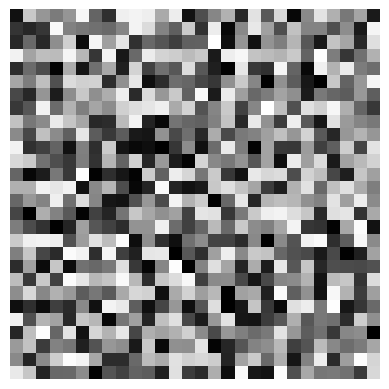

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


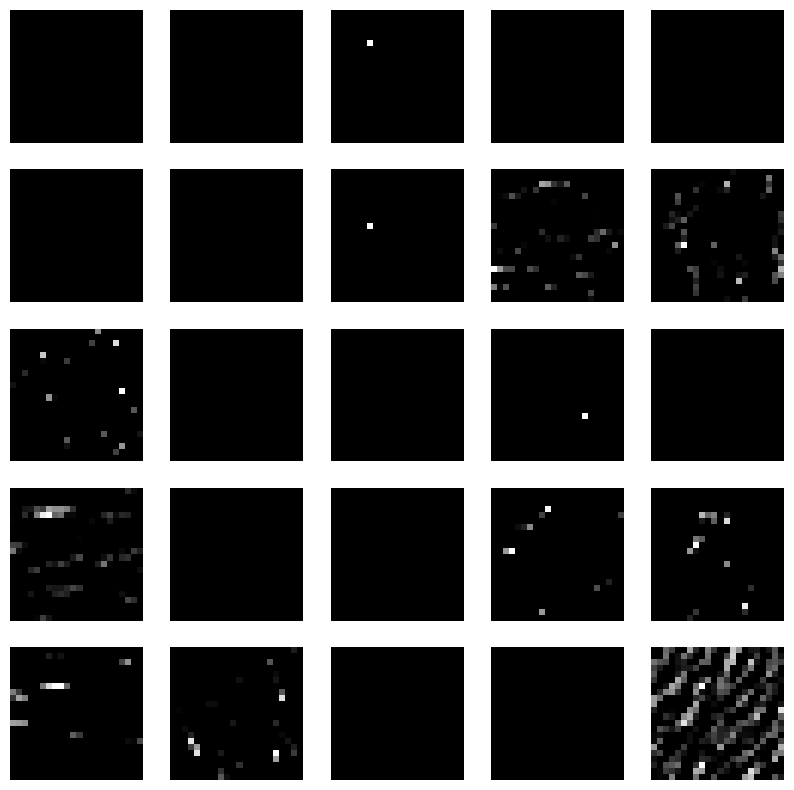

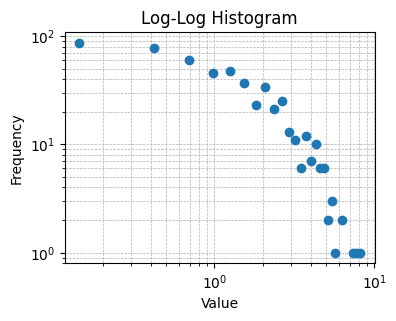

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Select an image from the test set
n = 10
x = generate_white_noise_image()*10
y = y_test[n]

# Create a new model that outputs the first conv layer's output
intermediate_layer_model = tf.keras.Model(inputs=model.layers[0].input,
                                         outputs=model.layers[0].output)

# Get the output of the first conv layer for the selected image
# Use predict on the intermediate model to get the output
intermediate_output = intermediate_layer_model.predict(np.expand_dims(x, axis=0))


# Define the subplot arrangement
rows = 5
cols = 5

# Create a figure and iterate over the feature maps
fig, axs = plt.subplots(rows, cols, figsize=(10, 10))
last_fm = []
for i in range(rows):
    for j in range(cols):
        # Get the feature map and plot it in the corresponding subplot
        feature_map = intermediate_output[0, :, :, i * cols + j]
        axs[i, j].imshow(feature_map, cmap='gray')
        axs[i, j].axis('off')
        last_fm.append(feature_map)

# Show the plot
plt.show()
plot_log_log_histogram(np.vstack(last_fm),30)